# 10 Years of Crowdfunding on Kickstarter  - Data Exploration
**by Marie-Luise Klaus**

# Table of contents
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminarywrangling)
3. [Utilities](#utilities)
4. [Descriptive Statistics](#descriptivestatistics)
5. [Univariate Exploration](#univariateexploration)
6. [Bivariate and Multivariate Explorations](#bivariateexploration)  
6.1 [Is it still worthwile financing your project on Kickstarter, now that crowdfunding has become mainstream?](#mainstream)  
6.2 [What determines the success of a crowdfunding campaign on Kickstarter?](#success)  
7. [References](#references)

# Introduction <a name="introduction"></a>

**Crowdfunding on Kickstarter**  
  
This exploratory data analysis is dedicated to the 10th anniversary of the crowdfunding platform Kickstarter. Crowdfunding is a rather new form of finance to fund any projects and ventures. Typically small amounts of money are being raised by a large number of people. The world wide web streamlined the processes and allowed easy access to this form of finance to project creators and private investors. 

Kickstarter is one of the most popular crowdfunding websites in the Western world. It was launched in April 2009 in the USA. While there are many crowdfunding platforms online today, they may fundamentally differ in terms of investor audience, project characteristics and funding services. Kickstarter’s focus is a mainly creative one. According to their website _**“Kickstarter helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality.”**_

Project _**creators**_ choose a _**deadline**_ and a funding _**goal**_ and present their project on the platform to gather money from a public audience. People who back the project (_**backers**_) by _**pledging**_ money are assured tangible rewards, depending on the amount they pledged. 
Unlike other opportunities of investment, Kickstarter does not allow to distribute shares of a venture to supporters; nor do they claim any ownership over the projects. If the goal was not met by the end of the deadline, the funding is not distributed. While Kickstarter is mainly open for project creators in the USA, Canada, UK, Australia, New Zealand, Mexico and parts of the EU, project support is allowed by people from all around the world. 

https://www.kickstarter.com/

**Kickstarter Data**  
 The Kickstarter data set was gathered in April 2019 from an automated web scraping service called web robots. They have been publishing monthly data of all ongoing and completed Kickstarter projects and released it to the public. Due to a lack of documentation provided by the source, I interpreted the data to the best of my belief. Insofar, I cannot guarantee for validity and completeness of the data and take no liability for misinterpretation of the results due to a lack of documentation. To better comprehend the data and rule out erroneous information, I collated the data set with Kickstarter's project archive, which is unrestrictedly accessible online. On the positive side, I did not encounter any inconsistencies during the wrangling and analysis processes. Please refer to the data wrangling Jupyter Notebook to gain more information on the wrangling process. 

https://webrobots.io/kickstarter-datasets/

Throughout the course of this notebook I will have these two questions in mind. Based on the aforementioned data:

- Is it still worth the effort to finance your project on Kickstarter since crowdfunding has become mainstream?
- What determines the success of a crowdfunding campaign on Kickstarter?

To get started, let's import our libraries and set plots to be embedded inline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# uncomment the below settings to avoid collapsing of dataframes
from IPython.display import Markdown
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format # display execution times
sns.set_style("whitegrid")

# Preliminary Wrangling <a name="preliminarywrangling"></a>
To begin, I import my data from multiple files and combine them into a single data frame. Subsequently, I assess the dataset to clean it from remaining issues. At the end of this section, I will identify our main variables and explain the terminology around aspects of our main variables.

In [2]:
# read in 4 files and concatinate the data into a single data frame
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,5)])
master_df.reset_index(drop=True, inplace=True)

## Assessing and Cleaning the Data

In [3]:
# show amount of rows and features
master_df.shape

(182823, 32)

In [4]:
# inspect features, null values and data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182823 entries, 0 to 182822
Data columns (total 32 columns):
project_id                 182823 non-null int64
project_name               182823 non-null object
url                        182823 non-null object
blurb                      182823 non-null object
category                   182823 non-null object
subcategory                182823 non-null object
image                      182823 non-null object
slug                       182823 non-null object
created_at                 182823 non-null object
launched_at                182823 non-null object
deadline                   182823 non-null object
state_changed_at           182823 non-null object
last_update_at             182823 non-null object
status                     182823 non-null object
creator_id                 182823 non-null int64
creator_name               182822 non-null object
country                    182814 non-null object
city                       182823 non-nul

In [5]:
# inspect 10 examples of the data in the dataset
master_df.sample(10)

project_id  \
123067  1746594      
92807   2304910      
46746   2569309      
55631   2927471      
68456   2730078      
79863   2540062      
120931  1281425      
29236   3373145      
140034  1142398      
116258  1826686      

                                                        project_name  \
123067  Home Studio Equipment Funding                                  
92807   Solar/Wind Hybrid Generator                                    
46746   Caro line London, a customisable fashion brand for women!      
55631   OOSYNAPSE: Big Data Platform Connecting People & Information   
68456   Ginalina: Home Is Family - Share Good Music With Kids!         
79863   Jurney, in to the mind of a refugee.                           
120931  MAGZET: The Audio Jack Reinvented with the Power of Magnets    
29236   Evie Short Film                                                
140034  Project "Coronation Blue"                                      
116258  A Philosophy of Ruin (Canceled)                                

                                                                                                      url  \
123067  https://www.kickstarter.com/projects/667273264/home-studio-equipment-funding                        
92807   https://www.kickstarter.com/projects/155208900/solar-wind-hybrid-generator                          
46746   https://www.kickstarter.com/projects/310463246/caro-line-london-a-customisable-fashion-brand        
55631   https://www.kickstarter.com/projects/oosynapse/oosynapse-big-data-platform-connecting-people-and    
68456   https://www.kickstarter.com/projects/114653510/ginalina-home-is-family-share-good-music-with-kids   
79863   https://www.kickstarter.com/projects/570338808/jurney-in-to-the-mind-of-a-refugee                   
120931  https://www.kickstarter.com/projects/magzet/magzet-the-audio-jack-reinvented-with-the-power-of      
29236   https://www.kickstarter.com/projects/1364599342/evie-short-film                                     
140034  https://www.kickstarter.com/projects/233214934/project-coronation-blue                              
116258  https://www.kickstarter.com/projects/563527293/a-philosophy-of-ruin                                 

                                                                                                                                          blurb  \
123067  Im creating a small music production station to support local talented rappers                                                            
92807   An electromagnet from a solar array, an electromagnet rotated by a solar array shaped to be a windmill.                                   
46746   A new revolutionary concept brand for creative women. Discover now how to mix 'n match all different styles to create your own.           
55631   An Open Source Operating System For Your Digital Life. 1 Platform, 7 Apps, 50+ Modules & Features To Help You Manage Your Digital World   
68456   A new album inspired by the chaos & beauty of family life!  Home is Family, by 2016 Juno-nominated artist and Juno-nominated producers!   
79863   A trip in order to bring the truth of who is exploited by economic and political interests with no eyes veiled hatred.                    
120931  Help us bring much needed innovation to the traditional audio jack with the use of MAGZET magnetic technology in the middle.              
29236   Facing a forced marriage by her own parents to a man almost twice her age, fourteen-year-old year old Evie makes an impossible choice.    
140034  A photographer and an unopened,60yr old bottle of ink,travelling the world,meeting Writers and Artists,celebrating in co-creation.        
116258  A new law: Murderer's can be turned over to their victims' families for punishment. This is a poignant bit of speculative fiction.        

            category      subcategory  \
123067  Music         Hip-Hop           
92807   Technology    DIY Electronics   
46746   Fashion       Ready-to-

**Null values & Duplicates**  
Notice one observation with an empty creator name. It shouldn't cause any problems in the analysis. Also missing states won't bother, since there are locations like New Zealand or Antarctica, where states as organisational territories don't exist.

However, there are empty values in _country_ of some observations. The assessment shows, the country Namibia, short "NA" was interpreted as a null value after we read in our csv files. Let's correct that. 

In [6]:
# there is one project without the name of creator
master_df[master_df.creator_name.isna()]

project_id             project_name  \
93242  2298709     Cannabis Colouring Book   

                                                                          url  \
93242  https://www.kickstarter.com/projects/498969171/cannabis-colouring-book   

                                                                       blurb  \
93242  A Cannabis Colouring Book, 20 black and white prints by a Fine Artist   

      category     subcategory  \
93242  Art      Conceptual Art   

                                                                                                                                                                                                                    image  \
93242  https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674   

                          slug           created_at          launched_at  \
93242  cannabis-colouring-book  2015-12-31 05:21:47  2015-12-31 18:31:24   

                  deadline     state_changed_at       last_update_at  status  \
93242  2016-01-30 18:31:24  2016-01-30 18:31:24  2015-12-31 05:21:47  failed   

       creator_id creator_name country     city state    displ_loc loc_type  \
93242  498969171   NaN          US      Chicago  IL    Chicago, IL  Town      

       backers_count    featured currency  goal_real  goal_current_usd  \
93242  1              no support  USD     2,500.0    2,500.0             

       goal_hist_usd  pledged_real  pledged_current_usd  pledged_hist_usd  \
93242 2,500.0        4.2           4.2                  4.2                 

       current_fx_rate(usd)  hist_exchange_rate(usd)  
93242 1.0                   1.0

In [7]:
# assess null values in state
master_df[master_df.state.isna()][['state','country', 'displ_loc', 'city']].sample(5)

state country          displ_loc        city
136162  NaN   AQ      Antarctica         Antarctica
52778   NaN   NZ      Taupo, NZ          Taupo     
13907   NaN   AQ      Antarctica         Antarctica
16585   NaN   AQ      Antarctica         Antarctica
36788   NaN   MK      Skopje, Macedonia  Skopje

In [8]:
# several projects with missing country, which should be Namibia instead of NaN
master_df[master_df.country.isna()][['country', 'displ_loc']]

country            displ_loc
11996   NaN     Windhoek, Namibia  
35813   NaN     Walvis Bay, Namibia
54174   NaN     Windhoek, Namibia  
70164   NaN     Windhoek, Namibia  
81780   NaN     Tsumkwe, Namibia   
96734   NaN     Rundu, Namibia     
96796   NaN     Okahandja, Namibia 
101341  NaN     Windhoek, Namibia  
181774  NaN     Walvis Bay, Namibia

In [9]:
# replace NaN by "NA"
master_df.country.fillna("NA", inplace=True)

# test
master_df[master_df.country.isna()][['country', 'displ_loc']]

Empty DataFrame
Columns: [country, displ_loc]
Index: []

In [10]:
# duplicates
master_df.duplicated().sum()

0

**Outliers**  

In [11]:
# show descriptive statistics of each numeric variable
master_df.describe()

project_id           creator_id      backers_count  \
count 182,823.0            182,823.0            182,823.0            
mean  2,134,008.0534013775 1,074,355,687.692052 133.19608036188006   
std   1,067,350.4118824806 620,008,225.0301064  872.1391095687884    
min   19.0                 3.0                  0.0                  
25%   1,316,340.0          537,632,655.5        3.0                  
50%   2,256,628.0          1,073,325,885.0      23.0                 
75%   3,087,906.5          1,611,913,230.5      80.0                 
max   3,713,426.0          2,147,483,434.0      105,857.0            

                goal_real     goal_current_usd        goal_hist_usd  \
count 182,823.0           182,823.0            182,823.0              
mean  53,045.47494396218  43,610.41674456528   44,479.11088315567     
std   1,253,273.100861694 1,140,903.3662680425 1,171,775.8831360221   
min   0.01                0.01                 0.01                   
25%   1,500.0             1,500.0              1,500.0                
50%   5,000.0             5,000.0              5,000.0                
75%   15,000.0            13,579.200000288965  14,219.6926569536      
max   100,000,000.0       126,541,794.79753642 150,099,318.94817606   

             pledged_real  pledged_current_usd     pledged_hist_usd  \
count 182,823.0           182,823.0            182,823.0              
mean  15,576.358262472442 11,431.22118834541   11,564.410448010885    
std   276,843.9582965485  83,372.50657122987   83,809.367465106       
min   0.0                 0.0                  0.0                    
25%   72.0                69.05895276617348    70.0                   
50%   1,252.0             1,218.0              1,243.026457903441     
75%   6,061.145           5,755.0              5,853.187935164977     
max   81,030,744.0        10,441,174.430000003 10,441,174.430000003   

       current_fx_rate(usd)  hist_exchange_rate(usd)  
count 182,823.0             182,823.0                 
mean  1.4719871868840078    1.4551578997548096        
std   4.538616102670615     4.643109675852995         
min   0.7902527395000001    0.5826048629999999        
25%   1.0                   1.0                       
50%   1.0                   1.0                       
75%   1.0                   1.0                       
max   107.4938140686        113.9401218152

The descriptive statistics above reveal an extreme range of values for the number backers, project goals and the actual amount pledged. For example, the investments vary between zero to more than USD 81 mi. (converted to USD in their historic exchange rate). For my following analysis, I will need to pay extra attention to outliers and extreme values.

**Time Variables and Project Duration**  

There are several time-related features to be converted to pandas date time format for analysis. 

The funding period of is one of the features a creator has to decide on before launching a project. I suppose it may affect the success of the campaign. I add the duration as a new feature as the difference of the time a project was launched from it's deadline.

In [12]:
# convert time data to date time format
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [13]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(5)

launched_at            deadline         duration
42798  2017-10-21 14:41:09 2017-11-20 15:41:09 30 days 01:00:00
150565 2014-06-10 19:31:23 2014-07-12 19:31:23 32 days 00:00:00
164452 2013-05-24 18:31:02 2013-05-30 09:01:00 5 days 14:29:58 
89900  2016-02-09 16:21:12 2016-03-10 16:21:12 30 days 00:00:00
24646  2018-06-29 03:21:27 2018-07-29 03:21:27 30 days 00:00:00

In [14]:
# convert duration time delta to float of days
master_df['duration_days'] = (master_df['duration'].astype('timedelta64[h]') / 24)

In [15]:
# the first project ever launched
first_project = master_df.sort_values(by='launched_at', ascending=True).iloc[0, :]
first_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        New York Makes a Book!!                                                                                                                             
blurb               Let's make the world's first crowd-funded book! \r\n\r\nNew York Makes a Book will be entirely composed of submissions from 100 participants. 100...
url                 https://www.kickstarter.com/projects/nymab/new-york-makes-a-book                                                                                    
launched_at         2009-04-28 11:55:41                                                                                                                                 
deadline            2009-05-16 09:59:00                                                                                                                                 
duration            17 days 22:03:19                                                                                                                       

In [16]:
# the latest launched project
latest_project = master_df.sort_values(by='launched_at', ascending=False).iloc[0, :]
latest_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Pobasso and the Cucumbers - Historical Musical for Schools                                                                           
blurb               School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen
url                 https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s                                      
launched_at         2019-04-18 04:49:38                                                                                                                  
deadline            2019-06-02 04:49:38                                                                                                                  
duration            45 days 00:00:00                                                                                                                     
goal_hist_usd      2,406.722637170395                                       

The first project on Kickstarter was launched 04/28/2009 and the latest project in my data set was launched by 04/18/2019. We got almost 10 years of Kickstarter data to analyse ahead!

**Categories**  

In [17]:
# show example of subcategory with multiple parent categories
master_df[master_df.subcategory == 'Web'][['category', 'subcategory']].sample(5)

category subcategory
134345  Technology  Web       
79923   Journalism  Web       
84881   Technology  Web       
84352   Technology  Web       
50544   Technology  Web

There are project categories and subcategories in our dataset. The same subcategory may have different parent categories. For example, the subcategory "Web" may be refer to the parent category "Technology" or "Journalism". In order to be explicit about categories, I create a combined category for both category types for each project.

In [18]:
# create combined category
master_df['comb_cat'] = master_df['category'] + "/" + master_df['subcategory']
master_df[['category', 'subcategory','comb_cat']].sample(5)

category  subcategory             comb_cat
8893    Fashion       Accessories  Fashion/Accessories
69582   Film & Video  Drama        Film & Video/Drama 
101348  Publishing    Zines        Publishing/Zines   
22169   Photography   People       Photography/People 
7728    Music         Jazz         Music/Jazz

**Project status**  

In [19]:
# show possible state of projects 
master_df.status.value_counts()

successful    95451
failed        74210
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

Most projects were successfully completed or failed by the end of the funding period. The project statuses show a relatively small amount of unfinished projects, which were either canceled or suspended. By mid April 2019, there were an additional 3,945 projects currently open for pledges. As I am interested in identifying success factors of Kickstarter campaigns, I will focus on completed projects only during this analysis. 

In [20]:
# create a separate data frame for completed projects only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    95451
failed        74210
Name: status, dtype: int64

**Irrelevant features**  

In [21]:
# remove columns that are irrelevant to our analysis to keep our dataframe neat
ks_compl = ks_compl.drop(labels=['slug', 'created_at', 'last_update_at', 'state_changed_at', 'displ_loc',
                                 'goal_real', 'goal_current_usd','pledged_real', 'pledged_current_usd', 
                                 'current_fx_rate(usd)', 'hist_exchange_rate(usd)'], axis=1)
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169661 entries, 0 to 169660
Data columns (total 24 columns):
project_id          169661 non-null int64
project_name        169661 non-null object
url                 169661 non-null object
blurb               169661 non-null object
category            169661 non-null object
subcategory         169661 non-null object
image               169661 non-null object
launched_at         169661 non-null datetime64[ns]
deadline            169661 non-null datetime64[ns]
status              169661 non-null object
creator_id          169661 non-null int64
creator_name        169660 non-null object
country             169661 non-null object
city                169661 non-null object
state               169615 non-null object
loc_type            169661 non-null object
backers_count       169661 non-null int64
featured            169661 non-null object
currency            169661 non-null object
goal_hist_usd       169661 non-null float64
pledged_hist_us

**The structure of the dataset**

This cleaned dataset contains information on 10 years of Kickstarter projects; from Kickstarter's launch in 04/2009 to 04/18/2019. The main focus of my analysis are completed projects: projects that were either successfully funded or failed the funding. The dataset of completed projects is composed of 169,661 rows, each of which represents a project. 

As for the features of this dataset, there are 22 variables that have been selected. We got quantitative variables like goal or pledged, several time-related variables and qualitative data, like project categories, names and project states.  

_**Featured**_   
are categorical values. It describes to what extend Kickstarter supported a campaign.

Basically, Kickstarter has two ways to promote projects. One possibility is to award the badge "Projects We Love": a project is being picked for recommendation by staff. The badge is shown on the project's description page.   
The second possibility of promotion is to _spotlight_ a project in some way in one of the sections on the Kickstarter landing page. According to Kickstarter's guide, they may also advertise projects in their newsletters or social media channels. However, the data set does not provide any explanation or information how a project was spotlighted exactly. 
Obviously, projects may also be supported in both ways: being spotlighted and being awarded the badge.

 - _no support:_ Kickstarter does not spotlight a project on their website, nor award the _Projects We Love_ badge, 
 - _Projects We Love:_ Kickstarter awards _Projects We Love_ badge without any further spotlighting
 - _spotlight:_ Kickstarter spotlights a project in any way on their landing page without awarding a badge
 - _full support:_ Kickstarter spotlight a project on their landing page and awards the _Projects We Love_ badge

_**Currencies**_  
To allow comparison of the project's financial features, I chose to convert all currencies to USD, using their historic exchange rates of the date of the deadline of their funding period. Please refer to the wrangle notebook for further information. 

**Main feature of interest**  
The main feature that I will explore is the _status_ of a project. It depicts whether the crowdfunding was **successful or failed**.

**Supporting features**  
Undoubtedly, there are many different factors that may affect success or failure of a crowdfunding campaign. In the course of this data set, I suspect the following factors to be most influential on the project:

- the amount of the initial funding goal: _goal hist usd_
- the amount pledged: _pledged hist usd_
- the number of backers: _backers count_
- the promotional support provided by Kickstarter: _featured_
- the project categories: _category, subcategory, comb cat_
- the dates of the project's launch and deadline: _launched at_, _deadline_
- the duration period of a funding: _duration_
- the location of a project: _country_, _loc type_.


# Utilities <a name="utilities"></a>

In this section, I set up commonly used variables and functions that come in handy for the analysis and help reduce repetition of code. 

In [22]:
# create separate data frames for successful and failed projects
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_failed = ks_compl[ks_compl.status == "failed"]

In [23]:
# create dataframe containing yearly project counts
ks_year_count = ks_compl.copy()
ks_year_count = ks_year_count.groupby([ks_year_count.deadline.dt.year]).project_id.count()
ks_year_count = ks_year_count.reset_index(name='count_year')

# create dataframe containing monthly project counts
ks_month_count = ks_compl.copy()
ks_month_count = ks_month_count.groupby([ks_month_count.deadline.dt.month]).project_id.count()
ks_month_count = ks_month_count.reset_index(name='count_month')
ks_month_count.head()

# create dataframe containing monthly project counts for each year
monthly_count = ks_compl.copy()
monthly_count = monthly_count.groupby([monthly_count.deadline.dt.year, 
                                      monthly_count.deadline.dt.month])\
                                      .project_id.count().values
ks_monthly_counts = pd.DataFrame({'date':np.arange('2009-05', '2019-05', dtype='datetime64[M]'), 
                                  'count_monthly': monthly_count})

ks_monthly_counts.sample(5)

date  count_monthly
63 2014-08-01  3840         
74 2015-07-01  3217         
84 2016-05-01  2578         
62 2014-07-01  2139         
57 2014-02-01  732

In [24]:
# define commonly used colors
cust_green = '#66cdaa'
cust_red = '#f08080'
cust_blue = '#43a2ca'
status_colors = [cust_blue, cust_green, cust_red]
cust_purple = sns.color_palette("Pastel1")[3]
cust_blues = sns.color_palette("Blues_r")[3]
feat_color = sns.color_palette("Set1")
fill_red = '#fee0d2'
fill_green = '#e0f3db'
goal_color =  sns.color_palette("Blues_r")[0]
pledged_color = "#c994c7"
backers_color = '#a6611a'
duration_color = '#5e3c99'
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

In [25]:
# utility to improve readability of large numbers 
def format_num(num):
    num = round(float(num))
    formatted_num = str(num)
    str_length = len(formatted_num)
    cursor = str_length % 3
    if str_length > 3 and cursor > 0:
        formatted_num = formatted_num[0:cursor] + "," + formatted_num[cursor:] 
        cursor += 1
        str_length = str_length - cursor
    while str_length > 3:
        formatted_num = formatted_num[0:cursor+3] + "," + formatted_num[cursor+3:]
        cursor += 4
        str_length -= 3
    return formatted_num

# utility to format yticks
def format_yticks(maximum, step, minimum=0):
    ylocs = np.arange(minimum, maximum+step, step)
    ylabels = [format_num(yloc) for yloc in ylocs]
    plt.yticks(ylocs, ylabels)
    
# utility to format xticks
def format_xticks(maximum, step, minimum=0):
    xlocs = np.arange(minimum, maximum+step, step)
    xlabels = [format_num(xloc) for xloc in xlocs]
    plt.xticks(xlocs, xlabels)

In [26]:
# utility to log transform data
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [27]:
# utility to create xticks for a timeline 
def timeline_ticks(df):    
    x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
    x_ticks = np.arange(0,len(df), 7)
    plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
    plt.xlabel("")

In [28]:
# frequently used variables 
dates = np.arange('2009-05', '2019-05', dtype='datetime64[M]')
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September","October", "November", "December"]
months = ["July", "August", "September",
         "October", "November", "December", "January", 
         "February", "March", "April", "May", "June"]


# Descriptive Statistics <a name="descriptivestatistics"></a>
To understand the characteristics of our main features, I'm going to start by computing th main descriptive statistics. During the wrangling processes some project observation were removed due to incompleteness and inconsistencies. Please be aware that the following statistics do not represent the full data, but a major part. 

**How many projects were completed by Kickstarter's 10th anniversary?**

In [29]:
n_compl_projects = ks_compl.project_id.nunique()
format_num(n_compl_projects)

'169,661'

**How many creators contributed by Kickstarter's 10th anniversary?**

In [30]:
creators_unique = ks_compl.creator_id.nunique()
format_num(creators_unique)

'147,269'

**What are the descriptive statistics of the numeric supporting features?**

In [31]:
# descriptive statistics of numeric values
ks_compl[['backers_count', 'goal_hist_usd', 'pledged_hist_usd', 'duration']].describe()

backers_count        goal_hist_usd    pledged_hist_usd  \
count 169,661.0         169,661.0            169,661.0             
mean  139.4416453987658 40,906.12771538828   12,072.580720515753   
std   878.2222230108724 1,106,030.4164593664 82,701.06921244746    
min   0.0               0.01                 0.0                   
25%   3.0               1,500.0              100.0                 
50%   26.0              5,000.0              1,471.0               
75%   85.0              13,193.87635772584   6,256.0               
max   105,857.0         150,099,318.94817606 8,596,474.58          

                      duration  
count  169661                   
mean   32 days 15:20:33.490142  
std    11 days 17:34:03.030301  
min    1 days 00:00:00          
25%    29 days 23:00:00         
50%    30 days 00:00:00         
75%    34 days 02:04:05         
max    93 days 02:32:04

USD {{format_num(ks_compl_success['pledged_hist_usd'].sum())}} of funding was successfully collected since Kickstarter's launch.     

Independent from a project's success, USD {{format_num(master_df['pledged_hist_usd'].sum())}} of funding was collected within 10 years. A proportion of which was not distributed due to Kickstarter all-or-nothing approach to funding.

**How many backers have supported completed projects by Kickstarter's 10th anniversary?**

In [32]:
backers_sum = ks_compl.backers_count.sum()
format_num(backers_sum)

'23,657,809'

**What were the chances to complete projects successfully?**   
First, assess the success probabilities of all campaigns. Second, calculate the success probabilities for completed projects only. 

In [33]:
# calculate total counts of each status from the master data set
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])
n_not_live = len(master_df[master_df.status != "live"])

print(format_num(n_success), "projects were successfully funded.")

95,451 projects were successfully funded.


In [34]:
# status probability of all projects that are currently not live
p_success = n_success / n_not_live
p_failed = n_failed / n_not_live
p_canceled = n_canceled / n_not_live
p_suspended = n_suspended / n_not_live
print("Currently open for pledges: {} projects.".format(format_num(n_live)))
print("Successful projects: {}%.".format(round(p_success*100,2)))
print("Failed projects: {}%.".format(round(p_failed*100, 2)))
print("Canceled projects: {}%.".format(round(p_canceled*100, 2))) 
print("Suspended projects: {}%.".format(round(p_suspended*100, 2))) 

Currently open for pledges: 3,945 projects.
Successful projects: 53.36%.
Failed projects: 41.49%.
Canceled projects: 4.8%.
Suspended projects: 0.35%.


In [35]:
# status probability of ordinarily completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%.".format(round(p_compl_success*100,2)))
print("Failed: {}%.".format(round(p_compl_fail*100, 2)))

Success: 56.26%.
Failed: 43.74%.


**How many projects do creators usually run?**

In [36]:
# number of unique project creators
n_compl_creators_unique = ks_compl.creator_id.nunique()
format_num(n_compl_creators_unique)

'147,269'

In [37]:
# project counts per user
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

print(f"Proportion of users with 1 project: {round(power_users['creator_count'].values[-1] / n_compl_creators_unique,2)*100}%")
print(f"Proportion of users with 2 project: {round(power_users['creator_count'].values[-2] / n_compl_creators_unique,2)*100}%")
power_users

Proportion of users with 1 project: 91.0%
Proportion of users with 2 project: 6.0%


project_count  creator_count
35  70             1            
32  58             1            
26  52             1            
27  36             1            
28  34             1            
29  33             1            
25  32             1            
31  31             1            
24  30             2            
23  27             2            
30  26             1            
22  25             3            
21  24             3            
33  23             1            
34  22             1            
20  21             3            
17  20             6            
19  19             3            
16  18             8            
15  17             9            
18  16             4            
12  15             14           
14  14             10           
13  13             13           
11  12             23           
9   11             35           
10  10             33           
8   9              45           
7   8              66           
6   7              106          
5   6              202          
4   5              371          
3   4              741          
2   3              2059         
1   2              9492         
0   1              134005

In [38]:
# What kind of projects do the most active user most active user launch?
creators_ordered = ks_compl.creator_id.value_counts().index
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}\n")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards



project_id  \
7690    3504998      
11684   3372265      
13023   3460006      
15224   3455599      
16640   3427450      
21416   3393416      
22986   3377666      
25262   3354163      
27825   3312725      
29659   3300497      
31068   3272726      
32170   3238805      
32889   3178449      
33878   3220166      
35054   3143358      
36163   3156729      
37357   3156701      
38623   3141084      
39444   3139736      
41861   3101579      
44124   3069811      
45132   3040674      
46553   3027536      
47746   2930595      
48593   2962784      
50185   2941226      
51399   2919809      
52850   2876799      
54056   2872774      
55628   2864425      
56690   2842165      
58808   2795714      
59887   2777007      
61481   2750267      
63361   2711161      
64160   2657711      
65220   2677562      
66215   2532350      
67332   2634233      
68238   2622739      
71349   2557085      
74588   2498967      
76433   2455648      
77207   2435733      
79287   2411620      
80977   2357424      
83764   2316696      
85234   2280017      
89584   2196328      
91885   2149135      
92924   2127895      
97534   2035414      
99331   1992818      
104803  1900583      
109428  1762421      
114396  1637481      
116955  1642708      
118124  1642040      
119982  1546121      
121378  1547364      
122306  1508905      
125130  1459054      
127134  1167048      
131024  1294634      
135600  1090862      
138471  1026828      
139410  1027487      
141420  952804       
142270  932083       
144335  838197       

                                                        project_name  \
7690    Bicycle Stained Glass Leviathan Playing Cards                  
11684   BICYCLE MARBLE Playing Cards by Max                            
13023   Bicycle Limited Edition Bald Eagle Playing Cards               
15224   Bicycle Explostar Playing Cards                                
16640   Bicycle Limited Edition Gyrfalcon Playing Cards                
21416   Bicycle Antiques Playing Cards                                 
22986   Bicycle Carnival Playing Cards & Stripper Deck Magic Trick     
25262   Bicycle Okeanos Playing Cards                                  
27825   Bicycle Stained Glass Phoenix Playing Cards                    
29659   Bicycle Open Season Playing Cards                              
31068   Bicycle Prism Gilded Limited Edition (Red) Playing Cards       
32170   Bicycle Koi Playing Cards                                      
32889   Bicycle Limited Edition CPC 100th Deck Design                  
33878   Bicycle Fireflies Playing Cards                                
35054   Bicycle MARBLE RIDER BACK Playing Cards by Max                 
36163   Bicycle Four Seasons Limited Edition (Summer) Playing Cards    
37357   Bicycle Four Seasons Limited Edition (Spring) Playing Cards    
38623   Bicycle Four Seasons Limited Edition (Winter) Playing Cards    
39444   Bicycle Four Seasons Limited Edition (Autumn) Playing Cards    
41861   Bicycle Human Evolution Playing Cards                          
44124   Bicycle Starlight Solar Playing Cards                          
45132   Bicycle Four Seasons Playing Cards                             
46553   Bicycle Vintage Classic Playing Cards                          
47746   Bicycle METAL RIDER BACK (BLUE EDITION) Playing Cards by Max   
48593   Bicycle Natural Disasters "Blizzard" Playing Cards             
50185   Bicycle Natural Disasters "Tsunami" Playing Cards              
51399   Bicycle Natural Disasters "Hurricane" Playing Cards            
52850   Bicycle Natural Disasters "Tornado" Playing Cards              
54056   Bicycle Natural Disasters "Earthquake" Playing Cards           
55628   Bicycle Natural Disasters "Wildfire" Playing Cards             
56690   Bicycle Natural Disasters "Volcano" Playing Cards              
58808   Bicycle NYX Playing Cards                                      
59887   Bicycle Heir Playing Cards                                   

While the vast majority of users launched one project, the creator with the name "Collectable Playing Cards" stands out. They launched 70 campaigns to finance different bicycle-themed playing cards.

**What are the projects with the highest goals?**  

In [39]:
# highest goal
highest_goal =  ks_compl.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# highest successful goal
highest_goal_s =  ks_compl_success.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# show
ks_compl.iloc[[highest_goal, highest_goal_s ]]

project_id                             project_name  \
87802  2200338     A Celtic Lovestory                        
88429  2193016     Bring Back MYSTERY SCIENCE THEATER 3000   

                                                                     url  \
87802  https://www.kickstarter.com/projects/245190432/a-celtic-lovestory   
88429  https://www.kickstarter.com/projects/mst3k/bringbackmst3k           

                                                                                                                                      blurb  \
87802  A 2000 year old "Romeo & Juliet" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...   
88429  Almost there! MYSTERY SCIENCE THEATER 3000 will return... and if we can get to $5.9MM, we'll get THIRTEEN new episodes of MST3K!       

           category subcategory  \
87802  Film & Video  Drama        
88429  Film & Video  Television   

                                                                                                                                                                                                                    image  \
87802  https://ksr-ugc.imgix.net/assets/012/292/886/67f8879c113e174e1f41465297cdd035_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463752126&auto=format&frame=1&q=92&s=de2553e2d761e5821f69e8612f6e34c1   
88429  https://ksr-ugc.imgix.net/assets/012/289/124/ae6179e0455878652460b3f70d7550d0_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463751640&auto=format&frame=1&q=92&s=4ae4a3ae1624e155a466d650a2865b6d   

              launched_at            deadline      status  creator_id  \
87802 2015-11-16 23:47:15 2015-11-30 22:01:00  failed      245190432    
88429 2015-11-10 15:49:32 2015-12-12 06:00:00  successful  1587892087   

       creator_name country         city    state loc_type  backers_count  \
87802  Joe           GB      Dorset       England  County   0               
88429  Joel Hodgson  US      Minneapolis  MN       Town     48270           

           featured currency        goal_hist_usd  pledged_hist_usd  \
87802  no support    GBP     150,099,318.94817606 0.0                 
88429  full support  USD     2,000,000.0          5,764,229.38        

              duration      duration_days                 comb_cat  
87802 13 days 22:13:45 13.916666666666666  Film & Video/Drama       
88429 31 days 14:10:28 31.583333333333332  Film & Video/Television

About USD 150 mi. was the highest funding ever asked for, which failed miserably in November 2015 with not one single backer. However, the highest funding goal ever accomplished was for another video project. USD 2 mi. were successfully raised for the TV show "Bring Back MYSTERY SCIENCE THEATER 3000". By the end of the funding they collected USD 5.76 mi. from 48,270 supporters in December 2015.

**Which project collected the highest funding?**

In [40]:
highest_pledge =  ks_compl.sort_values('pledged_hist_usd')['pledged_hist_usd'].index[-1]
ks_compl.iloc[[highest_pledge]]

project_id                            project_name  \
160085  188241      OUYA: A New Kind of Video Game Console   

                                                                                    url  \
160085  https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console   

                                                                                                                                  blurb  \
160085  Cracking open the last closed platform: the TV.  A beautiful, affordable console -- built on Android, by the creator of Jambox.   

       category      subcategory  \
160085  Games    Gaming Hardware   

                                                                                                                                                                                                                     image  \
160085  https://ksr-ugc.imgix.net/assets/011/364/958/aa5f379413c838d66ce78eee5fae97ce_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463681578&auto=format&frame=1&q=92&s=fb71263f2a26e5e7848f4f3705916b55   

               launched_at            deadline      status  creator_id  \
160085 2012-07-10 12:44:41 2012-08-09 05:00:00  successful  33844207     

       creator_name country         city state loc_type  backers_count  \
160085  OUYA         US      Los Angeles  CA    Town     63416           

            featured currency  goal_hist_usd  pledged_hist_usd  \
160085  full support  USD     950,000.0      8,596,474.58        

               duration      duration_days               comb_cat  
160085 29 days 16:15:19 29.666666666666668  Games/Gaming Hardware

The project of the highest amount of funding collected is OUYA, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6 mi. at an initial funding goal of 950 tsd.

**Which project convinced the highest number of backers?**

In [41]:
most_backers =  ks_compl.sort_values('backers_count')['backers_count'].index[-1]
ks_compl.iloc[[most_backers]]

project_id                                             project_name  \
139199  988854      Bring Reading Rainbow Back for Every Child, Everywhere!   

                                                                                                           url  \
139199  https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh   

                                                                                                                                          blurb  \
139199  Bring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!   

          category subcategory  \
139199  Technology  Web          

                                                                                                                                                                                                                     image  \
139199  https://ksr-ugc.imgix.net/assets/011/690/614/fcbacbc0924942075477a04a01adb20a_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686848&auto=format&frame=1&q=92&s=6444b56320bf2b9978d7a5139811b516   

               launched_at            deadline      status  creator_id  \
139199 2014-05-28 13:05:45 2014-07-02 19:00:00  successful  1038554387   

                          creator_name country         city state loc_type  \
139199  LeVar Burton & Reading Rainbow  US      Los Angeles  CA    Town      

        backers_count      featured currency  goal_hist_usd  pledged_hist_usd  \
139199  105857         full support  USD     1,000,000.0    5,408,916.95        

               duration      duration_days        comb_cat  
139199 35 days 05:54:15 35.208333333333336  Technology/Web

In July 2014 the project "Bring Reading Rainbow Back for Every Child, Everywhere!", a web tech project, won {{format_num(most_backers)}} supporters. While they initially asked for USD 1 mi., they realized 5.4 mi. by the end of their campaign.

**Where are Kickstarter campaigns being launched?** 

In [42]:
# globally
ks_compl.country.value_counts()

US    118813
GB    17446 
CA    7488  
AU    3686  
DE    2586  
FR    2112  
IT    1930  
MX    1886  
ES    1535  
NL    1354  
SE    1074  
NZ    783   
DK    712   
HK    689   
JP    554   
CH    519   
IE    505   
SG    469   
BE    398   
NO    393   
AT    381   
CN    271   
IN    173   
PL    134   
KR    133   
PR    124   
TH    122   
UA    121   
IL    109   
CO    106   
BR    102   
ZA    100   
RU    91    
CZ    90    
GR    88    
TW    84    
ID    83    
PE    79    
KE    75    
AR    74    
TR    64    
HU    60    
PH    60    
IS    58    
GH    55    
SI    53    
RO    50    
CR    49    
NP    49    
VN    48    
PT    47    
EC    47    
FI    46    
LT    45    
BG    44    
RS    43    
CL    43    
LU    43    
UG    41    
GT    41    
CU    38    
KH    33    
BA    29    
HT    29    
EG    29    
NI    28    
MY    28    
AE    27    
MA    26    
EE    26    
TZ    26    
LV    26    
AF    24    
NG    23    
HR    22    
BO    22    
JM    21    

In [43]:
# proportion of project countries - top 3 
for i in range(3):
    print(ks_compl.country.value_counts().index[i],  ks_compl.country.value_counts().values[i] / n_compl_projects)

US 0.7002964735560913
GB 0.10282858170115701
CA 0.044135069344162774


In [44]:
# states of the USA
ks_usa_compl = ks_compl[ks_compl.country == "US"]
ks_usa_compl.state.value_counts()

CA    22284
NY    14035
TX    7027 
FL    5808 
IL    4591 
WA    3989 
PA    3838 
MA    3426 
GA    3152 
OH    3141 
OR    3040 
CO    2843 
MI    2755 
NC    2728 
TN    2443 
VA    2354 
MN    2232 
AZ    2228 
UT    1949 
NJ    1914 
MO    1837 
MD    1689 
NV    1612 
WI    1558 
IN    1413 
DC    1259 
CT    1072 
LA    1061 
SC    944  
KY    882  
OK    820  
AL    761  
NM    717  
IA    635  
ME    622  
ID    584  
KS    569  
HI    541  
VT    530  
NH    503  
AR    493  
RI    452  
MT    437  
NE    389  
AK    340  
MS    329  
WV    288  
DE    260  
SD    153  
ND    143  
WY    143  
Name: state, dtype: int64

In [45]:
# proportion of project US federal states - top 3 
for i in range(3):
    print(ks_usa_compl.state.value_counts().index[i],  ks_compl.state.value_counts().values[i] / n_compl_projects)

CA 0.13134426886556133
NY 0.09120540371682355
TX 0.08272378448789056


In [46]:
# projects from how many countries were lauched? 
ks_compl.country.nunique()

195

In [47]:
# evalutate location type
ks_compl.loc_type.value_counts()

Town             157326
County           6396  
Suburb           4308  
LocalAdmin       979   
Zip              407   
Island           209   
Country          17    
Miscellaneous    15    
Estate           4     
Name: loc_type, dtype: int64

In [48]:
# proportion most common location type
ks_compl.loc_type.value_counts().values[0] / n_compl_projects

0.9272961965330866

We find projects from 195 countries from all around the world. With 70% by far the most projects were launched in the USA. To be more specific, 13% of all completed US projects were from California and 9% from New York state. 

Globally, Great Britain followed the US with 10% of projects and Canada was at the third position with 4.4 % of all projects. The data is not only heavily biased towards US projects but also towards location type. Towns make up for 93% of location types. As the overall majority of projects is happening in US towns and there are insufficient projects in other locations, I decided to not further consider a location as a predictor for this analysis.

**What are common project categories?**  

In [49]:
# values categories
ks_compl.category.value_counts()

Music           24600
Film & Video    23985
Art             18093
Technology      17846
Publishing      17087
Food            13407
Games           10775
Fashion         8929 
Comics          6438 
Design          5882 
Photography     5721 
Crafts          5480 
Theater         4725 
Journalism      3686 
Dance           3007 
Name: category, dtype: int64

In [50]:
# category count
ks_compl.category.nunique()

15

In [51]:
# values subcategories
ks_compl.subcategory.value_counts()

Web                   3599
Comedy                2561
Public Art            2382
Classical Music       2378
Mobile Games          2377
Webseries             2376
Hardware              2376
Indie Rock            2375
Rock                  2373
Mixed Media           2373
Hip-Hop               2372
Restaurants           2371
Animation             2370
Art Books             2368
Pop                   2367
Drinks                2367
Painting              2366
Country & Folk        2365
Software              2364
Narrative Film        2361
Shorts                2348
Gadgets               2346
Playing Cards         2344
Nonfiction            2342
Fiction               2330
Drama                 2325
Children's Books      2319
Documentary           2310
Apps                  2305
Illustration          2303
Comic Books           2298
Apparel               2291
Graphic Novels        2289
Accessories           2281
Video Games           2257
World Music           2104
Electronic Music      2097
P

In [52]:
# subcategory count
ks_compl.subcategory.nunique()

159

In [53]:
# values combined categories
ks_compl.comb_cat.value_counts()

Art/Public Art                  2382
Music/Classical Music           2378
Games/Mobile Games              2377
Technology/Hardware             2376
Film & Video/Webseries          2376
Music/Indie Rock                2375
Music/Rock                      2373
Art/Mixed Media                 2373
Music/Hip-Hop                   2372
Food/Restaurants                2371
Technology/Web                  2370
Film & Video/Animation          2370
Publishing/Art Books            2368
Music/Pop                       2367
Food/Drinks                     2367
Art/Painting                    2366
Music/Country & Folk            2365
Technology/Software             2364
Film & Video/Narrative Film     2361
Film & Video/Shorts             2348
Technology/Gadgets              2346
Games/Playing Cards             2344
Publishing/Nonfiction           2342
Publishing/Fiction              2330
Film & Video/Drama              2325
Publishing/Children's Books     2319
Film & Video/Documentary        2310
T

In [54]:
# comb category count
ks_compl.comb_cat.nunique()

169

Music, Film & Video and Art were most common among the 15 main project categories. Looking at subcategories, we found Web, Comedy and Public Art among the top 3. We raised the number of subcategories by 10 when we combined parent and subcategory. Most mainstream combined categories are Public Art, Classical Music and Mobile Games.

There is not one category that dominates over other categories. In fact, there are many categories at the top of the ranking with similar project counts of plus 2000. 

Rather unusual projects were of types Music/Comedy, Music/Chiptune and Crafts/Taxidermy.

**What is the usual project duration of completed projects?**   

In [55]:
# show descriptive statistics
ks_compl.duration.describe()

count    169661                 
mean     32 days 15:20:33.490142
std      11 days 17:34:03.030301
min      1 days 00:00:00        
25%      29 days 23:00:00       
50%      30 days 00:00:00       
75%      34 days 02:04:05       
max      93 days 02:32:04       
Name: duration, dtype: object

The project duration typically ranges around 30 days. The interquartile range was between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.  

## Numeric Variables and Outliers

As aforementioned, we find extreme values in goals, pledged and backers counts. To evaluate how to deal with outliers, I will take a more detailed look on quantiles of each data point. 

**Goals**  

In [56]:
# get quantiles of goals, converted to USD 
goal_min = 0
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_975 = ks_compl.goal_hist_usd.quantile(q=0.975)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    GOALS: \n\
    - Min. goal: {goal_min} USD,\n\
    - 25% quantile - low goals: < {format_num(goal_25)} USD,\n\
    - 50% quantile - medium goals: < {format_num(goal_50)} USD,\n\
    - 75% quantile - moderately high goals: < {format_num(goal_75)} USD,\n\
    - 95% quantile - high goals < {format_num(goal_95)} USD,\n\
    - 97.5% quantile - very high goals: < {format_num(goal_975)} USD,\n\
    - 99.99% quantile - extreme goals: < {format_num(goal_outliers)} USD,\n\
    - Max.goal <= {format_num(goal_max)} USD")

    GOALS: 
    - Min. goal: 0 USD,
    - 25% quantile - low goals: < 1,500 USD,
    - 50% quantile - medium goals: < 5,000 USD,
    - 75% quantile - moderately high goals: < 13,194 USD,
    - 95% quantile - high goals < 65,064 USD,
    - 97.5% quantile - very high goals: < 113,630 USD,
    - 99.99% quantile - extreme goals: < 55,170,000 USD,
    - Max.goal <= 150,099,319 USD


Goals range between USD 0, up to USD {{format_num(goal_max)}}. This is an extremely large dimension, which will likely obstruct our visualization and average estimations.

By using quantiles of 25%, 50%, 75%, 95%, 97.5%, 99.99%, I sectioned my data into categories of low, medium, moderately high goals, high goals, very high goals, extreme goals and outliers. 

95% of projects stay below goals of USD {{format_num(goal_95)}}. Funding goals make a huge jump into the millions above the 97.5% quantile. But, only very few projects rocket very high in the range of several million.

The median goal is recorded at USD 5 tsd, whereas the mean computes to USD {{format_num(ks_compl.goal_hist_usd.mean())}}. In the light of the vast majority of projects never seeking this goal, the median seems to be a better estimator for averages.   

**Pledged**  

In [57]:
# get quantiles of pledged amounts 
pledged_min = ks_compl.pledged_hist_usd.min()
pledged_25 = ks_compl.pledged_hist_usd.quantile(q=0.25)
pledged_50 = ks_compl.pledged_hist_usd.quantile(q=0.5)
pledged_75 = ks_compl.pledged_hist_usd.quantile(q=0.75)
pledged_95 = ks_compl.pledged_hist_usd.quantile(q=0.95)
pledged_975 = ks_compl.pledged_hist_usd.quantile(q=0.975)
pledged_outliers = ks_compl.pledged_hist_usd.quantile(q=0.9999)
pledged_max = ks_compl.pledged_hist_usd.max()

print(f"\
    PLEDGED AMOUNT: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quantile - low amount pledged: < {format_num(pledged_25)} USD,\n\
    - 50% quantile - medium amount pledged: < {format_num(pledged_50)} USD,\n\
    - 75% quantile - moderately high amount pledged: < {format_num(pledged_75)} USD,\n\
    - 95% quantile - high amount pledgeds < {format_num(pledged_95)} USD,\n\
    - 97.5% quantile - very high amount pledged: < {format_num(pledged_975)} USD,\n\
    - 99.99% quantile - extreme amount pledged: < {format_num(pledged_outliers)} USD,\n\
    - Max. pledged {format_num(pledged_max)} USD") 

    PLEDGED AMOUNT: 
    - Min. pledged: 0.0 USD,
    - 25% quantile - low amount pledged: < 100 USD,
    - 50% quantile - medium amount pledged: < 1,471 USD,
    - 75% quantile - moderately high amount pledged: < 6,256 USD,
    - 95% quantile - high amount pledgeds < 38,124 USD,
    - 97.5% quantile - very high amount pledged: < 74,842 USD,
    - 99.99% quantile - extreme amount pledged: < 3,205,803 USD,
    - Max. pledged 8,596,475 USD


The amount pledged by supporters range between USD 0 and {{format_num(pledged_max)[:-5]}} mi. Similarly to goals, there are extreme outliers, albeit not as severe. For pledged amounts, I inspected 25%, 50%, 75%, 95%, 97.5%, 99.99% quantiles. I sectioned my data into categories of low, medium, moderately high, high, very high, extreme and outlier pledges. 

The median funding per project was USD {{format_num(pledged_50)}}. This is less than a third of the median goal of USD {{format_num(goal_50)}} asked by creators. It may indicate either a high number of failed projects or a tendency for successful projects having very low funding goals.   

Extremely high pledged fundings are very unlikely. Only a small number of projects of under 0.1% successfully pledge more than USD 1 mi.

**Backers**  

In [58]:
# get quantiles of backers
backers_min = ks_compl.backers_count.min()
backers_25 = ks_compl.backers_count.quantile(q=0.25)
backers_50 = ks_compl.backers_count.quantile(q=0.5)
backers_75 = ks_compl.backers_count.quantile(q=0.75)
backers_95 = ks_compl.backers_count.quantile(q=0.95)
backers_975 = ks_compl.backers_count.quantile(q=0.975)
backers_outliers = ks_compl.backers_count.quantile(q=0.9999)
backers_max = ks_compl.backers_count.max()

print(f"\
    BACKERS: \n\
    - Min. backers: {backers_min},\n\
    - 25% quantile - low amount backers: < {format_num(backers_25)},\n\
    - 50% quantile - medium amount backers: < {format_num(backers_50)},\n\
    - 75% quantile - moderately high amount backers: < {format_num(backers_75)},\n\
    - 95% quantile - high amount backers < {format_num(backers_95)},\n\
    - 97.5% quantile - very high amount backers: < {format_num(backers_975)},\n\
    - 99.99% quantile - extreme amount backers: < {format_num(backers_outliers)},\n\
    - Max. backers {format_num(backers_max)}") 

    BACKERS: 
    - Min. backers: 0,
    - 25% quantile - low amount backers: < 3,
    - 50% quantile - medium amount backers: < 26,
    - 75% quantile - moderately high amount backers: < 85,
    - 95% quantile - high amount backers < 458,
    - 97.5% quantile - very high amount backers: < 893,
    - 99.99% quantile - extreme amount backers: < 35,592,
    - Max. backers 105,857


Just as  _goals_ and the _pledged_ funding, I calculated the quantiles of the number of backers per project. Similarly, the distribution of backers is heavily skewed. A quarter of all projects were completed with 3 or less backers. The median number of backers per project was 26. 

Only 5% of projects ended with more than 458 backers. As before with _goals_ and _pledged_, the number of project supporters sharply increased above the 97.5% quantile and ultimately peaked in a maximum of {{format_num(backers_max)}} backers.

As a consequence of the wide range of goals, pledges and backers counts, it will be complicated to plot those data points. The above analysis shows that observation with numeric values under the 95% quantile may provide a more realistic impression on Kickstarter crowdfunding campaigns. 

Thus, I will treat values beyond the 95% interval like outliers. Eliminating very high values in backers, goals and pledged will improve the readability of the plots. In preparation for the visual analysis, I'm going to filter our data by the lower 95% interval of goals, pledged and backers counts.  

In [59]:
# remove outliers
ks_compl_95 = ks_compl.copy()
print("Projects completed : ", format_num(len(ks_compl_95)))

# collect all projects that stay below the 95% quantiles in goal, pledged and backers 
ks_compl_95 = ks_compl_95.query('(goal_hist_usd < @goal_95) & \
                                  (pledged_hist_usd < @pledged_95) & \
                                  (backers_count < @backers_95)')

ks_compl_95.reset_index(drop=True, inplace=True)
print("After removal of outliers: ", format_num(len(ks_compl_95)))

# create separate data frames with outliers removed for each, successful and failed projects
ks_success_95 = ks_compl_95[ks_compl_95.status == 'successful']
ks_fail_95= ks_compl_95[ks_compl_95.status == 'failed']
print("No. success projects 95%.: ", format_num(len(ks_success_95)) , \
      "\nNo. failed projects 95%.:", format_num(len(ks_fail_95)))

Projects completed :  169,661
After removal of outliers:  151,754
No. success projects 95%.:  84,581 
No. failed projects 95%.: 67,173


## Summary Descriptive Statistics

With the main focus being on completed project on Kickstarter's 10 year anniversary, I found a number of {{format_num(n_compl_projects)}} completed projects, that were initiated by {{format_num(n_compl_creators_unique)}} different creators. There were another {{format_num(n_live)}} projects open for funding at the time of the anniversary. If a project reached its deadline ordinarily, the probability of success was 56.26%. About 23.7 mi. times supporters actively pledged for completed projects.  

Although we found projects from 195 countries from all around the world, 70% were of the projects were launched in the USA. To be more specific, 13% of all completed projects come from California and 9% from New York state. Globally, Great Britain follows the US with 10% of projects and Canada comes on third with 4.4 % of all projects. Towns make up for 93% of location types. I suppose the uneven proportion of locations may not result in meaningful result. Therefore I'm going to prioritize the remaining data points as predictors over location and location type. 

91% of users have not returned to funding after launching a project. Another 6% of users created 2 projects. 

_Music_, _Film & Video_ and _Art_ are most common among the 15 main project categories. Out of 169 subcategories, we found _Public Art_, _Classical Music_ and _Games/Mobile Games_ were the most popular. However, among subcategories the popularity was distributed relatively closely together, so that we cannot assume dominance of more specific project types. 

**Duration**  
The typical project duration is typically around 30 days. The interquartile ranges between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.   

**Goals**  
Funding goals range between USD 0 to 150,099,319. The median goals benchmark at 5 tsd. 95% of projects were below goals of USD {{format_num(goal_95)}}. However, goals sharply increased up into millions above the 97.5% quantile. But only a very few projects rocket very high in the range of several million. 

**Pledged**  
The contributed financing ranged between zero to USD 8.6 mi. Compared to the wide dimension of funding opportunity, the median pledged per project may seem disappointing. Only USD {{format_num(pledged_50)}} were collect on average. Only a very small number of projects of under 0.1% of projects successfully pledge more than USD 1 mi. 
Comparing it to the median goal of USD {{format_num(goal_50)}}, this indicates either a high number of failed projects or the tendency of success of projects with very low funding goals. 

**Backers**  
A quarter of all projects were completed with 3 or less backers. The median number of backers was 26. Only 5% of all completed projects had more than 458 supporters. Similar to goals and pledged, the number of backers increased sharply only after passing the 97.5% quantile. The maximum count of supporters in Kickstarter's history was 105,857 backers.

**Highlights**  

- **The most number of launched campaigns: 70**

The creator with the name _Collectable Playing Cards_ stands out. All 70 projects were started to crowdfund bicycle-themed playing cards.

e.g. https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards  

- **The highest funding goal ever sought for: USD 150 mi.**

The venture was created to finance a drama movie production: _A Celtic Lovestory_. The goal of USD 150 mi. was the highest ever sought for. However, it failed miserably in November 2015 with not one single backer. 

https://www.kickstarter.com/projects/245190432/a-celtic-lovestory  

- **The highest successful funding goal: USD 2 mi.**   

USD 2 mi. were successfully raised for the TV show "_ring Back MYSTERY SCIENCE THEATER 3000_ in December 2015. By the end of the funding they collected USD 5.76 mi. from 48,270 supporters.

https://www.kickstarter.com/projects/mst3k/bringbackmst3k

- **The highest number of supporters: 105,857**

In July 2014 the project _Bring Reading Rainbow Back for Every Child, Everywhere!_, a web tech project, won 105,857 supporters. While they initially asked for USD 1 mi., they eventually sourced 5.4 mi. by the end of their campaign.

https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh  

- **The highest amount pledged: USD 8.6 mi.**  

The venture with the highest sum ever funded is _OUYA_, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6 mi at an initial funding goal of 950 tsd.

https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console

**Outliers**  
The above campaign highlights mostly fall under the category extreme. They do not at all represent the average crowdfunding campaign on Kickstarter. The descriptive statistics reveal extreme outlier projects in regard to their goal, amount pledged and backers count. Thus, to keep plots readable and to not further distort our data, I'm going to work with projects fitting the lower 95% quantile intervals of aforementioned values. According to the statistics, I expect even within the 95% quantiles an extremely long tail to the right. In order to best reflect the measures of mean, I'm going to apply the median instead of the average whenever necessary.

# Univariate Exploration <a name='univariateexploration'></a>

In this section, we explore the relevant features one by one visually. Univariate plots will allow a general understanding about our potential predictors about what makes a campaign worthy and successful on Kickstarter. 

Let's start our exploration by looking at the main domain of interest: status. 

## Project Status

**What was the status of all campaigns in Kicktarter's anniversary?**

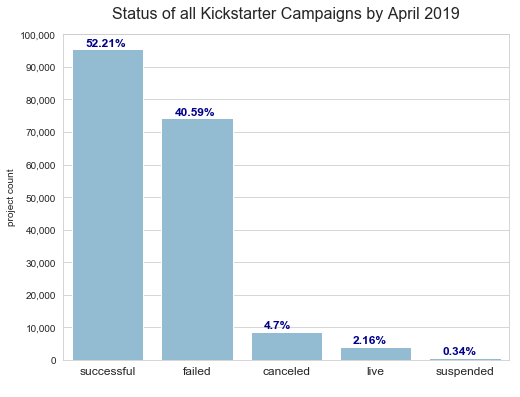

In [60]:
# style
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot bar chart for catergorical data
ax = sns.countplot(data=master_df, x='status', color=cust_blues, order=order);

# annotate proportions 
for p in ax.patches:
    ax.text(p.get_x()+0.15, 
            p.get_height()+1000, 
            str(round((p.get_height() / len(master_df))*100,2)) + '%', 
            fontsize=12, color='darkblue', weight='bold')

# labels and ticks
plt.title("Status of all Kickstarter Campaigns by April 2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
format_yticks(master_df.status.value_counts().values.max(), 10000)
plt.ylabel("project count")
plt.show()

Here we see that since the launch of Kickstarter in 2009, most campaigns ended in success (52.21%). 40.59% of all projects failed. A relatively small amount of projects never finished because they were either canceled or suspended. There was a surprisingly high number of nearly 4 tsd projects currently live and open for funding in Kickstarter's anniversary month.

**How may projects succeeded or failed out of all completed projects?**

Below we are going to plot the success and failure counts of projects that were completed ordinarily.

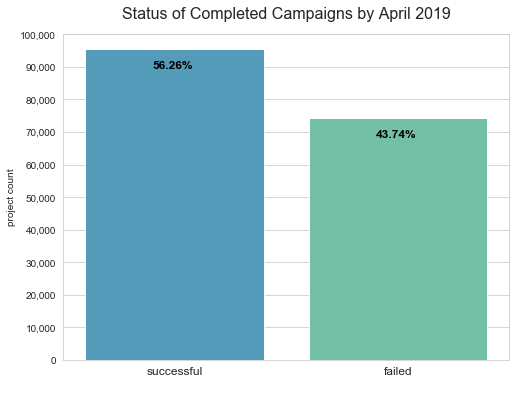

In [61]:
# settings
plt.figure(figsize=[8,6])

# plot bar plor of completed projects only
ax = sns.countplot(data=ks_compl, x='status', 
                   color=sns.set_palette(status_colors), 
                   order=ks_compl.status.value_counts().index);

# annotate proportion
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, 
            str(round((p.get_height()/ len(ks_compl))*100,2)) + '%', 
            fontsize=12, color='black', weight='bold')

# labels and ticks
plt.title("Status of Completed Campaigns by April 2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
format_yticks(ks_compl.status.value_counts().values.max(), 10000)
plt.ylabel("project count")
plt.show()

Out of all completed projects by Kickstarter's 10th anniversary, there were {{format_num(n_compl_success)}} successfully funded projects in our data frame. More than half of all completed campaigns were successful since Kickstarter's beginning. Meanwhile, {{format_num(n_compl_fail)}} of all completed projects ended in failure. By only considering projects that ordinarily finished, the proportion of successful campaigns increased up to 56%.

## Project Types

**What kind of categories, subcategories and combined categories were common?**

To analyze project categories, I will start by visualizing the distribution of the parent categories, before I go more into detail by plotting subcategories and combined categories. 

**Parent Categories**  

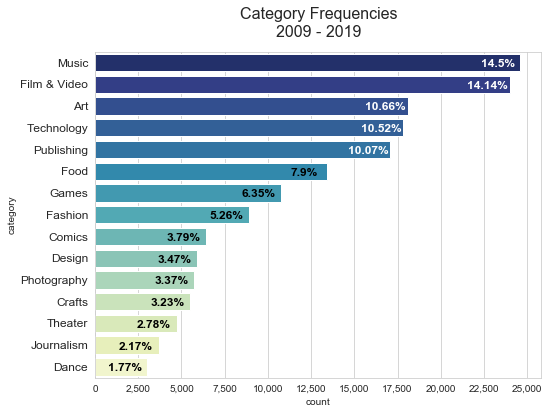

In [62]:
# settings
plt.figure(figsize=[8,6])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='category', palette="YlGnBu_r", 
                   order=ks_compl.category.value_counts().index);

# annotate proportions
cat_counts = ks_compl.category.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    # white annotation for top categories
    if count > 15000:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="white", fontsize=12, fontweight='bold')
     # black annotations for lower categories
    else:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="black", fontsize=12, fontweight='bold')
    
# labels and ticks
plt.title("Category Frequencies\n2009 - 2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category")
format_xticks(ks_compl.category.value_counts().values.max(), 2500)
plt.show()

**Subcategories**  
Let's now go into detail of categories. As subcategories can appear under several parent categories, I'm going to depict the project frequencies of combined categories, which considers the parent category and subcategory. 

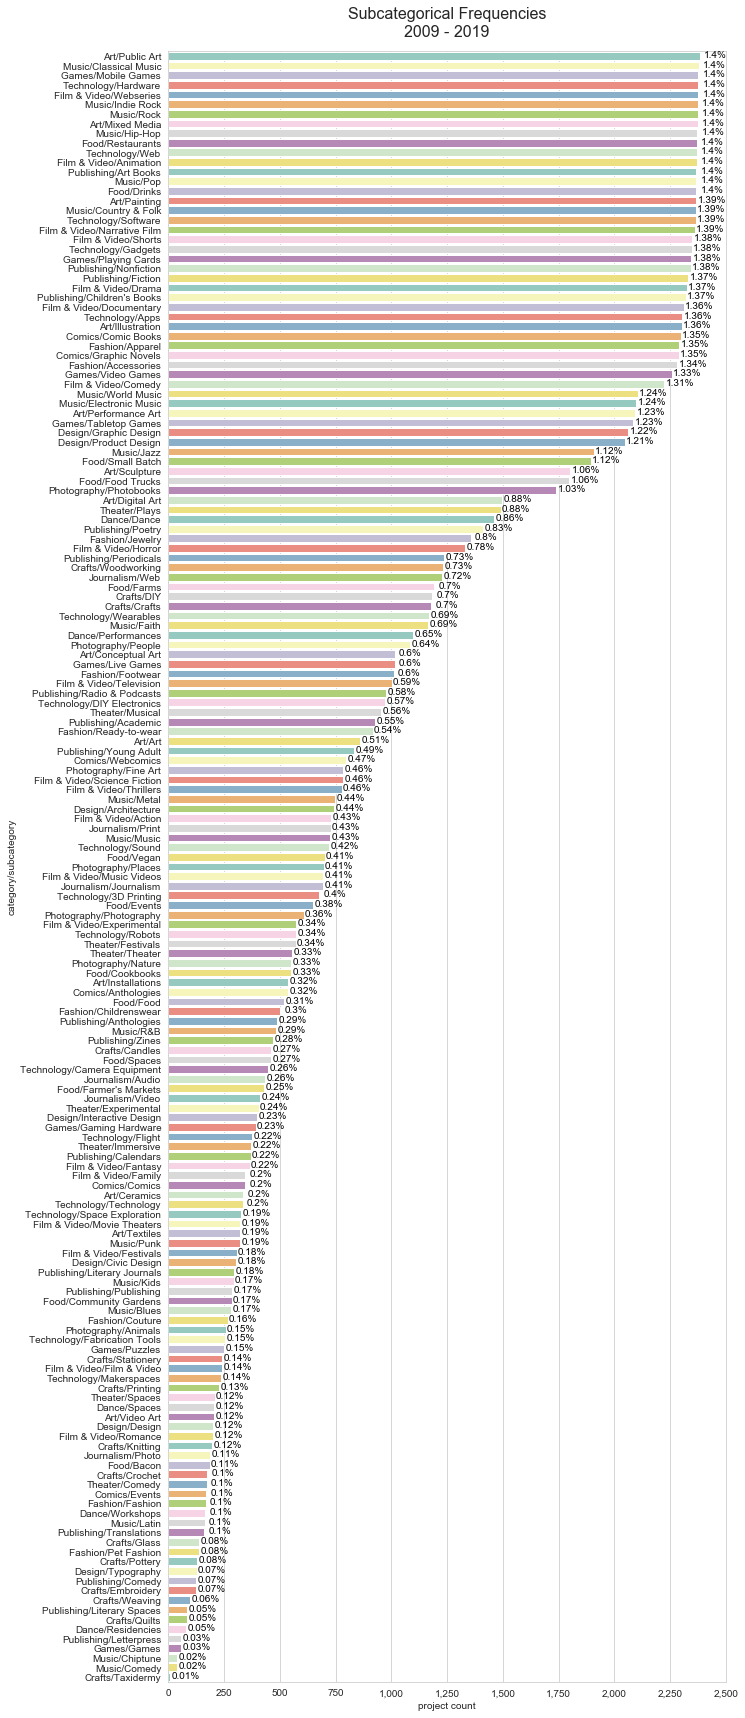

In [63]:
# settings
plt.figure(figsize=[10,30])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="Set3",
                   order=ks_compl.comb_cat.value_counts().index);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+70, loc+0.15, cat_rate, ha='center', color="black")
    
# labels and ticks
plt.title("Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15);
plt.ylabel("category/subcategory")
format_xticks(ks_compl.comb_cat.value_counts().values.max(), 250)
plt.xlabel("project count")
plt.show()    

**Best Of Categories/Subcategories**  
Since there are so many subcategories, I'm going to plot the top and bottom proportion of combined categories.

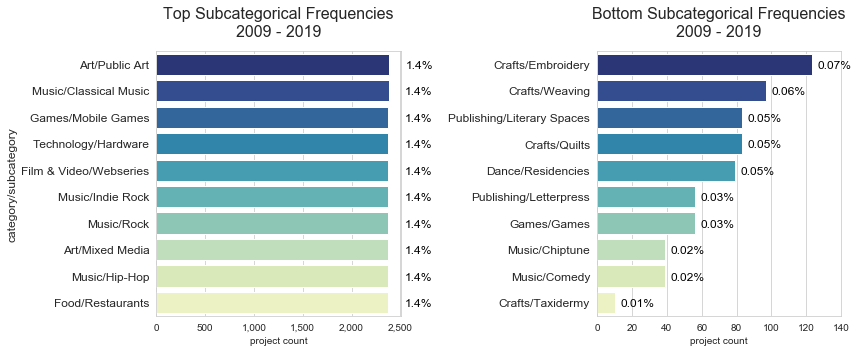

In [64]:
# save 10 most popular combined categories
pop_subcats = ks_compl.comb_cat.value_counts().index[:10]

# save 10 most uncommon combined categories
unpop_subcats = ks_compl.comb_cat.value_counts().index[-10:]

# settings
plt.figure(figsize=[12,5])

# left plot: top subcategorical count as horizontal bars
plt.subplot(1,2,1)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=pop_subcats);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+310, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)

# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.title("Top Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15); 
format_xticks(ks_compl.comb_cat.value_counts().values.max(), 500)
plt.xlabel("project count")


# right plot: top subcategorical count as horizontal bars
plt.subplot(1,2,2)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=unpop_subcats);
plt.title("Bottom Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15);

# annotate proportions
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+13, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)
      
# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory")
format_xticks(130,20)
plt.xlabel("project count")
plt.ylabel("")
plt.tight_layout()
plt.show()    

####  Most Popular Categories With Respective Subcategories

Let's take a look on the 6 most common categories in depth. By separating the top 6 categories into subplots to evaluate respective top 10 subcategories, I hope to shed light what kind of projects are typically being crowdfunded on Kickstarter. 

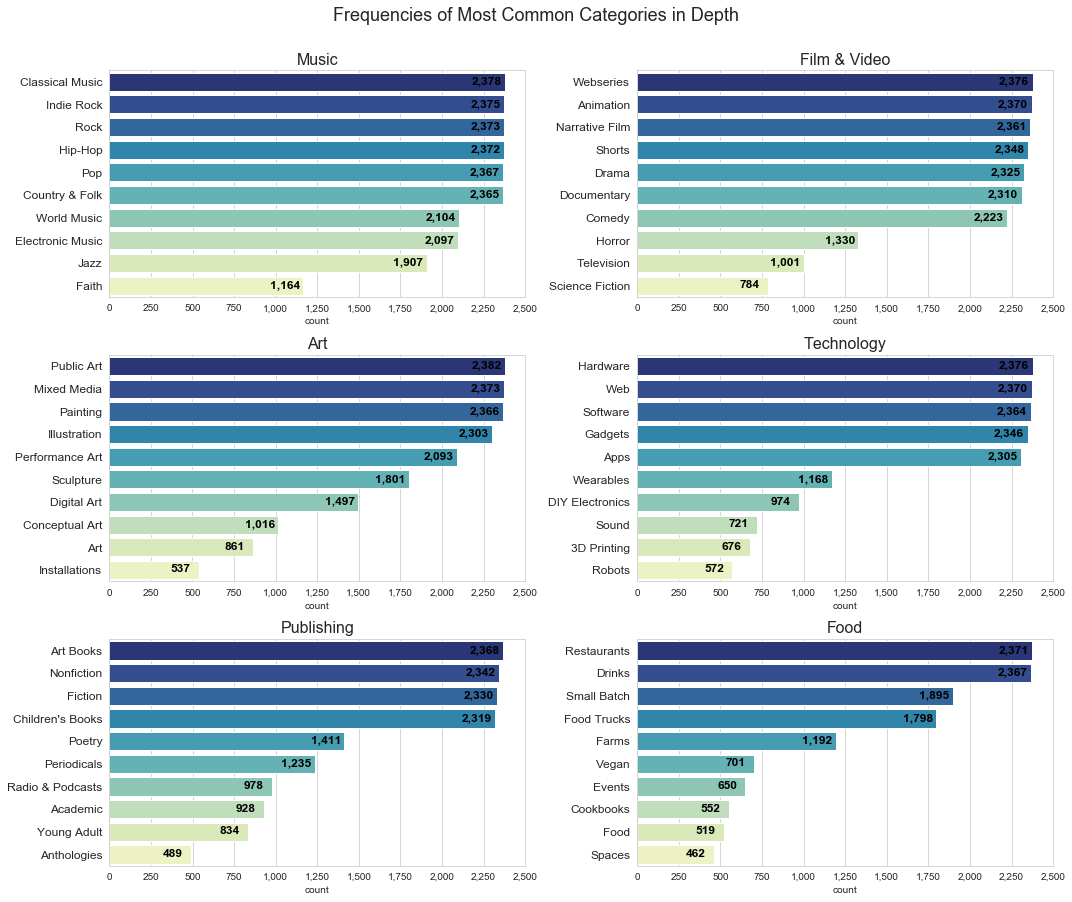

In [65]:
# settings
plt.figure(figsize=[15,12])


# subplots
for i, cat in enumerate(ks_compl.category.value_counts().index[:6]):
        # filter dataframe by category
        ks_compl_cat = ks_compl.query('category == @cat')
        
        plt.subplot(3, 2, i+1)
        # plot horizontal bars
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', palette='YlGnBu_r',  
                           order=ks_compl_cat.subcategory.value_counts()[:10].index);
        # labels and ticks
        plt.yticks(fontsize=12)
        plt.ylabel("")
        plt.subplots_adjust(bottom=-0.1)
        format_xticks(ks_compl_cat.subcategory.value_counts().max(),250)
        
        # annotate
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.title(f"{cat}", fontsize=16)
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-110, loc+0.1, format_num(count), ha='center', 
                     color="black", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle("Frequencies of Most Common Categories in Depth", fontsize=18, y=1.04)
plt.show()

The above plots demonstrate the strong creative focus and B2B character of crowdfunding campaigns on Kickstarter. We can confirm that _Music_, _Film & Video_ and _Art_ were among the most frequent project categories. 

By taking a more detailed look on subcategorical values, we found _Public Art_, _Classical Music_ and _Mobile Games_ as the most popular project types. The proportion of those subcategories was 1.4% each. Notice that the relative distribution of subcategories is relatively even. About one third of all subcategories range between relative shares of 1.4% to 1% of all projects. Thus, we do not find outstanding dominant subcategories.

Generally, we clearly recognize a focus on creative disciplines on Kickstarter. At the top of most categories we find ventures like Public Art, Classical Music, Art Books and Web Series. From a business perspective without knowing the details, such kind of projects are usually not known to speak to the public mainstream; nor are they known to generate high commercial incomes. 

From an professional investor's perspective tech projects and food projects may have the greatest potential to break out of the low commercial potential. Although many of their subcategories (e.g. vegan, small batch, gadgets and wearables etc.) indicate a creative, niche character. 

Due to mostly creative industries being represented here, we do not expect Kickstarter to be relevant for entrepreneurial ventures of a strong for-profit focus, nor high capital intensity, nor B2B projects. However, this makes only sense since crowdfunding as a financial tool attracts a private audience instead of professional investors. 


## Featured
**How did Kickstarter support campaigns?**  

As a next step, I'm going to investigate how Kickstarter supported projects. Let's start by plotting the value counts of the data point _"featured"_.

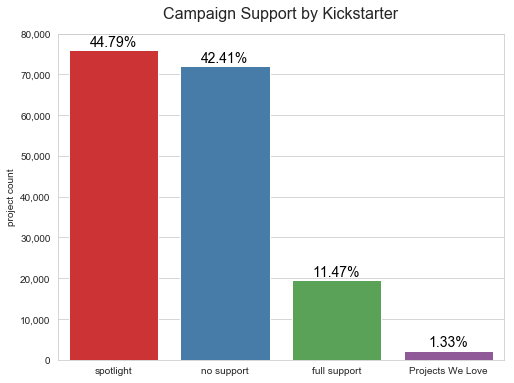

In [66]:
# settings
plt.figure(figsize=[8,6])

# order
feat_order = ks_compl.featured.value_counts().index

# plot vertical bars
ax = sns.countplot(data=ks_compl, x='featured', color=sns.set_palette(feat_color),
                   order=feat_order)

# annotate percentages
for i, feat in enumerate(feat_order):
    rate = (ks_compl.featured.value_counts().values[i] / n_compl_projects) * 100
    plt.text(i, ks_compl.featured.value_counts().values[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("")
format_yticks(80000, 10000)
plt.ylabel("project count")
plt.title("Campaign Support by Kickstarter", fontsize=16, pad=15);
plt.show();

44.8% of all projects were spotlighted by Kickstarter on their landing page. Nearly the same amount of projects didn't get the chance of any support by Kickstarter. Every 11th project got fully featured by Kickstarter. To be precise, 11.47% of all completed projects were featured on the landing page and were additionally picked by staff for the "Projects We Love" badge. Only a very small amount of project were awarded the badge, but were not promoted any further. Overall, more than every second project got some kind of support by Kickstarter. 

### Duration
I suspect the funding duration to influence the probability of success and failure of project. Thus, I visually assess duration next.

**How is funding duration distributed across projects?**

In [67]:
ks_compl.duration.value_counts().head()

30 days 00:00:00    59700
60 days 00:00:00    8356 
29 days 23:00:00    6883 
30 days 01:00:00    5781 
45 days 00:00:00    4503 
Name: duration, dtype: int64

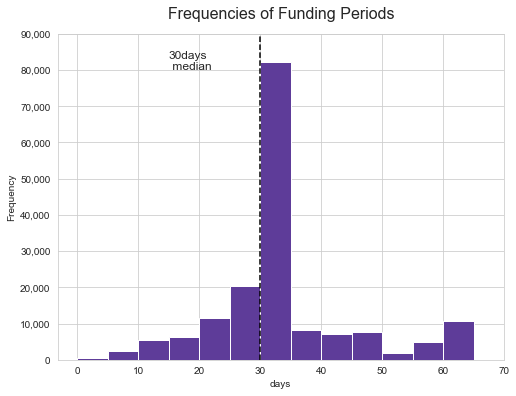

In [68]:
# settings
plt.figure(figsize=[8,6])

# plot histogram of project duration
ks_compl['duration_days'].plot.hist(color=duration_color, bins=np.arange(0, 70,5))

# annotate median duration
plt.axvline(ks_compl['duration_days'].median(), color='black', linestyle='--')

# labels and titles
plt.title("Frequencies of Funding Periods", fontsize=16, pad=15 );
plt.text(15, 80000, str(ks_compl['duration_days'].median())[:-2] + "days\n median", fontsize=12)
format_yticks(90000,10000)
format_xticks(70,10)
plt.xlabel("days")
plt.show()

The above normally distributed plot shows that funding durations around 30 days strongly dominated. Additionally, there is second modal peak in durations between 60-65 days.

## Goals

I assume that goals are one of the main predictors on whether a project succeeds or fails. From the above statistical assessment, I expect my visuals to be extremely skewed to the right. In order to make the plots readable, I will use different techniques. Aside from using the 95% quantile data frame, I will use log scales and I will group the data in multiple goal levels. 

**How are goals distributed across completed campaigns?**

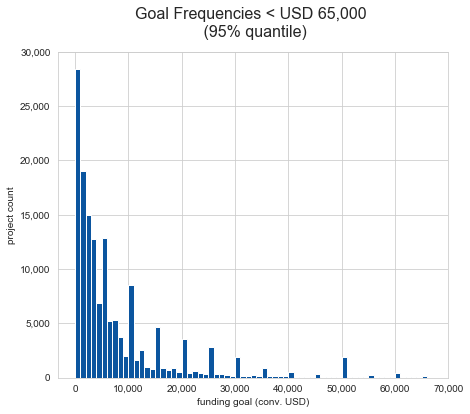

In [69]:
# style
plt.figure(figsize=[7,6])

# Create bins
bin_edges = np.arange(0, ks_compl_95.goal_hist_usd.max()+1000, 1000)

# plot bars of 95% quantile data
plt.hist(data = ks_compl_95, x = 'goal_hist_usd', bins = bin_edges, color=goal_color);

# labels and titles
plt.title("Goal Frequencies < USD 65,000 \n (95% quantile)", fontsize=16, pad=15)
format_xticks(goal_95, 10000)
plt.xlabel("funding goal (conv. USD)")
format_yticks(30000, 5000)
plt.ylabel("project count")

plt.show()

The visualization above depicts the distribution funding goals of the 95% quantile of all completed projects. Be aware that funding goals are cut off at USD 65,000. Plotting the actually goals up to {{format_num(goal_max)}} would skew the curve further and result in an unreadable plot. Notice the accumulation of low funding goals and the long right tail of the plot. Characteristic for the above distribution are the multimodal peaks of funding goals that seem to occur on a regular frequency. 

To better understand the distribution of funding goals, I will again plot the goal distribution of all completed project; this time using a logarithmic scale. 

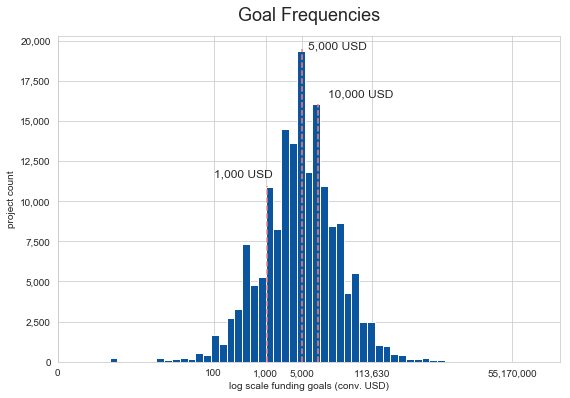

In [70]:
# settings
plt.figure(figsize=[9,6])
base_color = sns.color_palette("Blues_r")[0]

# create log scale and bin data 
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotations

# calculate peaks
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [format_num(peak) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.96, linestyle="dashed")
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed")
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed")
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

# labels and ticks
plt.title("Goal Frequencies", fontsize=18, pad=15)

format_yticks(20000, 2500)
plt.ylabel("project count")

x_ticks = [0.1, 100, 1000, goal_50,  round(goal_975,2), round(goal_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('log scale funding goals (conv. USD)')

plt.show()

In contrast to the previous plot, this plot uses the full range of funding goals, including extremes and outliers. Using a log scale on the x-axis results in an rather symmetrical normal distribution of goals: the highest peak is at the median of USD 5,000, the second highest peak is at USD 10,000. 

However, by using a log scale, the above visualization hides the extremely skewed nature of funding goals and may lead to misinterpretation. Moreover, the local maxima of funding goals are not as obvious. To bring the analysis of goals to the next level, I'm going to split goals into groups based on their aforementioned quantiles.   

In [71]:
# bin observations into ordinal goal categories
bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_975, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)
ks_success_95['goal_level'] = pd.cut(ks_success_95['goal_hist_usd'], bin_edges, labels=bin_names)
ks_fail_95['goal_level'] = pd.cut(ks_success_95['goal_hist_usd'], bin_edges, labels=bin_names)

# create data frames filtered by each goal levels
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]

# cluster leveled data frames into a list
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# show counts per goal level
ks_compl.goal_level.value_counts()

medium             48853
low                43542
moderately high    34852
high               33931
very high          4242 
extreme            4224 
outliers           17   
Name: goal_level, dtype: int64

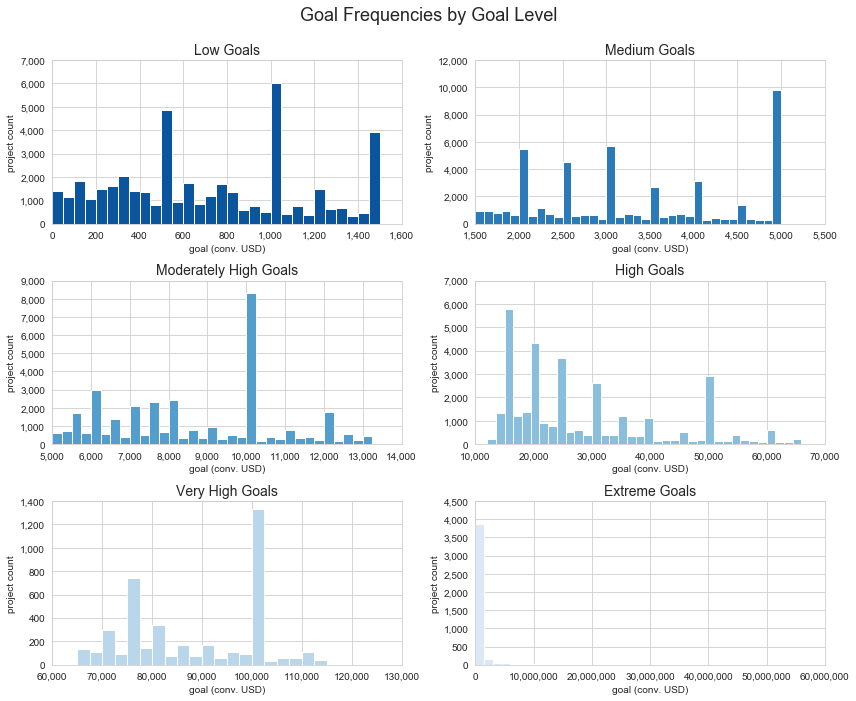

In [72]:
# style
fig = plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

bin_sizes = [50, 100, 250, 1500, 2500, 1500000]
for i, level in enumerate(bin_names[:-1]):
    plt.subplot(4, 2, i+1)
    # create bins 
    bin_edges_leveled = np.arange(0, ks_goal_leveled[i].goal_hist_usd.max()+bin_sizes[i], bin_sizes[i])
    # plot frequencies
    plt.hist(data = ks_goal_leveled[i], x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[i])
    
    # labels and ticks
    plt.title(level.title() +" Goals", fontsize=14)
    plt.xlabel("goal (conv. USD)")
    plt.ylabel("project count")
    plt.xlim(bin_edges[i],)
    xlocs, xlabels = plt.xticks()
    xlabels = [format_num(xloc) for xloc in xlocs]
    plt.xticks(xlocs, xlabels)
    ylocs, ylabels = plt.yticks()
    ylabels = [format_num(yloc) for yloc in ylocs]
    plt.yticks(ylocs, ylabels)
    
    plt.subplots_adjust(bottom=-0.3)

plt.suptitle("Goal Frequencies by Goal Level", fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

Here, goals were plotted leveled by their quantiles to guide the attention towards its multi-modal peaks. Due to long right tail and to improve readability of the above graphs, I limited the graphs to goals under USD 55 mi.   

We experience strong outliers at the upper end of funding goals that are not easily to depict in a plot. In spite of splitting goals into levels, the trend of lower goals in each category is still noticeable; yet there are remarkable peaks in each plot that seem to march to a different drummer. To name a few common goals: USD 500, 1000, 1500, 5,000, 10,000 and 100,000. Below, I will programmatically calculate the most important modes by goal level.  

In [73]:
# print summary
for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {format_num(frequencies[i])}, count: {format_num(freq_counts[i])}")


Frequency peaks of low goal projects:
USD 1,000, count: 5,735
USD 500, count: 4,275
USD 1,500, count: 3,592
USD 300, count: 1,288
USD 1,200, count: 1,134

Frequency peaks of medium goal projects:
USD 5,000, count: 9,534
USD 3,000, count: 5,338
USD 2,000, count: 5,112
USD 2,500, count: 4,062
USD 4,000, count: 2,854

Frequency peaks of moderately high goal projects:
USD 10,000, count: 8,080
USD 6,000, count: 2,508
USD 8,000, count: 2,093
USD 7,000, count: 1,628
USD 7,500, count: 1,621

Frequency peaks of high goal projects:
USD 15,000, count: 4,426
USD 20,000, count: 3,826
USD 25,000, count: 3,165
USD 50,000, count: 2,782
USD 30,000, count: 2,301

Frequency peaks of very high goal projects:
USD 100,000, count: 1,266
USD 75,000, count: 585
USD 80,000, count: 255
USD 70,000, count: 201
USD 85,000, count: 110

Frequency peaks of extreme goal projects:
USD 150,000, count: 410
USD 250,000, count: 319
USD 200,000, count: 277
USD 500,000, count: 206
USD 300,000, count: 149


There is a wide range of funding goals. Generally speaking, lower funding goals under ~15,000 are more common. We experience strong outliers at the high end of funding goals that go up into several millions. 

Our plots show a right-skewed goal distribution across all goal levels with multimodal peaks. Typically, there are peaks around whole numbers. The most frequent goals are: USD 5,000, USD 10,000, USD 1,000 and USD 3,000. 

### Pledged

**How is the amount of funding distributed across completed projects?**

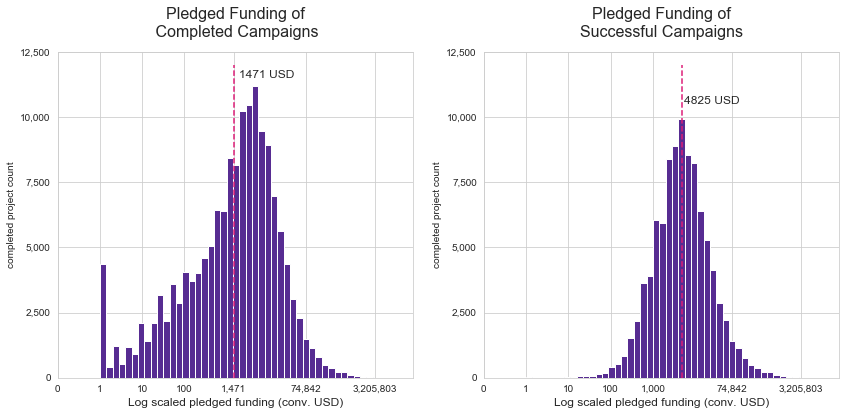

In [74]:
# settings
plt.figure(figsize=[14,6])
base_color = sns.color_palette("Purples_r")[0]

# left plot: pledged amount all completed projects
plt.subplot(1,2,1)
# create log scale and bin data 
df = ks_compl.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(pledged_50), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(pledged_50)) + " USD", xy=(np.log10(pledged_50+500), 11500),fontsize=12)

# labels and ticks
plt.title("Pledged Funding of\n Completed Campaigns", fontsize=16, pad=15)

format_yticks(12500,2500)
plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, pledged_50,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

# right plot: pledged amount all completed projects
plt.subplot(1,2,2)

# create log scale and bin data 
df = ks_compl_success.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(df.median()), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(df.median())) + " USD", xy=(np.log10(pledged_50+4000), 10500),fontsize=12)

# labels and ticks
plt.title("Pledged Funding of\nSuccessful Campaigns", fontsize=16, pad=15)

format_yticks(12500,2500)

plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, 1000,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

plt.show()

Above I depicted the log scaled distribution of pledges. First for all completed projects, and second for successful projects only. 

In contrast to the distribution of goals, the bell curve of the pledged funding of all completed projects is non-symmetrical. The top of the curve is right off the median of USD 1,471. In spite of the right-skewed character of pledges, very low amounts of pledges are common on completion of the funding period. A remarkable number of ventures actually ends a campaign with no funding at all. Please note, that due to the log scale used, all zero pledges are counted into the first bin of our histogram.

This result doesn't surprise if we take a look at the plot on the right. Only considering successful projects forms a symmetrical normally distributed curve. The axial shift towards very low pledges is disappeared. On average successful projects generated median earnings of USD 4,825.

### Backers

Let's move our attention to the number of supporters. By plotting the distribution of backers of completed projects, I hope to find answers to the question: How many backers does a projects usually achieve? And what number does it usually take to end a campaign in success? 

**How is the number of supporters distributed across projects?**

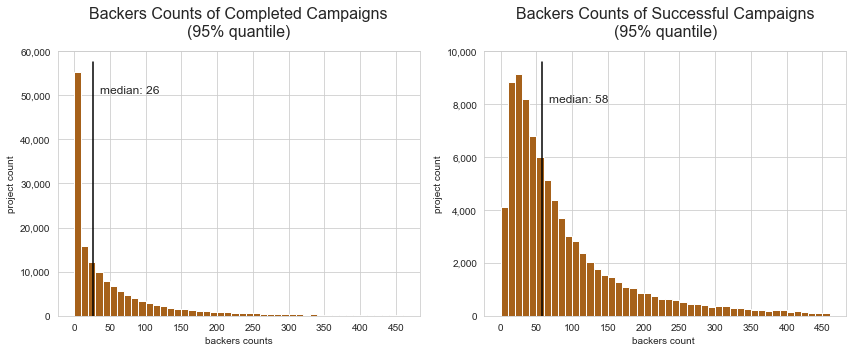

In [75]:
# to depict distribution of backers, use 95 quantile dataframe
plt.figure(figsize=[12,5])
bin_edges = np.arange(0, ks_compl_95['backers_count'].max()+10, 10)

# left plot: total distribution of backers of all completed projects
plt.subplot(1,2,1)
plt.hist(data = ks_compl_95, x = 'backers_count', bins= bin_edges, color=backers_color);

# labels and titles
plt.title("Backers Counts of Completed Campaigns\n(95% quantile)", fontsize=16, pad=15)
format_xticks(450, 50)
plt.xlabel("backers counts")
format_yticks(60000, 10000)
plt.ylabel("project count")

# annotate median
ax = plt.gca()
ax.axvline(x=backers_50, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50)), xy=(backers_50+10, 50500),fontsize=12)

# right plot: total distribution of backers of successful projects
plt.subplot(1,2,2)
plt.hist(data = ks_success_95, x = 'backers_count', bins=bin_edges, color=backers_color);

# annotate median
ax = plt.gca()
backers_50_s = ks_success_95.backers_count.median()
ax.axvline(x=backers_50_s, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50_s)), 
            xy=(backers_50_s+10, 8050),fontsize=12)

#labels and titles
plt.title("Backers Counts of Successful Campaigns\n(95% quantile)", fontsize=16, pad=15)
format_yticks(10000, 2000)
plt.ylabel("project count")
format_xticks(450, 50)
plt.xlabel("backers count ")

plt.tight_layout()
plt.show()

The above plots describe the distribution of the number of backers per project. On the left side, I took all completed projects into account, whereas the right plot considers successful projects only. In order to improve readability, I renounced very high and extreme backers counts by displaying 95%-quantile data.    

The distribution of the number of supporters across all completed projects demonstrates the dominance of a low number of backers. More than a quarter of all completed ventures won less than 10 supporters. Our plot describes a steep decline after the 10 backers benchmark. The number of occurrences decreases smoothly thereafter; with a higher number of supporters becoming less and less common.  

If we draw our attention to the plot on the right, we find a different picture. The right plot visualizes only successful campaigns. On average successful campaigns completed the funding with 58 supporters. However, most successful campaigns were supported by 20-30 backers. Higher number of backers became more and more unlikely. The 95% quantile data maxes at 450 backers per project.

To improve interpretation, I'm going to try a log scale approach below for the 95 quantile of successful projects.

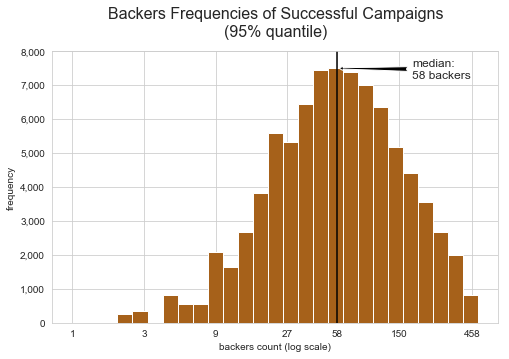

In [76]:
# plot using log scale
plt.figure(figsize=[8,5])

# log transform data 
log_data = np.log10(ks_success_95['backers_count']) 
log_bin_edges = np.arange(0.001, log_data.max()+0.1, 0.1)

# plot
plt.hist(log_data, bins = log_bin_edges, color=backers_color)

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(backers_50_s), color='black')

# annotate binned peak
ax.annotate("median:\n" + str(round(int(backers_50_s))) + " backers", fontsize=12,
            xy=(log_trans(backers_50_s), 7490), 
            xytext=(log_trans(backers_50_s)+0.5,7200),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
tick_locs = [1, 3, 9, 27, int(round(backers_50_s)), 150, int(round(backers_95))]
plt.xticks(np.log10(tick_locs),tick_locs)
plt.xlabel("backers count (log scale)")

format_yticks(8000,1000)
plt.ylabel("frequency")
plt.title("Backers Frequencies of Successful Campaigns\n(95% quantile)", fontsize=16, pad=15)

plt.show()

The above visualization shows the distribution of backers counts of successful projects using a log scale on data to offset the long right tail. The log-scale approach reveals a non-symmetrical bell shape of backers. In contrast to the relatively smoothly decreasing curve on the right side, the low side of backers counts describe a more irregularly shaped curve with pronounced ocuurences of low numbers of backers per project. 

50% of all successful campaigns stay below a number of {{backers_50_s}} supporters, whereas the upper half of the data can go up to roughly 460 backers. At this point, I'd like to remind that we depicted the 95% interval of data above. The actual highest backers count was {{format_num(ks_compl_success.backers_count.max())}}.

After analyzing each data point individually, I gained a general understanding about my data set. In the following section, I'm going to relate variables against each other. The relationship of the variables will allow me to answer my research questions:

## 6.1  Is it still worthwile financing your project on Kickstarter, now that crowdfunding has become mainstream?<a name="mainstream"></a>

Crowdfunding caused quite a stir in the recent years. More and more project creators recognized crowdfunding as a form of investment and launched campaigns. They sought investments from private supporters, instead of professional investors or banks. Since then, multiple platforms for specific purposes, applying different variations of crowdsourcing evolved globally. 
With the rise of competitors, campaign creators likely face bigger challenges courting for attention and investment. Media often enough report about scams and unprofessional businesses which additionally may have deterred potential supporters from pledging their money. 

In the light of crowdfunding becoming popular among a large global audience, I'm curious how its popularity and the saturated market affected campaigns. With thousands of campaigns competing against each other globally, we would expect lower chances to succeed today. Than, it would also make sense that project creators had to lower their fundraising expectations.     

In the following analysis, I'm going to investigate how crowdfunding as an investment opportunity has evolved over time on Kickstarter. In particular, my goal is to find an answer if running a campaign today pays off compared to previous years. Did the overall conditions worsen due to the Kickstarter's popularity? How may have campaign characteristics changed on Kickstarter's 10th anniversary, compared to previous years?




The general doubts about crowdfunding in news articles inspired me to investigate how crowdfunding as an investment opportunity has evolved over time on Kickstarter. 

Kickstarter's general statistics above are quite impressive. In spite of this data set being incomplete due to the cleaning, there was nearly USD 2 billion of successfully raised funding recorded, distributed across {{format_num(n_success)}} projects. 

Crowdfunding caused quite a stir in the recent years. More and more project creators recognized crowdfunding as a form of investment and launched campaigns. They were seeking investments from a private audience, instead of professional investors or venture capitalists. Since then, multiple platforms with specific purposes and different types of crowdsourcing evolved globally. With the rise of competitors, campaign creators likely face a bigger challenge courting for attention and investment. 

There certainly is a high chance to fail: {{round(p_compl_fail*100)}}% of projects did not make it. Due to Kickstarter's approach to only distribute the collected investment once the funding goal was met, creators end with all or nothing. Because of failure, creators may have to deal with unnecessary loss of reputation.

Crowdfunding is usually considered as an early-stage investment. The early exposure of product details may cause an increased risk for IP theft and plagiarism, as studies indicate. Recent news reports and public legal trials of creators abusing the collected investment may additionally have put off the public investor audience. 

In the light of crowdfunding becoming popular among a large global audience, I'm curious how its popularity affected campaigns on Kickstarter. How exactly have campaign characteristics changed today, on Kickstarter's 10th anniversary, compared to previous years? Ultimately, I would like to investigate how the chances to successfully fund a project have been developing. 

This research topic clearly implies a time component. Hence, I'm going to depict the most relevant characteristics of our data set on a time line. First of all, let's dig into Kickstarter's historical prosperity.  

To plot the absolute counts of projects across a 10 year period, I'm going to group completed projects by year and month of its campaign deadline and store the data in a separate data frame. Due to zero counts in some of the months, I will manually create a monthly index and add zero values to missing months. 

In [77]:
# create dataframe
df_project_counts = pd.DataFrame(data={'total': [0.0]*120, 
                              'success':  [0.0]*120, 
                              'failed':  [0.0]*120, 
                              'date': dates})

# fill data frame with absolute project counts per month
for df, label in [(ks_compl, 'total'), (ks_compl_success, 'success'), (ks_compl_failed, 'failed')]:
    # calculate monthly abs. project counts
    counts = df.groupby([df.deadline.dt.year, df.deadline.dt.month])\
                        .count()['project_id']
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_project_counts[label] = counts
    
df_project_counts.tail(5)

total  success  failed       date
115  2396   1582     814    2018-12-01
116  1577   959      618    2019-01-01
117  1894   1323     571    2019-02-01
118  2604   1916     688    2019-03-01
119  1478   1061     417    2019-04-01

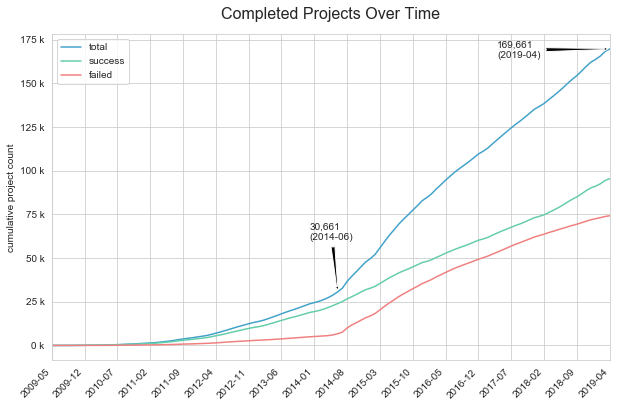

In [78]:
# settings
plt.figure(figsize=[10,6])

# plot cumulative sum of project month after month of completed projects
for i, col in enumerate(df_project_counts.columns[:-1]):
    # calculate cumulative sum and plot
    ax = df_project_counts[col].cumsum().plot(color=status_colors[i])

# annotate June 2014
ax.annotate(format_num(df_project_counts.total.cumsum().values[61]) + "\n(2014-06)", 
            xy=(61, df_project_counts.total.cumsum().values[61]), 
            xytext=(55,df_project_counts.total.cumsum().values[61] + 30000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# annotate current number of projects 
ax.annotate(format_num(df_project_counts.total.cumsum().values[-1])+ "\n(2019-04)", 
            xy=(119, df_project_counts.total.cumsum().values[-1]), 
            xytext=(95,df_project_counts.total.cumsum().values[-1]- 5000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))    
    
# labels and titles
plt.title("Completed Projects Over Time", fontsize=16, pad=15)
plt.xlabel('campaign deadline (year, month)')

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel('cumulative project count')

# improve readability of y ticks
timeline_ticks(df_project_counts)

plt.legend()
plt.show()

After Kickstarter's start in April 2009, it took about 3 years until the platform gained momentum. By 2012, the number of projects started picking up speed slowly. Yet, it took another two years for Kickstarter to thrive. Suddenly, by mid 2014, the number of projects took a sharp upward turn. Ever since, project counts have been linearly increasing. By June 2014, we recorded a number of {{format_num(df_project_counts.total.cumsum().values[61])}} completed campaigns. In the following five years the absolute count had risen by a factor of six up to {{format_num(df_project_counts.total.cumsum().values[-1])}} projects. 

**Do creators have to fear a higher risk of failure since crowdfunding became mainstream?**

Interestingly, the absolute counts of failed and successful campaigns performed differently. Successful projects have been growing smoothly since mid 2012. In contrary, failed campaigns kept at a low rate up until Kickstarter's boom in mid 2014. Notice the sudden bend in the red line above. Afterwards, failed campaigns became more common. Failed got closest to successful project counts in the years 2016 and 2017. Yet, the absolute counts of failed campaigns never exceeded successful campaigns. 

In the recent one and a half years however, the counts of successful and failed projects was diverging. The good news for potential creators: counts of failed campaigns have been in a slight recession recently. 

Instead of visualizing cumulative project counts, I'm going to analyze the number of campaigns being completed month-by-month over the past 10 years.   

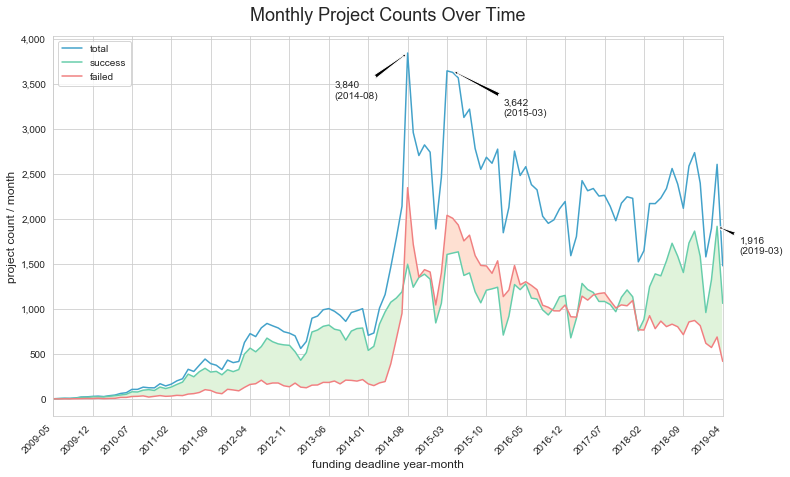

In [79]:
# settings
plt.figure(figsize=[12,7])

# plot monthly counts of projects of completed projects by month over time
for i, col in enumerate(df_project_counts.columns[:-1]):
    ax = df_project_counts[col].plot(color=status_colors[i])

# annotate peaks
ymax_1  = max(df_project_counts.total)
xmax_1 = str(df_project_counts[df_project_counts.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1) + "\n(" + str(xmax_1) + ")", xy=(63, ymax_1), 
            xytext=(50, ymax_1-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = df_project_counts.total.sort_values().values[-2]
xmax_2 = str(df_project_counts[df_project_counts.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2) + "\n(" + str(xmax_2) +")", xy=(71, ymax_2), 
            xytext=(80, ymax_2-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_3  = max(df_project_counts.success)
xmax_3 = str(df_project_counts[df_project_counts.success == ymax_3].date.values[0])[:7]
ax.annotate(format_num(ymax_3) + "\n(" + str(xmax_3)+")", xy=(118, ymax_3), 
            xytext=(122, ymax_3-300),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))


# highlight differences
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed , 
                where=df_project_counts.failed >= df_project_counts.success, 
                facecolor=fill_red, interpolate=True)
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed, 
                where=df_project_counts.success >= df_project_counts.failed, 
                facecolor=fill_green, interpolate=True)

# # labels and titles
plt.title("Monthly Project Counts Over Time", fontsize=18, pad=15)

ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('project count / month', fontsize=12)

timeline_ticks(df_project_counts)
plt.xlabel('funding deadline year-month', fontsize=12)

plt.legend(loc=2)
plt.show()

The blue plot of projects ending each month over Kickstarter's lifespan allows more detailed insights how it developed as a tool of investment over the past years.

During the first 4 years, the platform's campaign activities increased at a slow but steady rate. Then, by the beginning of 2014, suddenly Kickstarter's performance exploded. Within a few months the number of campaigns rocketed and reached an all time high. {{format_num(ymax_1)}} projects terminated in August 2014. Over the following months project counts dropped significantly; yet staying on a far higher level than before the hype occurred. Shortly after, there was a second very high peak by March/April 2015.  
In the following five years, the number of projects settled down, fluctuating roughly around 2,000 projects ending each monthly. Most importantly, there has been a slight upward trend since 2018.     

Over the entire time, there have been remarkable activity setbacks on a cyclic basis. I suppose, the season or time of a year may be an explanation. I'm going to explore this topic later as it may be one factor contributing to success.  

If we turn our attention to the green and red lines of failed and successful projects, we notice an interesting pattern. Until the hype in August 2014, there have always been more successful than failed projects, growing at a stronger rate.  

When Kickstarter became popular, the number of failed ventures suddenly peaked and exceeded successful projects. Only by the end of 2016 successful and failed projects seemed to have balanced out.  

Then, by the beginning of 2018, Kickstarter turned the  monthly successful and failed project counts upside down. Ever since, campaigns ending in success have become more likely while flops have been declining notably. 2018 was a highly successful year for creators: {{round(len(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]) / len(ks_compl[ks_compl.deadline.dt.year == 2018])* 100, 2)}}% of campaigns celebrated successful funding. Actually, the highest number of successful campaigns ever was recorded only recently, in March 2019.  

To fully understand, Kickstarter's lifecycle, let's plot monthly growth rates.   

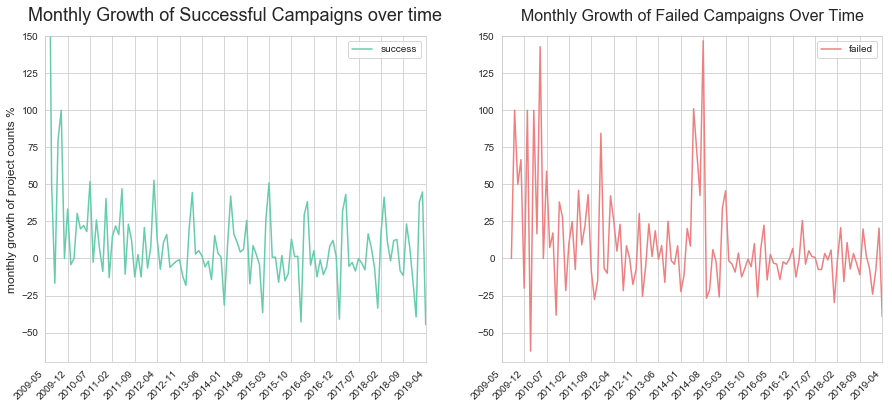

In [80]:
# settings
plt.figure(figsize=[15,6])
    
# calculate monthly growth rates of successful and black projects
success_r = df_project_counts['success'].pct_change()*100
failure_r = df_project_counts['failed'].pct_change()*100

# # left plot: monthly growth successful campaigns
plt.subplot(1,2,1)
ax = success_r.plot(color=cust_green)
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation
plt.legend()

# labels and titles
plt.title("Monthly Growth of Successful Campaigns over time", fontsize=18, pad=15)
plt.ylabel('monthly growth of project counts %', fontsize=12)
timeline_ticks(df_project_counts)

plt.subplot(1,2,2)
ax = failure_r.plot(color=cust_red)   
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation

plt.title("Monthly Growth of Failed Campaigns Over Time", fontsize=16, pad=15)
plt.ylabel('')
timeline_ticks(df_project_counts)

plt.legend()
plt.show()

The above plots depict monthly growth of successful and failed campaigns. Before Kickstarter's hype started, growth rates show stronger, but irregular amplitudes, especially in failed campaigns. The relative growth declined slightly until the hype year 2014. Then, failed campaigns skyrocketed. In contrast, growth of successful campaigns has been following a relatively regular 'heartbeat' since 2010. Growth rates of successful campaigns are clearly subject to seasonal fluctuations cycling around zero growth. Less so in failed campaigns.  

To conclude, according to our visualizations of project counts on a time line, we only see a strong amplitude of failed campaigns in 2014. During the hype year the chances to fail were certainly higher due to the strong growth rates. Ever since, we observed a falling trend of flop campaigns. 

Finally, by the beginning of 2018, chances of raising successfully have been increasing. At the same time, Kickstarter recorded a stronger gain in project numbers compared to previous years. 

While higher competition certainly impacted the hype year of 2014, we cannot confirm that due to more competition today, there is less of a chance to win a campaign. On the contrary, chances to succeed have never been better.

It is remarkable that in contrast to failed campaigns, the recent increase of successful campaigns was not affected by higher competition. In fact, growth rates of successful campaigns kept constant and have been increasing since 2018. They seem to develop independently from the mainstream effect of increased competition.     

To decide whether it's worth it to run a campaign in times of mainstream, a creator may consider success factors tight to the desired product itself, the platform environment and the time of the year.

**Did funding goals decrease since crowdfunding became mainstream?**  

As we found that creators have higher chances nowadays, detractors may argue that there was a trade-off between the amount of funding raised and success rates. After all, to spread the total financial capacity available on additional successful campaigns, may end in less funding for an individual creator.   

Thus, I'm going to plot the monthly median goals of completed projects on a time line. In order to avoid extreme values distorting the plot, I'm going to use the 95% quantile data frame. Adding a second plot with separate curves of successful and failed campaigns will help to answer the question, if creators may have sought for lower goals in exchange for increased chances of success.  

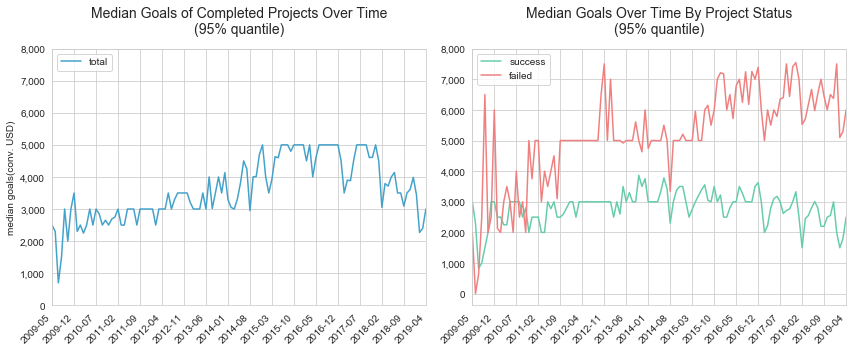

In [81]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median goals of completed projects of 95 quantile data frame
# total
goals_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['goal_hist_usd'].values
# success
goals_grouped_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month]).median()['goal_hist_usd'].values
# failed
ks_compl_95_f = ks_compl_95[ks_compl_95.status == 'failed']
goals_grouped_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month]).median()['goal_hist_usd'].values
# insert 0 occurence for 2009-6
goals_grouped_f = np.insert(goals_grouped_f,1,0) 

# create dataframe
df_goals = pd.DataFrame(data={'total':goals_grouped, 
                              'success':goals_grouped_s, 
                              'failed': goals_grouped_f, 
                              'date': dates})

# left plot: line plot of monthly median goals of all completed projects
plt.subplot(1,2,1)
ax = df_goals.total.plot(color=cust_blue);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
plt.tight_layout()
format_yticks(8000,1000)
plt.ylabel("median goals(conv. USD)")
plt.title("Median Goals of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median goals of successful anf failed projects
plt.subplot(1,2,2)
ax = df_goals.success.plot(color=cust_green);
ax = df_goals.failed.plot(color=cust_red);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
format_yticks(8000, 1000)
plt.ylabel("")
plt.title("Median Goals Over Time By Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()

plt.show()

The course of the line plots reminds me of a second degree polynomial curve. I find the seasonal fluctuations make the plot difficult to read. To draw a clearer picture, I'm trying a scatterplot approach, fitting a polynomial regression line. 

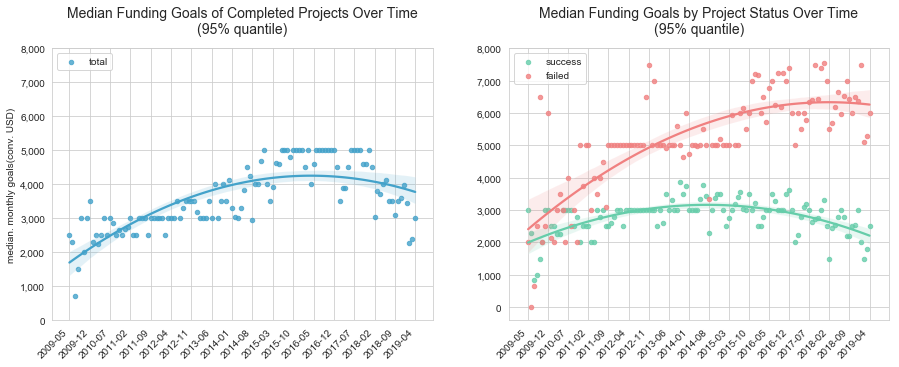

In [82]:
# scatterplots of monthly means and fit a polynomial regression of 2nd degree

# settings
plt.figure(figsize=[15,5])

# we got 120 months, so we chuck our x axis into 120 ticks
df_goals['date'] = np.arange(0, len(goals_grouped), 1)

# left plot: median goals of all completed projects
plt.subplot(1,2,1)
ax = sns.regplot(x=df_goals['date'].values, y=df_goals['total'], 
                 color=cust_blue,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="total");

timeline_ticks(df_goals)
format_yticks(8000, 1000)
plt.ylabel("median. monthly goals(conv. USD)")
plt.title("Median Funding Goals of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# # right plot: median goals of successful and failed projects
plt.subplot(1,2,2)
ax = sns.regplot(x=df_goals['date'], y=df_goals['success'],
                 color=cust_green,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="success");
ax = sns.regplot(x=df_goals['date'], y=df_goals['failed'],
                 color=cust_red,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="failed");

# ticks and labels
timeline_ticks(df_goals)
format_yticks(8000, 1000)
plt.ylabel("")
plt.title("Median Funding Goals by Project Status Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend()
plt.show()

In [83]:
df_goals

total             success              failed  date
0   2,500.0             3,000.0             2,000.0              0   
1   2,300.0             2,300.0             0.0                  1   
2   700.0               825.0               640.0                2   
3   1,500.0             1,000.0             2,500.0              3   
4   3,000.0             1,500.0             6,500.0              4   
5   2,000.0             2,000.0             2,000.0              5   
6   3,000.0             3,000.0             2,500.0              6   
7   3,497.5             3,000.0             6,000.0              7   
8   2,300.0             2,500.0             2,130.0              8   
9   2,500.0             2,500.0             2,000.0              9   
10  2,250.0             2,250.0             3,000.0              10  
11  2,500.0             2,250.0             3,500.0              11  
12  3,000.0             3,000.0             3,000.0              12  
13  2,500.0             3,000.0             2,000.0              13  
14  3,000.0             3,000.0             4,000.0              14  
15  2,850.0             3,000.0             2,500.0              15  
16  2,500.0             2,500.0             3,000.0              16  
17  2,650.0             2,800.0             2,000.0              17  
18  2,500.0             2,000.0             5,000.0              18  
19  2,689.0             2,500.0             3,750.0              19  
20  2,750.0             2,500.0             5,000.0              20  
21  3,000.0             2,500.0             5,000.0              21  
22  2,500.0             2,000.0             3,000.0              22  
23  2,500.0             2,000.0             4,000.0              23  
24  3,000.0             3,000.0             3,500.0              24  
25  3,000.0             2,775.0             4,000.0              25  
26  3,000.0             3,000.0             4,500.0              26  
27  2,500.0             2,500.0             3,100.0              27  
28  3,000.0             2,500.0             5,000.0              28  
29  3,000.0             2,600.0             5,000.0              29  
30  3,000.0             2,800.0             5,000.0              30  
31  3,000.0             3,000.0             5,000.0              31  
32  3,000.0             3,000.0             5,000.0              32  
33  2,500.0             2,500.0             5,000.0              33  
34  3,000.0             3,000.0             5,000.0              34  
35  3,000.0             3,000.0             5,000.0              35  
36  3,000.0             3,000.0             5,000.0              36  
37  3,500.0             3,000.0             5,000.0              37  
38  3,000.0             3,000.0             5,000.0              38  
39  3,300.0             3,000.0             5,000.0              39  
40  3,500.0             3,000.0             5,000.0              40  
41  3,500.0             3,000.0             6,500.0              41  
42  3,500.0             3,000.0             7,500.0              42  
43  3,500.0             3,000.0             5,000.0              43  
44  3,200.0             3,000.0             7,000.0              44  
45  3,000.0             2,500.0             5,000.0              45  
46  3,000.0             3,000.0             5,000.0              46  
47  3,000.0             2,600.0             5,000.0              47  
48  3,500.0             3,500.0             4,920.28748380457    48  
49  3,000.0             3,000.0             5,000.0              49  
50  4,000.0             3,300.0             5,000.0              50  
51  3,015.2349802633353 3,000.0             5,000.0              51  
52  3,500.0             3,000.0             5,606.804172638708   52  
53  4,000.0             3,865.2046782897723 5,000.0              53  
54  3,500.0             3,500.0             4,632.0671064604685  54  
55  4,134.788884992733  3,753.5936860451257 6,000.0              55  
56  3,290.8826919961484 3,00

In [84]:
# mean goals hype years
print("mean goal since 2014-2016: " + str(df_goals[(df_goals.date > 56) & (df_goals.date <= 92)]['success'].mean()))
# mean goals 2018
print("mean goal since 2018: " + str(df_goals[df_goals.date > 101]['success'].mean()))

mean goal since 2014-2016: 3113.6592454860156
mean goal since 2018: 2455.2079948571723


To find out how funding goals compare over time, I depicted their monthly median values. First, I used a line plot, but found the plot difficult to read because of strong seasonal fluctuations. Instead, I tried a scatterplot approach and fitted a second degree polynomial regression line to depict the relationship.  

In the early years funding goals were usually chosen around USD 2,000 - 3,000. They gradually increased and were highest in the years 2015-2017. Then, creators usually asked for USD 4,000 - 5,000. 

In the latest two years, goals have been setting back to the levels of earlier years. Project creators generally tend to take less optimistic goals in the recent years.

If we separate projects by their status into successful and failed campaigns, we notice an interesting behavior: successful campaigns generally aim for lower funding goals compared to failed campaigns. And the gap between them has been developing further apart. 

Failed median project goals tended to become more optimistic until the end of 2018. Then, we notice failed project goals to stagnate. 

Success goals have risen modestly during the hype years 2014 to early 2016, generally staying under median goals of USD 3,100. Ever since, success goals have been declining. Today, median goals are almost at the level of the initial level, close to USD 2,500. In comparison, failed goals were between USD 6000-7000 by April 2019.

In general, the widening of the gap suggests that not only the behaviour of project creators to define funding goals changed over time. I suspect changes in Kickstarter's overall financial capacity. Additionally, the willingness of supporters to pledge and or may has been decreasing concurrently. 

To conclude, the hype in 2014 positively impacted the goals. However, with Kickstarter becoming mature, we can confirm that successful funding goals have been decreasing.

A crowdfunding's success is not determined only by success or failure only. More important is likely the actual realised funding. Since a campaign does not end when reaching the goal was, creators can additionally collect the surplus generated until campaign deadline. So, let's turn our attention to the actual amount pledged now.  

**How did the funding capacity develop compared to goals over time?**  

To start with, I'm going to plot the monthly totals of project fundings on a 10 year monthly time line. Again, I'm going to work on the 95% quantile data frame to avoid distortion of pledges and goals. 

In [85]:
# assess monthly sum of fundings 
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().sort_values()

deadline  deadline
2009      5          3,354.0             
          6          11,566.48           
          8          14,829.470000000001 
          7          22,156.79           
          9          26,072.8            
          10         56,225.549999999996 
          11         85,538.90999999999  
2010      1          99,412.70999999999  
          3          109,432.06000000001 
          2          112,723.91          
2009      12         123,912.96999999999 
2010      4          190,511.56          
          5          208,593.24          
          6          256,623.92          
          11         365,861.37          
          7          382,823.57          
          8          387,223.06999999995 
          9          408,103.64          
2011      1          439,447.57999999996 
2010      10         478,213.6699999999  
2011      2          549,230.9099999999  
          3          638,044.7000000001  
2010      12         643,897.68          
2011      4    

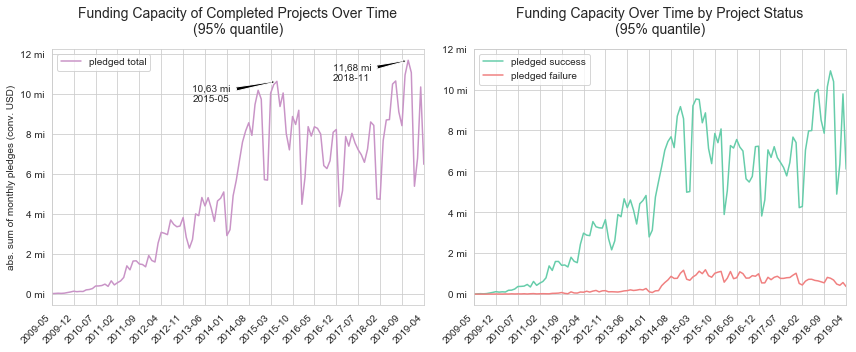

In [86]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# success
pledged_grouped_sum_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# failed
pledged_grouped_sum_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# insert 0 occurence for 2009-6
pledged_grouped_sum_f = np.insert(pledged_grouped_sum_f,1,0) 

# create dataframe
df_pledged_sum = pd.DataFrame(data={'total':pledged_grouped_sum, 
                                'success':pledged_grouped_sum_s, 
                                'failed': pledged_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_sum.total.plot(color=pledged_color, label='pledged total');

# annotate peaks
ymax_1  = max(pledged_grouped_sum)
xmax_1 = str( df_pledged_sum[df_pledged_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)[:5] + " mi" + "\n" + str(xmax_1), xy=(114, ymax_1), 
            xytext=(90, ymax_1- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_hist_usd']\
                              .sum().sort_values().values[-5]
xmax_2 = str(df_pledged_sum[df_pledged_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)[:5] + " mi" + "\n" + str(xmax_2), xy=(72, ymax_2), 
            xytext=(45, ymax_2- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("abs. sum of monthly pledges (conv. USD)")
plt.title("Funding Capacity of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median pledges of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_sum.success.plot(color=cust_green, label="pledged success");
ax = df_pledged_sum.failed.plot(color=cust_red, label="pledged failure");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)
plt.yticks(np.arange(0, 12000000+1, 2000000))
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Funding Capacity Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

In the beginning years, before the hype, monthly collected financial backing increased from zero to plus USD 4 mi. Then, by the beginning of 2014 the available funding skyrocketed. We recorded the 5th highest funding capacity of USD {{format_num(ymax_2)}} in {{xmax_2}}. From 2015 - 2017 the total investment capacity fell into a recession. However, by late 2017 pledges started to recover. Ultimately, 2018 was the year with highest recorded funding potential. In November, there was a record of USD {{format_num(ymax_1)}} financial backing available for all projects. 

On the right side, I divided pledged fundings into two plots: one for successful and one for failed projects. The curve of successful campaigns is remarkably similar to the plot on the left depicting the total amount pledged. Considering this, it doesn't surprise that the red curve of failed pledges stayed on a low level across the entire 10 years of recording. By beginning of 2015 "wasted" pledges started to rise a little bit to roughly 1 mi. They have been decreasing slowly since 2016. 
Apparently, the amount of "lost" investments has never been a significant problem. The overwhelming majority of funding flows into successful campaigns.

This suggests that there is usually no close race towards reaching a funding goal. There doesn't seem to be much ambiguity to whether a campaign appeals to the supporter audience, nor whether it will end in success or failure. However, this is a matter, we're going to explore within our second research question further. 

The above plots should tune creators more optimistic to run a campaign nowadays. In Kickstarter's history, there has never been more funding available. At the same, success rates in 2018 were on an all time high. However, comparing the plots of pledged funding to goals is entirely contradicting. 

We found that goals peaked during the years 2015 - 2017. At the same time, pledges and success rates fell into a recession. Then, 2018 was a record year of funding capacity, yet goals have been decreasing. Higher competition would be an explanation, so let's consider project numbers and plot pledges and goals relative to project counts. In the case of a continuous ratio between funding and projects, we'd expect a horizontal line. 

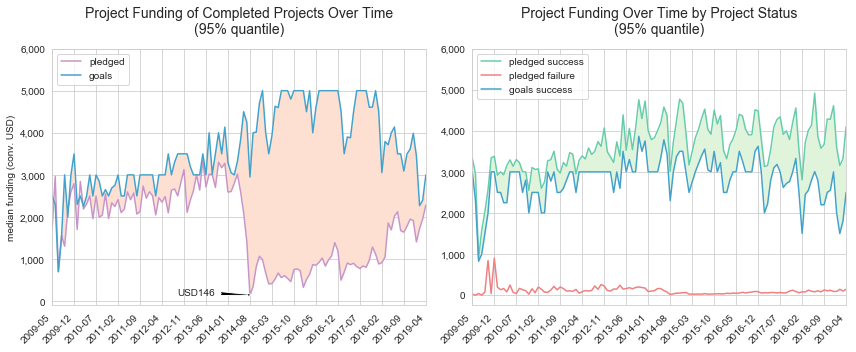

In [87]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_median = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# success
pledged_median_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# failed
pledged_median_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# insert 0 occurence for 2009-6
pledged_median_f = np.insert(pledged_median_f,1,0) 

# create dataframe
df_pledged_median = pd.DataFrame(data={'total':pledged_median, 
                                'success':pledged_median_s, 
                                'failed': pledged_median_f, 
                                'date': dates})

# # left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_median.total.plot(color=pledged_color, label='pledged');
ax = df_goals.total.plot(color=cust_blue, label='goals');

# highlight negative differences
ax.fill_between(np.arange(0,120), pledged_median, df_goals.total , 
                where=df_goals.total >= pledged_median, 
                facecolor=fill_red, interpolate=True)

# annotate minima
ymin  = min(pledged_median)
xmin = str(df_pledged_median[df_pledged_median.total == ymin].date.values[0])[:7]
ax.annotate("USD" + format_num(ymin), xy=(64, ymin), 
            xytext=(40, ymin),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
plt.tight_layout()
format_yticks(6000,1000)
plt.ylabel("median funding (conv. USD)")
plt.title("Project Funding of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of monthly median pledged of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_median.success.plot(color=cust_green, label="pledged success");
ax = df_pledged_median.failed.plot(color=cust_red, label="pledged failure");
# add goals successfull achieved to compare
ax = df_goals.success.plot(color=cust_blue, label='goals success');

# highlight overhead
ax.fill_between(np.arange(0,120), df_pledged_median.success, 
                df_goals.success , where=df_pledged_median.success >= df_goals.success, 
                facecolor=fill_green, interpolate=True)

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
format_yticks(6000,1000)
# plt.yticks(np.arange(0, 6000+1, 1000))
plt.ylabel("")
plt.title("Project Funding Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

Let's turn our attention first to the left plot. This time, I depicted the relative median amount pledged and added a line of the respective median goals. Over a period of 10 years, there has always been a little negative gap between the median goals and the median funding pledged. 

Most obviously, the relative funding per project dropped dramatically by mid 2014. From more than USD 3,000 in 2013 ending, the median pledged decreased to only USD 146 by August 2014. This event fell into the same time when the number of projects on Kickstarter exploded and the platform experienced a significant rise of funding in absolute numbers. This may indicate, that the number of creators and campaigns grew much faster than the count of backers actively supporting projects. In the light of this, competition likely was a main driver for failed and low funding per project in campaigns in 2014. 

Since Kickstarter's hype year 2014, the funding gap remained. The good news is: it has been recovering since 2018 significantly. The overhead between funding available and goals converged to the level of before 2014. On Kickstarter anniversary, creators retrieved a median overhead of investments above goals of USD 2,000. 

Comparing the purple line on the left to the green line on the right changes our perspective. The course of successful pledges draws a comparably horizontal line. Ignoring the seasonal fluctuations, the successful amount pledged has been relatively stable at a median of USD 4,000 per project since mid 2013.

In the hype year, successful projects actually raised on average higher investments. In contrast, the relative funding capacity of all projects went through the floor. In spite of this, creators of successful campaigns did not have to fear losses in funding opportunities due to higher competition. In addition to the disproportionate growth of campaigns and investments, I suspect the backers audience to have univocal objectives when they take the decision to invest. For example, the additional campaigns may have not been appealing to the audience, were not fitting crowdfunding as a strategy of investment or were generally of low quality. 

The green area of the right plot depicts the surplus of pledges exceeding success goals. On average, creators have been able to raise more than they had asked for once the campaign was successful. Since 2017 the positive gap of pledges has even been widening, in spite of declining goals. In the year 2014 USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected successfully. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. In the light of this, we cannot affirm losses in funding potential due to Kickstarter becoming mainstream.

On the contrary, when Kickstarter became mainstream, likely not only additional business founders were attracted, but new private supporters. We've already seen that the funding capacity increased tremendously. But, can we attribute the increase to additional investors or to the supporter's willingness to pledge higher amounts? In the first case, creators would likely need to put up higher efforts into their campaign's success to convince a higher number of backers.

**Do creators have to convince more backers to win a campaign today?**   

To start with, let's plot the absolute numbers of backers participating in a campaign on a time line.

In [88]:
# assess backers counts monthly over 10 years
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['backers_count']\
                    .sum().sort_values()

deadline  deadline
2009      5           111   
          7           181   
          6           268   
          9           442   
          8           597   
          10          1008  
2010      2           1417  
          1           1425  
2009      11          1441  
2010      3           1543  
2009      12          2102  
2010      4           2752  
          5           2899  
          6           3831  
          11          5613  
          7           5703  
          8           6030  
          9           6039  
2011      1           6479  
2010      10          6565  
          12          8845  
2011      2           8927  
          3           9311  
          4           11523 
          6           16174 
          9           18179 
          11          18676 
          10          19274 
          5           19336 
          7           20066 
2012      2           22493 
2011      8           22653 
2012      1           23365 
2011      12          25

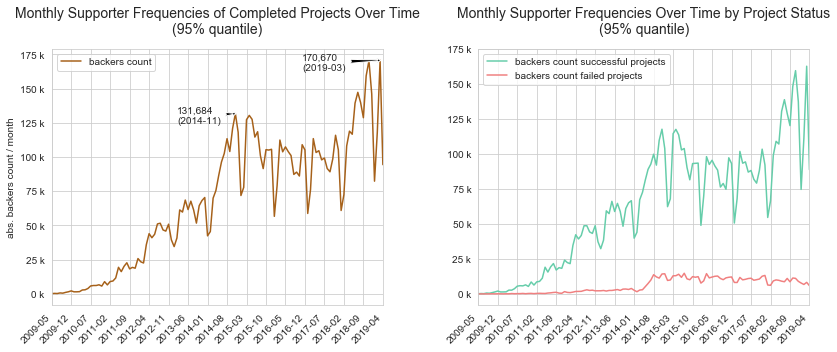

In [89]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly sum of backers counts of 95 quantile data frame
# total
backers_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].sum().values
# success
backers_grouped_sum_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['backers_count'].sum().values
# failed
backers_grouped_sum_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['backers_count'].sum().values
# insert 0 occurence for 2009-6
backers_grouped_sum_f = np.insert(backers_grouped_sum_f,1,0) 

# create dataframe
df_backers_sum = pd.DataFrame(data={'total':backers_grouped_sum, 
                                'success':backers_grouped_sum_s, 
                                'failed': backers_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of backers counts of all completed projects
plt.subplot(1,2,1)
ax = df_backers_sum.total.plot(color=backers_color, label='backers count');

# annotate peaks
# all time max
ymax_1  = max(backers_grouped_sum)
xmax_1 = str( df_backers_sum[df_backers_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)+ "\n(" + str(xmax_1)+")", xy=(119, ymax_1), 
            xytext=(90, ymax_1-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# first peak ever in 11/2014
ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['backers_count']\
                              .sum().sort_values().values[-8]
xmax_2 = str(df_backers_sum[df_backers_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)  + "\n(" + str(xmax_2) +")", xy=(67, ymax_2), 
            xytext=(45, ymax_2-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("abs. backers count / month")
plt.title("Monthly Supporter Frequencies of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of backers counts of successful anf failed projects
plt.subplot(1,2,2)
ax = df_backers_sum.success.plot(color=cust_green, label="backers count successful projects");
ax = df_backers_sum.failed.plot(color=cust_red, label="backers count failed projects");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)
plt.yticks(np.arange(0, 175000+1, 25000))
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Monthly Supporter Frequencies Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The course of monthly absolute backers counts over time reminds of the monthly aggregated sum of pledges. The number of supporters grew steady, then, exploded in 2014, peaking {{format_num(ymax_2)}} in {{xmax_2}}. One year earlier there were only 68,125 backers offering financial funding, meaning the number of backers doubled within a year. 

Late 2015 to 2017, backers counts relapsed, staying above 100,000 backers in peak times. Since 2018 the growth of backers counts has been recovering, counting record after record. Ultimately, in March 2019, the month before Kickstarter's anniversary, there was the highest number of financial supporters ever recorded: {{format_num(ymax_1)}}. 

Like project counts, goals and pledges, the number of active supporters is subject to heavy cyclic recessions. 

Visualizing backers counts of successful projects only (green line, right plot), primarily mirrors the total amount of active supporters from the plot on the left. And again, considering the low red line, supporters betting on the wrong horse seem to be a minority. According to these plots Kickstarter becoming mainstream continuosly attracted more project supporters or encouraged investors to pledge for multiple projects. This counts towards a plus of Kickstarter becoming more valuable to creators over the years.   

The increasing number of backers may be an explanation for stable investments over time. To proof this, we are going to depict the ratio of backers to creators. 

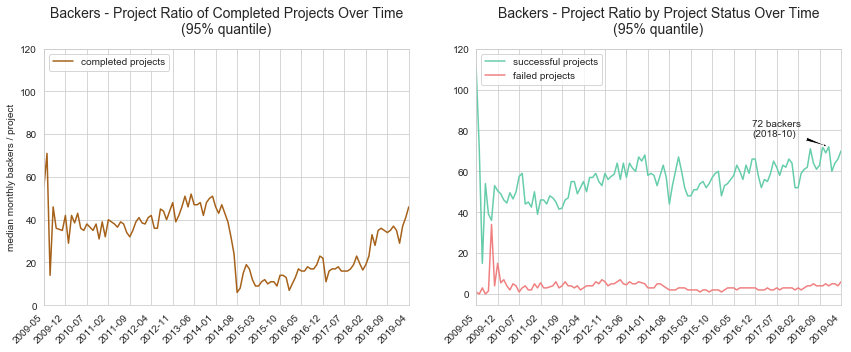

In [90]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median of backers counts of 95 quantile data frame
# total
backers_grouped_r = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].median().values
# success
backers_grouped_s_r = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['backers_count'].median().values
# failed
backers_grouped_f_r= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['backers_count'].median().values
# insert 0 occurence for 2009-6
backers_grouped_f_r = np.insert(backers_grouped_f_r,1,0) 

# create dataframe
df_backers_r = pd.DataFrame(data={'total':backers_grouped_r, 
                                'success':backers_grouped_s_r, 
                                'failed': backers_grouped_f_r, 
                                'date': dates})

# left plot: line plot of median backers by completed projects
plt.subplot(1,2,1)
ax = df_backers_r.total.plot(color=backers_color, label='completed projects');

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))

plt.ylabel("median monthly backers / project")
plt.title("Backers - Project Ratio of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of avg backers by successful or failed project
plt.subplot(1,2,2)
ax = df_backers_r.success.plot(color=cust_green, label="successful projects");
ax = df_backers_r.failed.plot(color=cust_red, label="failed projects");

# annotate recent maximum
ymax_1  = df_backers_r.success.sort_values().values[-3]
xmax_1 = str(df_backers_r[df_backers_r.success == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)+ " backers\n(" + str(xmax_1)+")", xy=(115, ymax_1), 
            xytext=(90, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))
plt.ylabel("")
plt.title("Backers - Project Ratio by Project Status Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend(loc=2)
plt.show()

The average number of backers per project over time explains the phenomenon of the overall stable success funding rates and the recent increase in pledges. Note that the average number of backers per successful project has been increasing over time (right plot, green line). In October 2018, there was a record of a median of 72 backers supporting each project. Therefore, we can conclude that the growth of active supporter counts recently compensated for increased competition among creators.

On the left, the sharp drop of backers of completed projects in August 2018 doesn't come with a surprise. Apparently, the number of campaigns grew faster than the audience of backers. Since then, the average number of supporters almost doubled and is now almost on the level as before the crash. 
At the same time, it is puzzling that this dent and the remarkable growth is hardly notable in successful campaigns. It seems like supporters have been making better decisions ignoring campaigns that would eventually fail. 

Compared to the crash of relative investments, the anomaly of a decreased backers/project ratio in August 2014 seems to be more discreet. Thus, we got to ask, how did the financial funding overhead in August 2014 came to be? One assumption is, that users were hesitant to invest and contributed with rather small pledges. To proof my hypothesis, I'm going to depict the relative amount each supporter pledged.

In [91]:
# add the average amount pledged per supporter to each campaign
for df in [ks_compl_95, ks_success_95, ks_fail_95]:
    df['pledged_rate'] = (df['pledged_hist_usd'] / df['backers_count']).fillna(0)

# assess the average amount pledged per user / project each month.
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_rate']\
                    .mean().sort_values()

deadline  deadline
2009      8          25.592927606219806
          5          27.631818181818183
2014      8          47.74795678696713 
2009      9          49.534867846568616
          6          54.81850706311233 
2015      3          55.39190910930031 
2010      8          55.41239695789137 
2015      2          56.01756409386433 
2014      9          56.59637341258144 
2016      1          57.980307086976765
          3          58.392237180462594
2019      2          58.457375666216386
2010      11         59.07579121996007 
2016      2          59.259079353753926
2019      3          59.366194127283116
2016      4          59.609748879756005
2018      2          59.63710257245408 
2016      5          59.68397383660999 
2019      1          60.03268684117145 
2014      10         60.237184677298906
2015      8          60.44029797643552 
          9          61.1374519407428  
2018      8          61.22095819388202 
2017      4          61.468703060017624
2009      12         

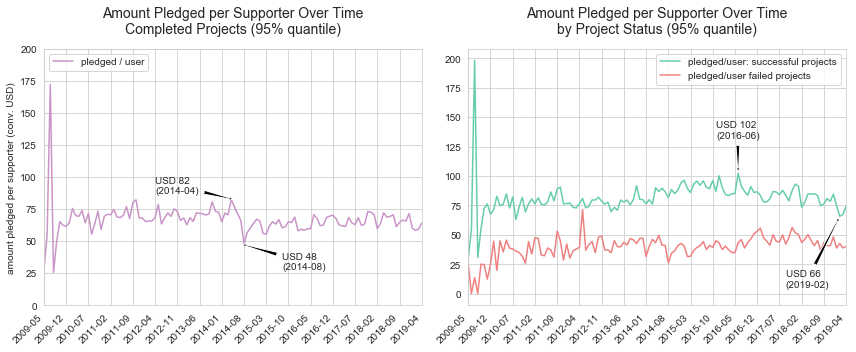

In [92]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledged rte of completed projects of 95 quantile data frame
# total
pledged_rate_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_rate'].mean().values
# success
pledged_rate_grouped_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['pledged_rate'].mean().values
# failed
pledged_rate_grouped_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['pledged_rate'].mean().values
# insert 0 occurence for 2009-6
pledged_rate_grouped_f = np.insert(pledged_rate_grouped_f,1,0) 

# create dataframe
df_pledged_rate = pd.DataFrame(data={'total': pledged_rate_grouped, 
                                'success': pledged_rate_grouped_s, 
                                'failed': pledged_rate_grouped_f, 
                                'date': dates})

# # left plot: line plot of monthly relative pledges for all completed projects
plt.subplot(1,2,1)
ax = df_pledged_rate.total.plot(color=pledged_color, label='pledged / user');

# annotate peaks
# peak in 4/2014
ymax_1  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_1 = str(df_pledged_rate[df_pledged_rate.total == ymax_1].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_1)  + "\n(" + str(xmax_1) +")", xy=(60, ymax_1), 
            xytext=(35, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                            ks_compl_95.deadline.dt.month])['pledged_rate']\
                            .mean().sort_values().values[2]
xmin = str(df_pledged_rate[df_pledged_rate.total == ymin].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin)  + "\n(" + str(xmin) +")", xy=(62, ymin), 
            xytext=(75, ymin-20),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)

# improve readability of y ticks
plt.yticks(np.arange(0, 201, 25))
plt.ylabel("amount pledged per supporter (conv. USD)")
plt.title("Amount Pledged per Supporter Over Time\nCompleted Projects (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of onthly relative pledges, divided into successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_rate.success.plot(color=cust_green, label="pledged/user: successful projects");
ax = df_pledged_rate.failed.plot(color=cust_red, label="pledged/user failed projects");

# annotate peaks
# peak in 6/2016
ymax_3  = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                              ks_success_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_3 = str(df_pledged_rate[df_pledged_rate.success == ymax_3].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_3)  + "\n(" + str(xmax_3) +")", xy=(85, ymax_3), 
            xytext=(78, ymax_3+30),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin_2 = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                              ks_success_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[5]
xmin_2 = str(df_pledged_rate[df_pledged_rate.success == ymin_2].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin_2)  + "\n(" + str(xmin_2) +")", xy=(117, ymin_2), 
            xytext=(100, ymin_2-60),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)
plt.ylabel("")
plt.yticks(np.arange(0, 201, 25))
plt.title("Amount Pledged per Supporter Over Time\nby Project Status (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The mean amount pledged by supporter was comparatively constant over the past 10 years. It roughly varied around a mean of USD {{format_num(df_pledged_rate.total.mean())}} per backer.

The relative investment spent on projects dropped from an all time high in April to an all time low in August 2014. The rate recovered in the following years but has been little lower compared to the initial years. 

For campaigns ending in success, creators were able to expect on average USD {{format_num(df_pledged_rate.success.mean())}} per supporter.

Turning our attention to the plot on the right reveals that the drop in relative pledges per project did not affect successful projects. On the contrary: users were willing to spent a little more in between 2015 - 2017 and a little less on failed projects. This may have contributed to balance the investment stability of successful projects during the recession years.

Since late 2018, we observe that the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding as in previous years. In 2018, successful projects had to expect on average USD {{format_num(ks_success_95[ks_success_95.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_success_95[ks_success_95.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to more competition. On the one hand, we can argue that due to an increased number of projects, supporters tend to diversify their investment across multiple projects or became more risk averse. On the other hand, creators themselves may have chosen lower amounts of fixed incentives to attract a greater number of supporters. Unfortunately, we lack the data to gain deeper understanding about this question.    

In general, supporters seem to be hesitant to invest in projects that will eventually fail. On average they invested a mean of only USD {{format_num(df_pledged_rate.failed.mean())}}. This may be an indication for supporters being able to determine the value, quality and chances of success of campaigns, in spite of a greater choice of projects on the platform. 

As we will see in my second research topic, Kickstarter as a platform has quite some power over success and failure rates of projects. As a main actor of making crowdfunding mainstream, Kickstarter should have the potential power and tools to drive competition and engagement. Presumably, one of Kickstarter's main objective is to successfully fund as many projects as possible. One of their main tools to support campaigns is by promoting projects on their landing page and on multiple social media channels and by awarding the "Projects We Love" badge. With increased competition, do creators nowadays have less of a chance to gain Kickstarter's support?

**Do creators nowadays have to fear less of a chance to be supported by Kickstarter?**  

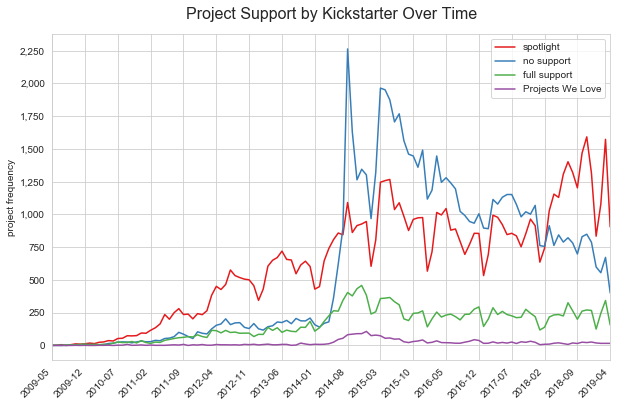

In [93]:
# Visualize how Kickstarter supported projects over time absolute values
fig, ax = plt.subplots(figsize=(10,6))

# create empty dataframe
df_featured = pd.DataFrame(data={'no support': [0.0]*120,
                                'Projects We Love': [0.0]*120, 
                                'spotlight': [0.0]*120, 
                                'full support': [0.0]*120, 
                                'date': dates})

# fill data frame with absolute project counts
for label, df in ks_compl.groupby([ks_compl.featured]):
    # calculate monthly abs. project counts
    counts = ks_compl[ks_compl.featured == label].groupby([ks_compl.deadline.dt.year, 
                                                           ks_compl.deadline.dt.month]).size()
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_featured[label] = counts

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(color=sns.set_palette(feat_color), label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

format_yticks(2250, 250)
plt.ylabel("project frequency")

plt.title("Project Support by Kickstarter Over Time", fontsize=16, pad=15);
plt.legend()
plt.show();

Investigating the absolute numbers of the support offered by Kickstarter reveals that campaigns only receiving the badge "Projects We Love" has been constantly low, almost irrelevant.

The same is true for projects being fully featured. Except for a modest rise in the hype year 2014, the absolute count of fully supported projects was relatively constantly ranging around 250 each month. Therefore, creators can assume a limited budget of projects being fully supported. 

More interesting is the course of projects being spotlighted or not backed by Kickstarter.
Non-featured projects, depicted by the blue line, were minor in comparison to spotlighted projects until mid 2014. While the number of spotlighted projects was smoothly increasing in May 2009 to early 2015, counts of non-supported projects exploded in August 2018 and reached a second peak March/April 2015. Since then, projects that have been denied any support have been smoothly declining and reached a surprisingly low number of only 401 in April, 2019.

In contrast, considering the entire 10 year period, spotlighted projects have been growing at a steady rate. There was a dent of stagnation during the recession years late 2015 to 2017. Apart from that, especially spotlighted projects have been subject to seasonal fluctuations.

Before concluding about Kickstarter's project support strategy, let's look at the relative numbers of project support. We are almost certain, the obvious peak in the hype year, the latest increase in supported projects and the seasonal fluctuations can be partly explained by the number of projects on the platform.

In [94]:
# calculate relative project support by dividing featured project counts by monthly project counts
for label in ks_compl.featured.value_counts().index:
    df_featured[label] = (df_featured[label] / df_project_counts['total'])*100

In [95]:
# assess featured proportions
df_featured

no support    Projects We Love          spotlight  \
0   50.0               0.0                 0.0                  
1   0.0                0.0                 50.0                 
2   14.285714285714285 0.0                 85.71428571428571    
3   16.666666666666664 0.0                 0.0                  
4   18.181818181818183 0.0                 54.54545454545454    
5   9.523809523809524  4.761904761904762   57.14285714285714    
6   21.73913043478261  0.0                 43.47826086956522    
7   10.714285714285714 3.571428571428571   46.42857142857143    
8   25.806451612903224 0.0                 58.06451612903226    
9   11.538461538461538 0.0                 53.84615384615385    
10  13.88888888888889  2.7777777777777777  66.66666666666666    
11  13.953488372093023 2.3255813953488373  62.7906976744186     
12  24.59016393442623  3.278688524590164   60.65573770491803    
13  24.637681159420293 0.0                 49.275362318840585   
14  23.58490566037736  1.8867924528301887  50.0                 
15  25.471698113207548 1.8867924528301887  51.886792452830186   
16  19.84732824427481  6.106870229007633   56.48854961832062    
17  16.129032258064516 0.8064516129032258  58.87096774193549    
18  21.951219512195124 1.6260162601626018  60.97560975609756    
19  19.526627218934912 2.366863905325444   56.213017751479285   
20  19.444444444444446 0.6944444444444444  64.58333333333334    
21  17.682926829268293 1.8292682926829267  70.73170731707317    
22  19.402985074626866 0.4975124378109453  67.16417910447761    
23  16.071428571428573 0.4464285714285714  73.21428571428571    
24  16.109422492401215 0.303951367781155   71.73252279635258    
25  18.360655737704917 0.9836065573770493  65.57377049180327    
26  17.866666666666667 1.3333333333333335  66.66666666666666    
27  22.573363431151243 0.6772009029345373  63.43115124153499    
28  21.93877551020408  2.0408163265306123  60.204081632653065   
29  18.181818181818183 0.0                 63.903743315508024   
30  16.257668711656443 1.5337423312883436  62.26993865030674    
31  24.129930394431554 0.6960556844547563  56.380510440835266   
32  23.076923076923077 1.7369727047146404  58.31265508684863    
33  21.153846153846153 0.4807692307692308  63.70192307692307    
34  20.12779552715655  0.3194888178913738  61.18210862619809    
35  21.241379310344826 0.9655172413793104  62.206896551724135   
36  23.699421965317917 0.7225433526011561  61.70520231213873    
37  25.728770595690747 0.6337135614702154  59.062103929024076   
38  18.973747016706444 0.47732696897374705 68.73508353221956    
39  21.182266009852217 0.6157635467980296  65.64039408866995    
40  22.081218274111674 0.3807106598984772  65.73604060913706    
41  18.498659517426276 1.0723860589812333  67.828418230563      
42  17.671232876712327 0.821917808219178   68.63013698630137    
43  23.857142857142858 1.2857142857142856  65.14285714285715    
44  22.678571428571427 0.7142857142857143  61.42857142857143    
45  18.338557993730408 1.09717868338558    67.39811912225704    
46  15.959821428571427 1.1160714285714286  67.52232142857143    
47  16.304347826086957 0.5434782608695652  70.65217391304348    
48  18.08080808080808  0.5050505050505051  67.77777777777779    
49  17.44765702891326  0.7976071784646062  71.78464606181456    
50  19.63001027749229  0.8221993833504625  67.52312435765673    
51  17.90722761596548  0.10787486515641855 70.3344120819849     
52  23.925667828106853 0.34843205574912894 63.530778164924506   
53  19.603753910323256 1.8769551616266946  64.02502606882169    
54  19.101123595505616 1.1235955056179776  65.67926455566905    
55  20.85828343313373  0.5988023952095809  60.17964071856288    
56  22.379603399433428 1.2747875354107647  60.90651558073654    
57  19.12568306010929  1.092896174863388   61.338797814207645   
58  16.765873015873016 0.8928571428571428  64.0873015873016     
59  15.530629853321829 1.1216566005176878  63.8481449525453     
60  24.84599589322382  1.7111567419575633  55.3

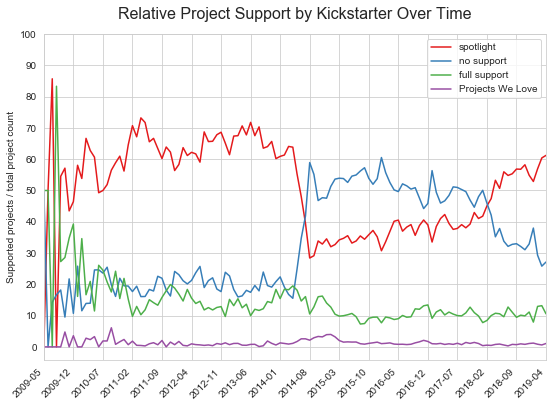

In [96]:
# Visualize how Kickstarter supported projects over time relative values
# settings
plt.figure(figsize=[9,6])

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(color=sns.set_palette(feat_color),label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

plt.yticks(np.arange(0, 101, 10))
plt.ylabel("Supported projects / total project count");

plt.title("Relative Project Support by Kickstarter Over Time", fontsize=16, pad=15);
plt.legend()
plt.show();

In [97]:
format_num(max(df_project_counts.failed)*100 / df_project_counts[df_project_counts.failed == max(df_project_counts.failed)]['total'].values[0])

'61'

Investigation of relative values of project support, shows a different picture. While campaigns being awarded the "Projects We Love" badge has been remaining constantly at an insignificant level, fully backed projects have been fluctuating roughly around 10% of all projects since mid 2015.

The proportions of spotlighted and non-supported campaigns has been changing significantly. The proportion turned around in the hype year 2014. With the rise of competing projects, the number of not supported project rose from 20% to roughly 55%. At the same time, the proportion of projects being featured on the landing page fell dramatically. From plus 60%, the proportion dropped to below 30% in August 2014. This certainly wasn't the easiest time to succeed with your crowdfunding campaign due to the high competition.

However, the chances of support became more promising. The proportion of spotlighted campaigns have been gradually growing, while projects receiving no backing by Kickstarter have been decreasing, until, in early 2018 the proportion rolled back. Today, more than 60% of all crowdfundings are spotlighted and only around 27% of campaigns do not gain any support by Kickstarter. As we will see further down, the chances to success are much higher once Kickstarter selected a campaign to be featured.  

This development is surprising. We know that recently creators have been more actively looking for funding on Kickstarter. The competition for creators has risen, yet the chances of support have not been as promising since 2014. Obviously, Kickstarter must have adapted their strategy or website tools to actively spotlight a higher amount of projects. This may be one of the main drivers of recently more campaigns being successful.  

### Summary:  Is it still worth the effort to finance your project on Kickstarter since crowdfunding has become mainstream?

Kickstarter became mainstream in the year 2014. The number of campaigns literally exploded. With the increase in project counts, we found an abnormal high percentage of projects failing in August 2014 , when {{format_num(max(df_project_counts.failed)*100 / df_project_counts[df_project_counts.failed == max(df_project_counts.failed)]['total'].values[0])}} % flopped. During the years of settlement between 2015 - 2017 project counts were in recession, but remained at a high level. In those times the likelihood to fail minimally exceeded success rates {{format_num(ks_compl_failed[ks_compl_failed.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count()) }}:{{format_num(ks_compl_success[ks_compl_success.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count())}}%.

Nevertheless, the overall percentage of successful campaigns has been relatively stable, in 2014 and today. Higher competition on Kickstarter primarily affected those campaigns that were deemed to fail anyways. 

By the beginning of 2018, Kickstarter turned success and failure rates upside down. Ever since, campaigns ending in success have become more likely, while flops have been declining notably. In 2018, 63% of completed campaigns ended in success. Actually, the highest monthly count of successful campaigns ever recorded was only recently, in March 2019. Chances to win were {{format_num(max(df_project_counts.success)*100 / df_project_counts[df_project_counts.success == max(df_project_counts.success)]['total'].values[0])}}%.

The current trend of higher funding seems as promising. We would expect the recent increase in competing projects, lower funding goals and the  tendency to pledge greedier investments to negatively impact campaigns. Yet, the overall financial backing per project has been relatively constant since 2014. On average creators were able to raise a median of USD {{format_num(ks_compl_success['pledged_hist_usd'].median())}} if the campaign ended in success. Fortunately, in 2018, creators were able to expect a median of USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].median())}}.

We found the backer-project ratio to be the most obvious explanation to balance higher competition. Clearly, in 2014, there was a huge overhead between investment supply and demand caused by a lack of potential supporters. This gap has been progressively closing. In the light of this, crowdfunding to become mainstream and maturing benefited business founders.

The tendency of individuals to pledge higher during the recession years 2015-2017 for successful campaigns may have contributed to keep the financial potential of crowdfunding stable. However, since late 2018, the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding as in previous years. In 2018, successful projects had to expect on average USD {{format_num(ks_success_95[ks_success_95.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_success_95[ks_success_95.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to competition and popularity. On the one hand, we can argue that due to an increased number of projects, supporters are able to diversify their investment across multiple projects or they became more risk averse. On the other hand, creators themselves may have chosen lower amounts of fixed incentives to attract a greater number of supporters. Unfortunately, we lack the data to gain deeper understanding about this question.    

In general, supporters seem to be more and more hesitant to invest in projects that eventually fail. In spite of a greater choice of projects available, supporters seem to take more univocal decisions. Their ability to filter to determine the value, quality and chances of success of campaigns may have improved. One possibility to support this is Kickstarter's increasing role in the promotion of campaigns.

The proportions of spotlighted and non-supported campaigns has been changing over time significantly.  With the rise of competing projects in the hype year 2014, the rate of projects without promotion increased dramatically from 20% to roughly 55%. Only 30% were featured in August 2014. This certainly wasn't the easiest time to succeed with a crowdfunding campaign due to the high competition.

Since the hype year, the proportion of spotlighted campaigns has been gradually growing while the number of projects receiving no promotion have been decreasing. Ultimately, since early 2018 projects being featured overturned the project counts receiving no support. Today, more than 60% of all crowdfundings are spotlighted on Kickstarter's channels and only around 27% of campaigns do not gain any support. As we will see further down, the chances to success are much higher once Kickstarter selected a campaign to be featured. 

In the light of this, Kickstarter must have adapted their strategy or website tools to actively filter and promote projects. This may be one of the main drivers of recently more campaigns being successful in spite of increasing competition.  

Although creators tend to set their goals lower today than in previous years, it doesn't seem to affect the actual funding raised. The amount pledged was surprisingly stable for successful projects over time. 
On average, creators have been able to raise more than they had asked for once the campaign was successful. In spite of declining goals, the surplus of pledges has been widening since 2017. In the year 2014 USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected successfully. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. I suspect the advantage of lower funding goals to be connected with Kickstarter's all-or-nothing approach. Creator's setting lower goals can reach their funding earlier and eventually benefit from success affirmation effects. They may also be perceived as less greedy. 

The overall positive mainstream effects did not contribute to a closer race between successful and failed campaigns. The collected pledges and number of backers of failed campaigns underperformed significantly. On the contrary, the gap of investment between each status has been widening. 

In conclusion, I cannot attribute Kickstarter becoming mainstream with severe disadvantages for business starters. Clearly, creators have to compete with a higher number of other campaigns. At the same time, there are more backers and therefore more potential investment capacity available. The proportion of projects being funded successfully has been increasing lately, and so has the median amount pledged per project. One main driver is likely the chance to be promoted on the Kickstarter.'s landingpage. On the downside, creators may expect a little lower investments per capita. 

It seems like the characteristics of what makes a campaign likely to succeed have become clearer. I suppose due to crowdfunding becoming mainstream, project creators, the backers audience and the Kickstarter platform itself mostly benefited from growth and learning effects. Today, stakeholders may have a better mutual understanding about what type of projects are particularly suited for crowdfunding. Additionally, they may have better insights about a campaign's features to eventually make a trusted decision. We are going to look at possible characteristics connected to success in our second research question.


## What determines the success of a crowdfunding campaign on Kickstarter?<a name="success"></a>

Based on our data set, we are going to investigate what specific project features are correlated with a higher chance of success. To start from, I'm going to look into the type of a project by analyzing project categories.

### Categories 
**Were there any changes in the popularity of the type of projects?**  

As we know, over the past 10 years of Kickstarter's existence, crowdfunding has only been developing as a mainstream funding opportunity. Insofar, we found that user behavior and project characteristics developed over time. Since our goal is to identify possible success predictors that are valid today, I will first aim at gaining a general understanding about possible trends in the popularity of project categories. 

There are two types of categories, I'm going to investigate the main project _category_ and the subcategory values of a project found it the column _comb cat_.   

To start with, I'm going to plot the relative project counts of a each parent category by year. As there are 15 categories, showing all of them on one time line would make  interpretation difficult. Hence,  I will facet categories into 3 categories per plot.   

In [98]:
# utility function to generate dataframe suitable for a timeline
def create_timeline_df(df, feature):
    # initialize list of lists of categories with each 120 values
    columns = df[feature].value_counts().index
    data = [[0]*len(df[feature].value_counts())]*120

    # create empty DataFrame 
    df_counts = pd.DataFrame(data, columns = columns) 

    for cat in df[feature].value_counts().index:
            # extract observations by category and group by year
            df_cat = df[df[feature] == cat]
            # calculate monthly abs. project counts
            counts = df_cat.groupby([df_cat.deadline.dt.year, 
                                    df_cat.deadline.dt.month])\
                                    .count()['project_id']
            # manually create multi levels 
            levels = [range(2009,2020), range(1,13)]
            new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
            # re-index counts and fill empty values with zero
            counts = counts.reindex(new_index, fill_value=0).values
            # remove months Jan-April 2014 and, May-Dec 2019 
            counts = counts[4:-8]
            counts = counts*100 / ks_monthly_counts['count_monthly']
            # add to dataframe d
            df_counts[cat] = counts
            
    return df_counts
        
# assess latest development
df_cat_counts = create_timeline_df(ks_compl,  "category")
df_cat_counts.tail()

Music       Film & Video                Art  \
115 9.974958263772955 9.641068447412353  8.430717863105174    
116 7.609384908053266 11.477488902980342 10.589727330374128   
117 8.50052798310454  8.870116156282998  13.621964097148892   
118 8.640552995391705 10.176651305683563 11.559139784946236   
119 9.742895805142084 8.592692828146143  10.960757780784844   

            Technology        Publishing               Food  \
115 11.47746243739566  8.30550918196995  6.135225375626043    
116 12.111604311984781 7.989854153455929 6.721623335447052    
117 9.45089757127772   7.761351636747624 5.01583949313622     
118 7.334869431643625  9.56221198156682  5.299539170506913    
119 8.863328822733424  7.645466847090663 5.7510148849797025   

                 Games            Fashion            Comics            Design  \
115 13.731218697829716 10.267111853088482 4.507512520868113 10.10016694490818   
116 11.92136968928345  10.970196575776791 4.058338617628408 8.49714648065948    
117 15.205913410770854 9.66209081309398   5.860612460401267 7.708553326293559   
118 16.474654377880185 9.831029185867896  6.835637480798771 7.526881720430108   
119 15.832205683355886 9.810554803788904  6.833558863328823 8.186738836265222   

           Photography             Crafts            Theater  \
115 1.9198664440734559 2.1702838063439067 1.5442404006677797   
116 2.4730500951173116 2.2194039315155356 1.2048192771084338   
117 1.689545934530095  2.903907074973601  1.7423442449841604   
118 1.9969278033794162 1.8433179723502304 1.6129032258064515   
119 2.232746955345061  2.300405953991881  1.6914749661705006   

            Journalism               Dance  
115 1.0851419031719534 0.7095158597662772   
116 1.585288522511097  0.570703868103995    
117 1.583949313621964  0.42238648363252373  
118 0.9216589861751152 0.38402457757296465  
119 1.1502029769959405 0.4059539918809202

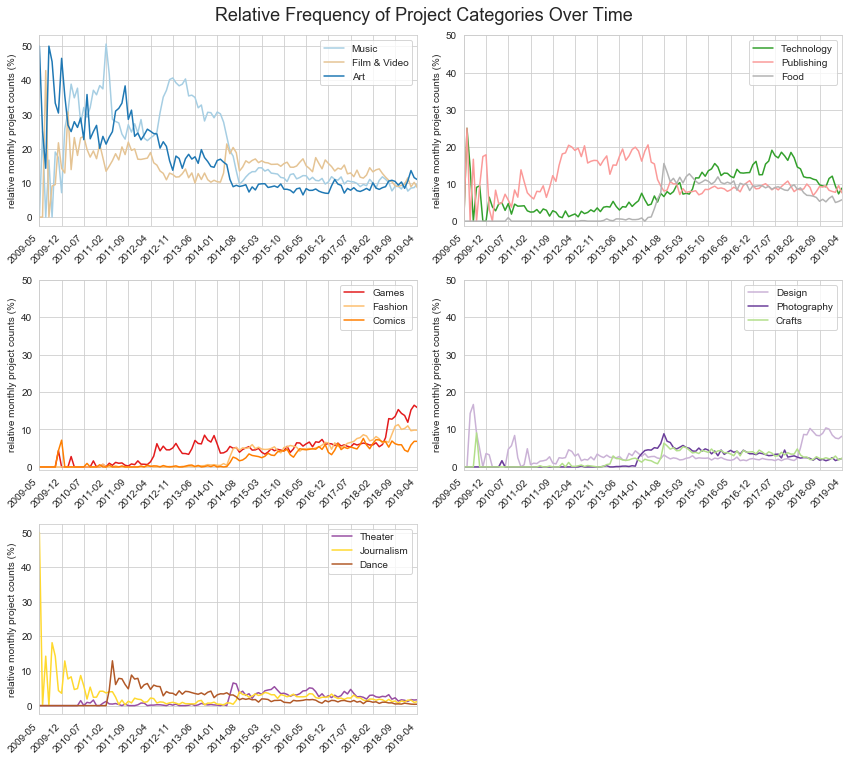

In [99]:
# settings
fig = plt.figure(figsize=[12,10])
j = 0
g_count = 0

# create 5 suplots, plotting 3 categroies each
for i in range(1,6):
    plt.subplot(3, 2, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        # plot
        df_cat_counts[cat].plot(color=category_colors[g_count], label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        timeline_ticks(df_cat_counts)
        plt.yticks(np.arange(0, 50+1, 10))
        plt.xlabel("")
        plt.ylabel("relative monthly project counts (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative Frequency of Project Categories Over Time", fontsize=18, y=1.02)
plt.show()

The relative popularity of project categories changed over time. Music, Film and Art were dominating in the early years. As of today, those are still popular categories, but have lost momentum. Publishing was also quite popular in the beginning years, but has lost popularity since August 2014.

Technology ventures got the biggest boost in popularity, but its relative project numbers have been declining since 2017. 

Since 2018 there have been the most remarkable changes happening. Games, Fashion and Design suddenly gained popularity. Games count for 16% of projects nowadays. Most other categories seem to have settled below 10%. 

**Does a project category impact chances of success?**  

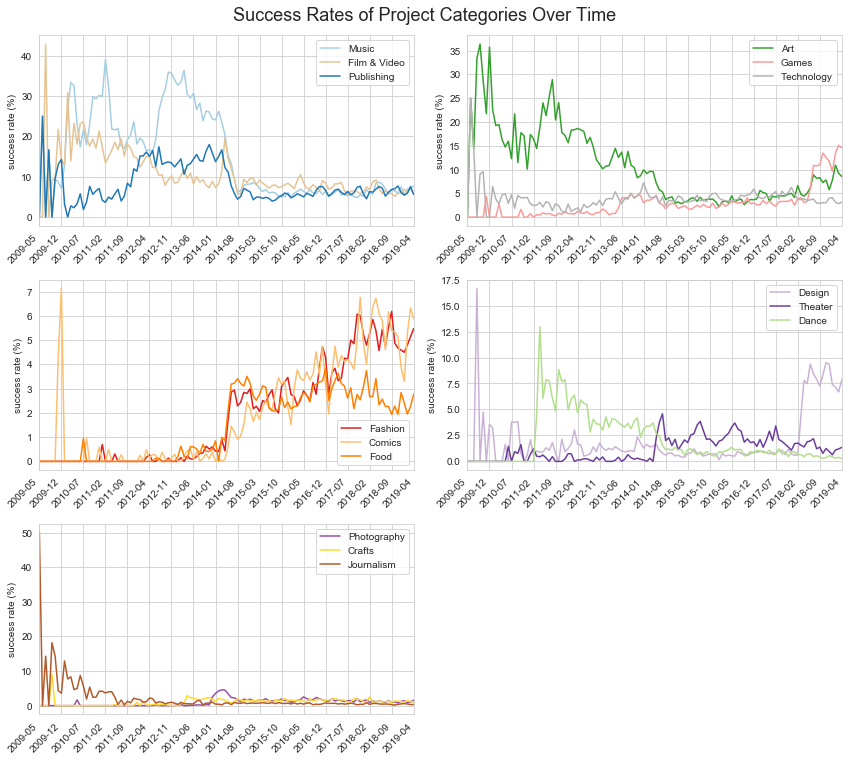

In [100]:
# calculate success rates 
df_cat_s = create_timeline_df(ks_compl_success,  "category")

# settings
fig = plt.figure(figsize=[12,10])
j = 0
g_count = 0

# create 5 suplots, plotting 3 categroies each
for i in range(1,6):
    plt.subplot(3, 2, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl_success.category.value_counts()[j:j+3].index:
        # plot
        df_cat_s[cat].plot(color=category_colors[g_count], label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        timeline_ticks(df_cat_s)
        plt.xlabel("")
        plt.ylabel("success rate (%)")
        plt.legend()
    j+=3

plt.suptitle("Success Rates of Project Categories Over Time", fontsize=18, y=1.02)
plt.show()

The popularity of projects changed over time. So have the chances of success. Music, film & video, publishing, art and dance became less likely to succeed. On the other hand, success rates of games, fashion, comics, food and design have been increasing since 2018. Interestingly, the most obvious changes appeared by the beginning of 2018. 

As we don't want to distort our success predictors with old-fashioned data, we are going to focus on the most recent years from 2018 and 2019.

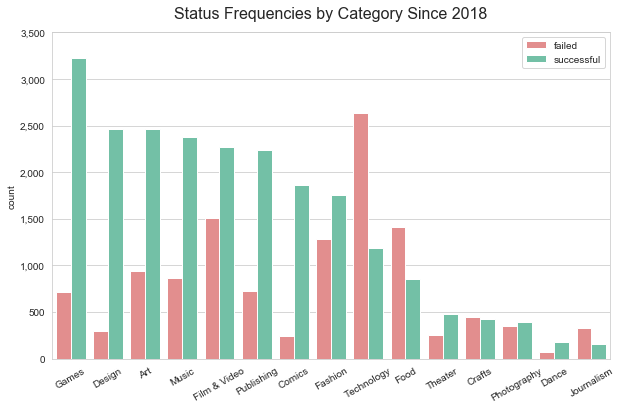

In [101]:
#settings
plt.figure(figsize=[10,6])

# filter projects younger than 2017
ks_compl_18 = ks_compl[ks_compl.deadline.dt.year > 2017]

# order by success
order = ks_compl_18[ks_compl_18.status == 'successful'].category.value_counts().index

# plot clustered bar chart - qualitative variables counts
ax = sns.countplot(data = ks_compl_18, x = 'category', hue = 'status', 
                   color =  sns.set_palette([cust_red, cust_green]), 
                   order=order)

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# ticks and labels
plt.title("Status Frequencies by Category Since 2018", fontsize=16, pad=14);
plt.legend(("failed", "successful"))
format_yticks(3500, 500)
plt.xticks(rotation=30)
plt.xlabel("")
plt.show()

In absolute counts games, design and art stand out to be extraordinary successful categories. Technology projects have the highest unsuccessful absolute occurrences of all categories. Photography, dance and journalism performed poorly. 

As we visualized absolute values above, we may misinterpret the actual success rates. In the plot below, we calculate relative frequencies for each category.

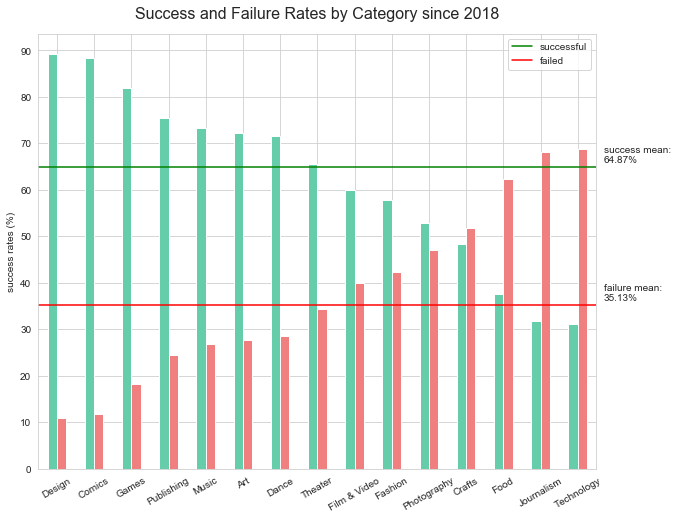

In [102]:
# ordering
pop_cats = ks_compl_18.category.value_counts().index
cat_counts = ks_compl_18.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl_18[ks_compl_18.category == category]
    return (len(cat_df[cat_df.status == status]) / len(cat_df)) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'success': cat_success, 'failed': cat_failed}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
df.plot.bar(rot=30, figsize=(10,8), color = sns.set_palette(['#66cdaa', '#f08080']));

# plot means
p_18_success = len(ks_compl_18[ks_compl_18.status == 'successful']) / len(ks_compl_18) *100
p_18_failed = 100 - p_18_success
plt.axhline(p_18_success, color='g')
plt.axhline(p_18_failed, color='r')

# annotate
plt.title("Success and Failure Rates by Category since 2018", fontsize=16, pad=15);
plt.text(14.7, p_18_success+1, "success mean:\n" + str(round(p_18_success, 2)) + "%" )
plt.text(14.7, p_18_failed+1, "failure mean:\n" + str(round(p_18_failed, 2)) + "%")
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("success rates (%)")
plt.xlabel("")
plt.legend(("successful", "failed"))
plt.show()

The above success and failure rates proove a strong relationship between project type an the likelihood to succeed. Since 2018, design, comics and games have been performing extraordinary, showing success rates of plus 80%. 

Crafts, food, journalism and lastly technology, however, were rather likely to fail. A creator's chance of success was under 50% in those categories. Because of the high project counts, this result is especially tragic for tech-related campaigns. In total, 2,632 creators failed their tech projects since 2018.

**Combined categories**  

Plot absolute frequencies of combined category to understand the relevance of subcategories in the recent months. 

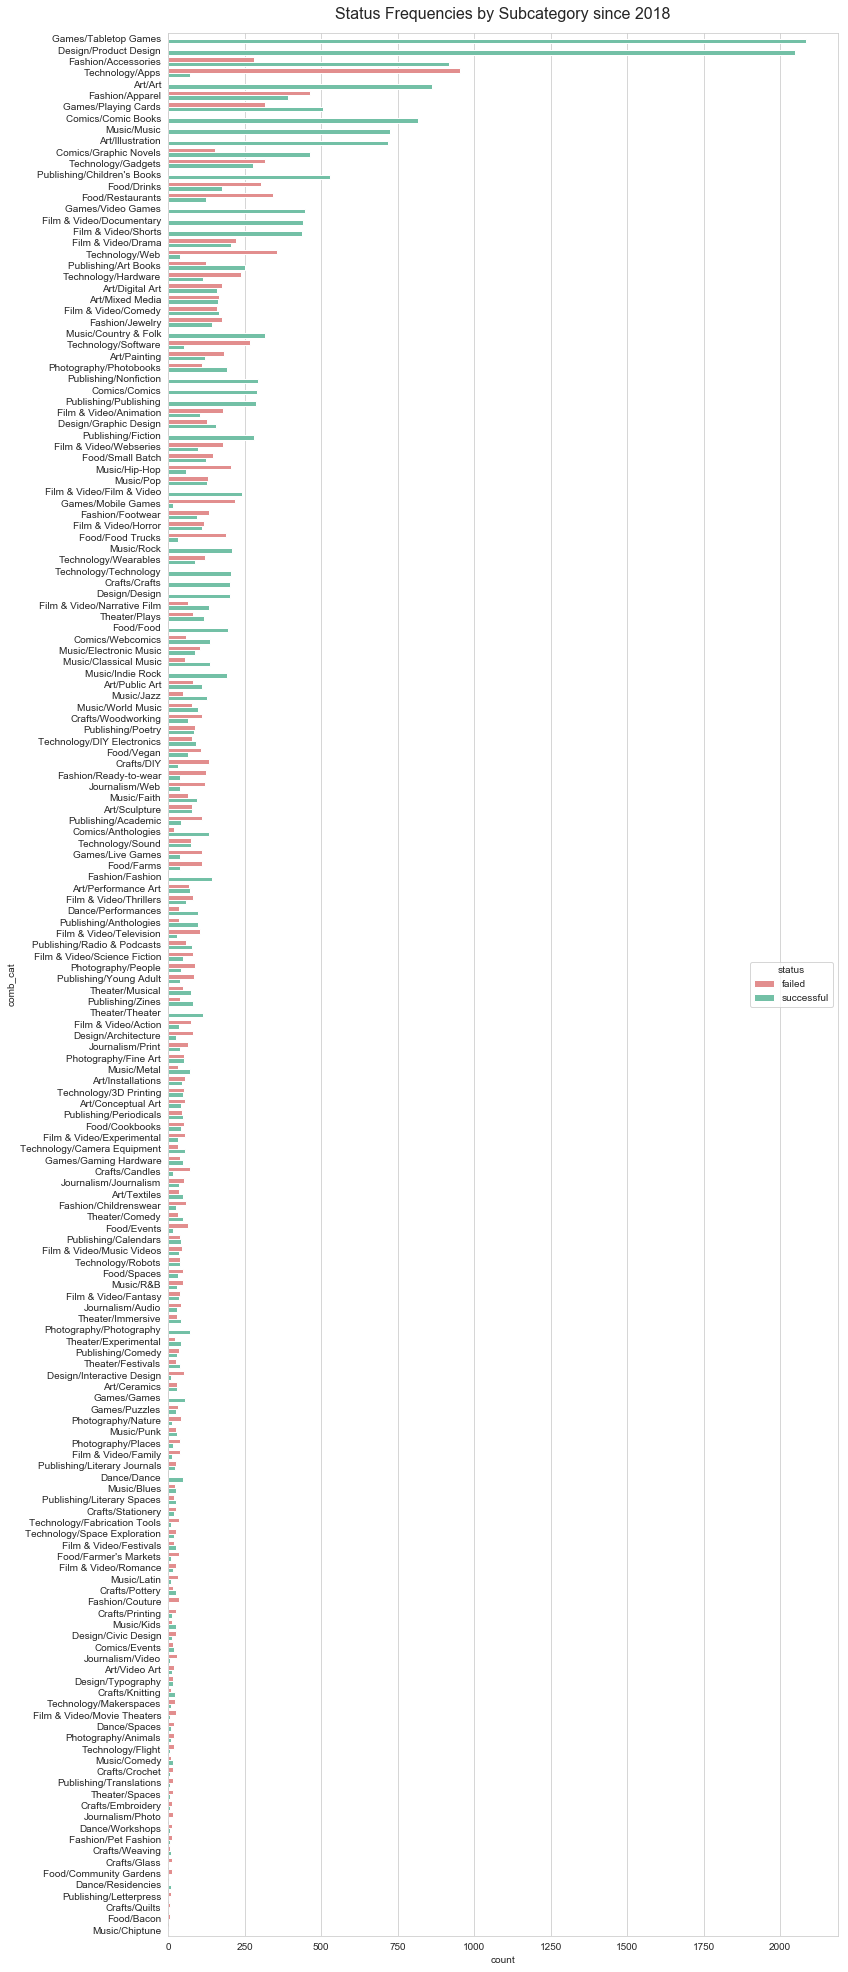

In [103]:
# settings
plt.figure(figsize=[12,35])

# plot clustered bar chart - qualitative variables counts
ax = sns.countplot(data = ks_compl_18, y = 'comb_cat',  hue='status', 
                   color = sns.set_palette([cust_red, cust_green]), 
                   order=ks_compl_18.comb_cat.value_counts().index)

# ticks and labels
plt.title("Status Frequencies by Subcategory since 2018", fontsize=16, pad=14);
ax.legend(loc=5, title = 'status')
plt.show()

Plot success rates of subcategories. Start by creating a dataframe with relative success rates by subcategory.

In [104]:
# generate data frame  
comb_cats = ks_compl_18.comb_cat.value_counts().index
cat_counts = ks_compl_18.comb_cat.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl_18[ks_compl_18.comb_cat == category]
    if len(cat_df):
        return (len(cat_df[cat_df.status == status]) / len(cat_df)) * 100
    return 0

comb_cat_success = [calc_rate(cat,"successful") for cat in comb_cats]
comb_cat_failed = [calc_rate(cat,"failed") for cat in comb_cats]

# create a new dataframe based success and failure rates
df_comb_cat_r = pd.DataFrame({'comb_cat': comb_cats, 'success': comb_cat_success, 'failed': comb_cat_failed})
# order by success rates
df_comb_cat_r.sort_values(by='success', ascending=False, inplace=True)
df_comb_cat_r.reset_index(inplace=True, drop=True)
df_comb_cat_r.head()

comb_cat  success  failed
0  Games/Tabletop Games  100.0    0.0    
1  Film & Video/Shorts   100.0    0.0    
2  Technology/Technology 100.0    0.0    
3  Crafts/Crafts         100.0    0.0    
4  Design/Design         100.0    0.0

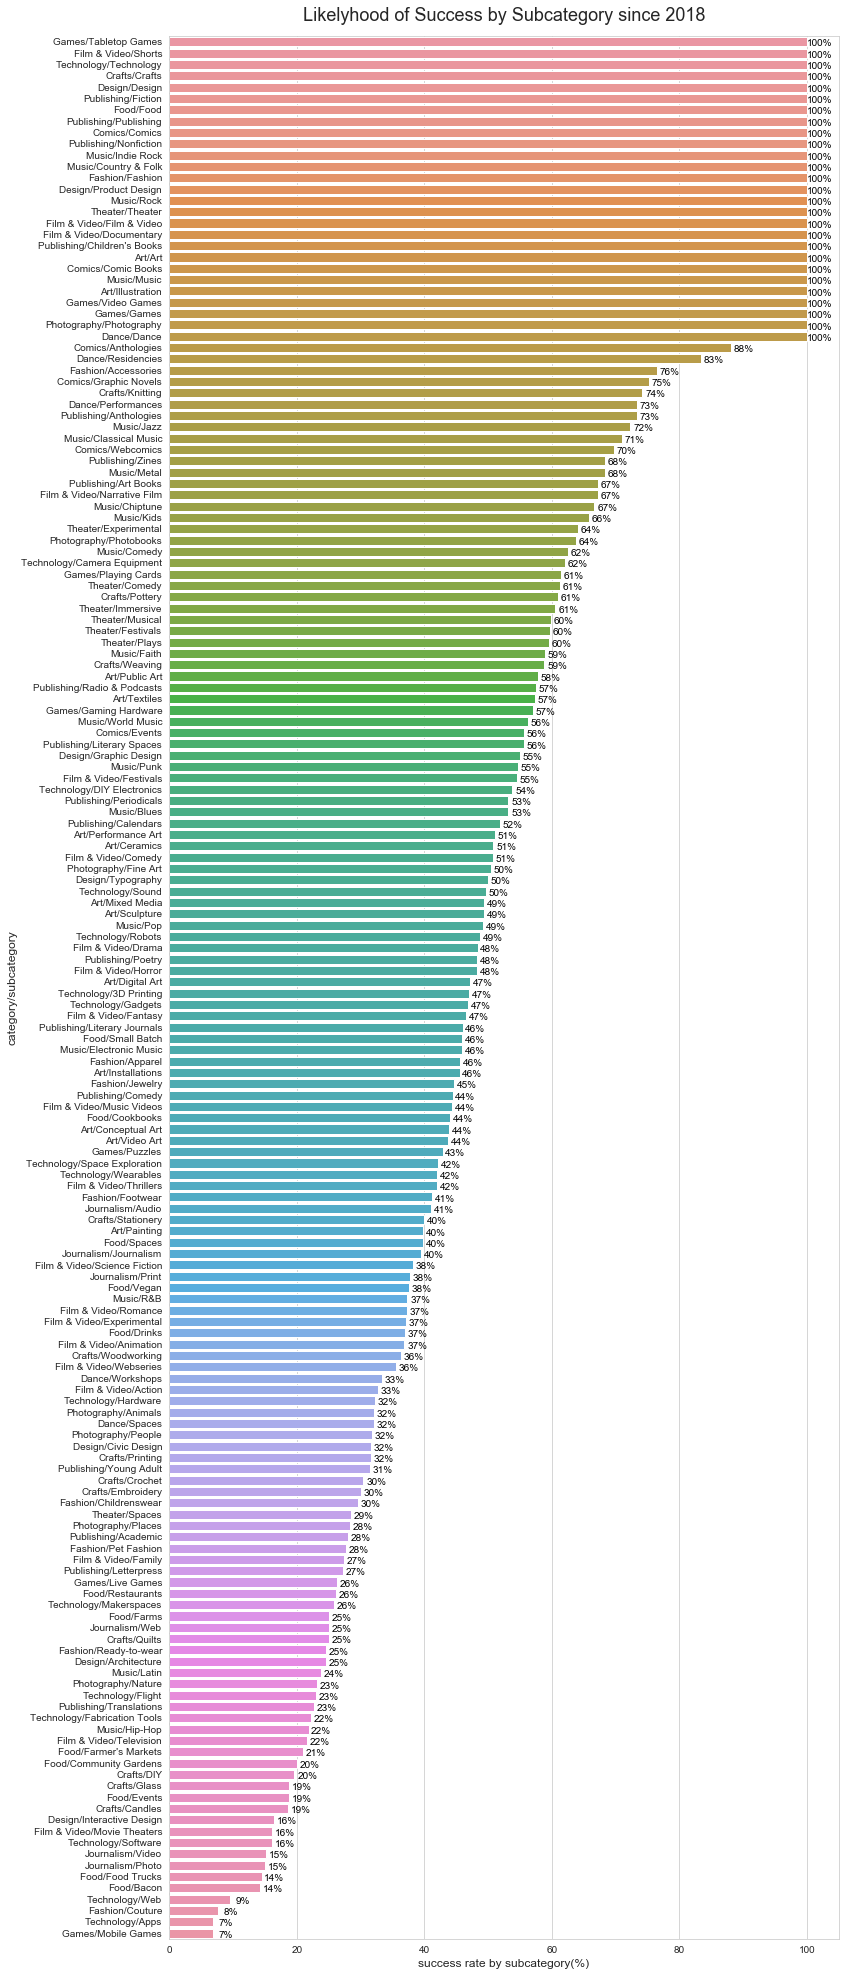

In [105]:
# create horizontal bar chart of probability to be supported leading to success 
plt.figure(figsize=[12,35])

# utility for annotations
def annotate_success(df, outcome, x_offset=0, y_offset=0):
    locs, labels = plt.yticks() 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = df[df['comb_cat'] == label][outcome].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        plt.text(cat_p+x_offset, loc+y_offset, cat_p_label, ha='center', color="black")

# plot
ax = sns.barplot(data=df_comb_cat_r, x='success', y='comb_cat', order=df_comb_cat_r.comb_cat.values);

# annotate rel. success
annotate_success(df_comb_cat_r, 'success', 2, 0.4)

# labels and titles
plt.title("Likelyhood of Success by Subcategory since 2018", fontsize=18, pad=15);
plt.xlabel("success rate by subcategory(%)", fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.show()

There were quite some subcategories that had an incredible 100% chance of success. Among others, there were tabletop games, dance, country & folk music, comics and product design projects. 

Notice the accumulation at the top of high-ranking projects without subcategories, like Dance/Dance, Photography/Photography or Comics/Comics. We found that 12 out of 15 of our parent categories without chosen subcategory had a 100% chance to succeed. This behavior seems a bit odd to me. I wonder if this is related to search algorithms used by the platform or search behavior by users. This may be a topic to elaborate on, but we're missing the relevant data.

Overall, we see indications that the type of project is likely correlated with success. The subcategory should be chosen carefully by checking success rates of subcategories closer before running a campaign. For example, tabletop games and video games had a 100% chance to succeed, but mobile games failed at a rate of 93%. And, while Hip-Hop music only had a 22% success rate, rock music campaigns always ended successfully in the past years. 

As we depicted relative numbers here, we may overestimate or underestimate the significance of the probability of success. Also, because of the high number of subcategories, the above plots are difficult to read and interpret. Thus, I'm going to plot a best-off version only depicting the most popular subcategories.

In [106]:
# I'm considering the upper quarter of project counts the most popular categories. 
# According to the 75 quantile, popular subcategories have more 228 projects recorded since 2018
cat_counts.describe()

count   168.0             
mean    204.74404761904762
std     287.328558558246  
min     6.0               
25%     50.75             
50%     123.0             
75%     229.25            
max     2,084.0           
Name: comb_cat, dtype: float64

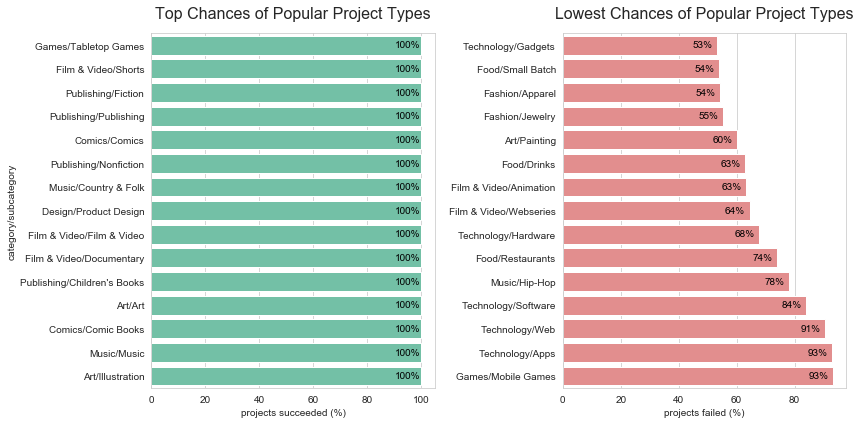

In [107]:
# plot highlights
plt.figure(figsize=[12,6])

# filter top 25% of the most popular comb categories and sort by relevance
pop_cats = cat_counts.where(cat_counts > cat_counts.quantile(q=0.75)).dropna().index

# filter subcategorical counts by popular subcategories
df_comb_cat_pop = df_comb_cat_r[df_comb_cat_r.comb_cat.isin(pop_cats)]
df_comb_cat_pop.reset_index(drop=True, inplace=True)

# left plot: top 15 of poular combined categories
plt.subplot(1, 2, 1)
ax = sns.barplot(data=df_comb_cat_pop[:15], x='success', y='comb_cat', color=cust_green);

# ticks and labels
plt.title("Top Chances of Popular Project Types", fontsize=16, pad=15);
plt.xlabel("projects succeeded (%)")
plt.ylabel("category/subcategory")
annotate_success(df_comb_cat_pop, 'success', -5, 0.1)

# right plot: 15 lowest chances of popular combined categories
plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_comb_cat_pop[-15:], x='failed', y='comb_cat', color=cust_red);

# ticks and labels
plt.title("Lowest Chances of Popular Project Types", fontsize=16, pad=15);
plt.xlabel("projects failed (%)")
plt.ylabel("")
annotate_success(df_comb_cat_pop, 'failed', -5, 0.1)

plt.tight_layout()
plt.show()

## Summary Categories
The type of project matters! Creative projects and categories attributed with lower commercial potential seem to work better on Kickstarter. Also, the top chances of popular project categories show a tendency to not have subcategories. Publishing, comics, film & video, art and music performed generally well if they were not communicated like niche topics.

Written work and comics dominate the top categories. Fictional & nonfictional publishing projects, children's books and comic books all ended in success. We can't tell if publishing here actually referred to printed and/or online works.

We found tabletop games at the top of the most successful projects. Simultaneously, mobile games have been at the lowest end with a failure rate of 93%. This seems contradicting at first, but makes sense considering that tech or digital projects generally performed low. Notice that gadgets, hard- and software, web projects and apps all had very low chances of success, although being among the most popular categories. 

In addition to technology ventures, we found 3 food subcategories among the ventures with the lowest chances: small batch, drinks and restaurants.

The success of the remaining categories is a little less clear. Product design and illustrations worked in 100% of all cases, yet paintings were likely to fail. Generally, campaigns labeled as _Design_ worked better than labeled as _Art_.

The taste in music seems to matter. While crowdfunding worked well for country & folk music, hip-hop campaigns failed at a rate of 78%. Film & video projects appear on both sites of success chances. Short films and documentaries were a guarantee for success, while animations and web series were more likely to fail. 

Overall, I see indications that the type of project is likely correlated with success. The category and subcategory should be chosen carefully by observing popularity, success rates and current trends of subcategories before running a campaign.

### Funding

Closest related to a campaign's funding are three variables: the goals set by a project creator, ultimate final amount pledged and the number of supporter. I'll start by investigating how a goal may influence success, then I'll look into pledges and how much each backer contributed.

**Does a campaign's funding goal affect its likelihood to succeed?**

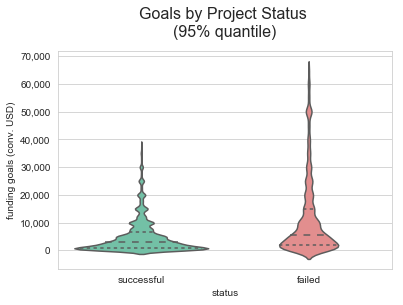

In [108]:
# violin plots of 95 quantile data frame 
ax = sns.violinplot(data = ks_compl_95, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], 
                    color=sns.set_palette([cust_green, cust_red]), 
                    inner='quartile')
#annotate
plt.title("Goals by Project Status \n(95% quantile)", fontsize=16, pad=15 )
ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('funding goals (conv. USD)')

plt.show()

The above violin plots of our 95% quantile data suggests that successful campaigns tend to lower funding goals compared to failed projects. Notice the comparatively wide section down at the bottom of successful campaigns. It indicates that the lower the funding goal, the higher is the probability of success. Although failed projects also cluster at low funding goals and the median is only slightly above successful campaigns, the tail and the upper quartile range are much higher. While successful funding goals kept under USD 40,000, failed goals occurred up to USD 70,000.  

One more interesting observation: the multi-modality of successful goals seems to be more pronounced compared to failed goals. We've already discovered that goals are more frequently set at full numbers like 5, 10, 15 or 20 tsd. However, the plot above suggests, that supporters may also have a slight tendency to rather invest in fully numbered goals.

By using the 95% quantile data above, we removed any extreme funding goals. Nevertheless, our goal data is still highly skewed. Let's take a more detailed look on funding goals, by using project data clustered by each goal level.

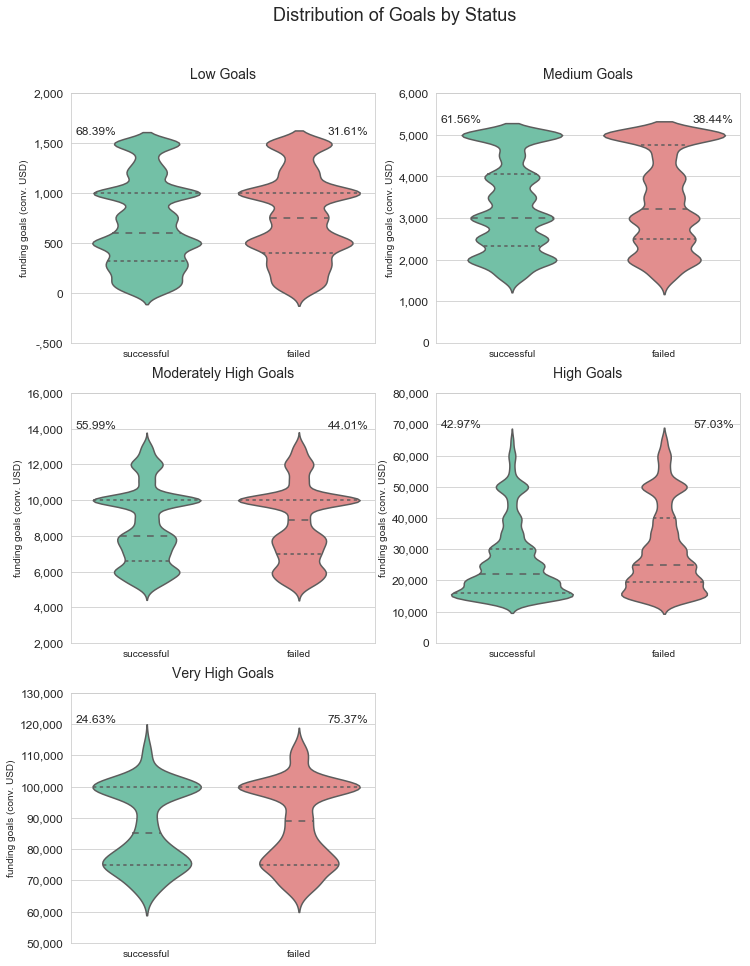

In [109]:
# settings
plt.figure(figsize=[12,10])

# completed projects filtered by goal level 
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, 
                   ks_compl_goal_very_high, ks_compl_goal_extreme]

texts = ["Low", "Medium", "Moderately High", "High", "Very High", "Extreme"]

# faceted goal violin plots 
for i, df in enumerate(ks_goal_leveled[:-1]):
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                       order=['successful', 'failed'], 
                       color =sns.set_palette([cust_green, cust_red]), 
                       inner='quartile')
    
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.06), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.06), fontsize=12)
    
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    locs, labels = plt.yticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.yticks(locs, labels, fontsize=12)
    plt.ylabel("funding goals (conv. USD)")
    
    plt.xlabel("")
    plt.subplots_adjust(bottom=-0.3)
    
plt.suptitle("Distribution of Goals by Status", fontsize=18, y=1)
plt.show()

By faceting financing goals into 5 levels, we eliminated the long tail of the previous plot. The multi-modal character of goals has become more prominent. At the same time the differences between successful and failed goals have become less apparent. Yet, if we look closely, on every goal level, the violin plots of successful goals tend to be wider on the lower end, while failed goals are generally wider on the upper end. 

Also, the median of successful campaigns is always lower than the median of failed projects. Thus, it is always reasonable to stick to the lowest goal possible to maximize the chance of success.

I annotated the proportion of successful and failed campaigns for each goal level. With 68% chances of success were highest for low goals below USD {{goal_25}}. Success rates show a continuing downward trend. Very high goals between USD {{format_num(goal_95)}} and {{format_num(goal_975)}} only succeed at a rate of 24.63%. I would like to illustrate the decreasing trend clearer by clustering goals and plot respective success rates.

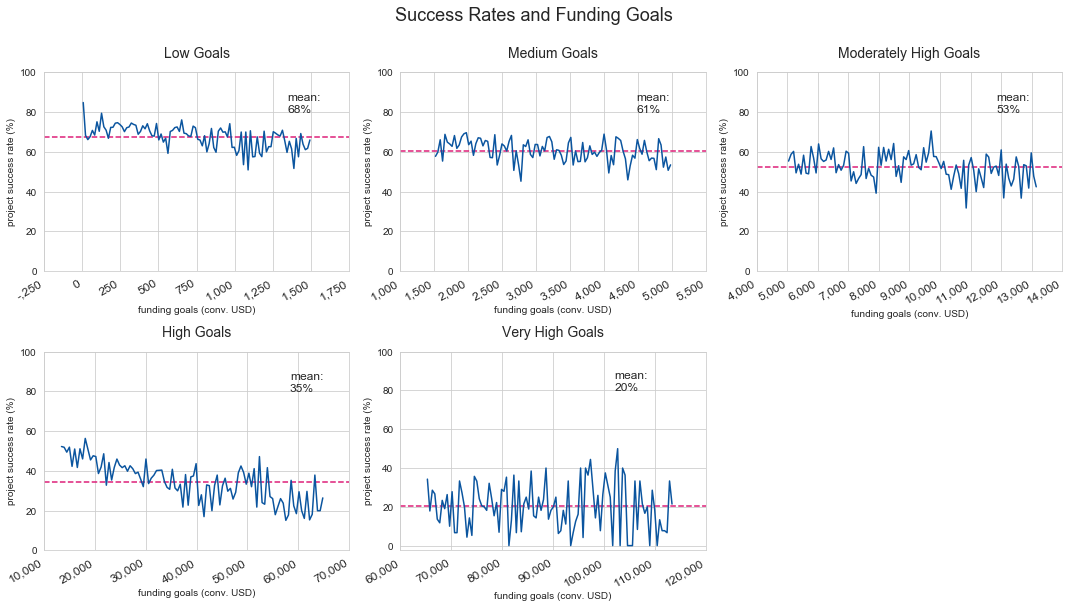

In [110]:
# settings
plt.figure(figsize=[15,8])

# utility to bin data
def bin_data(df):
    # create bin edges for goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / 100
    bins = np.arange(df['goal_hist_usd'].min(),df['goal_hist_usd'].max()+bin_size, bin_size)
    # create bin centers to plot them in their accurate positions
    # leave out the the last value, since it doesn't correspond to an actual bin center  
    bins_c = bins[:-1] + bin_size/2
    # Use cut function to bin values into discrete intervals to segment and sort data values into bins. 
    # for all goals
    goals_binned = pd.cut(df['goal_hist_usd'], bins, include_lowest = True)
    # successful goals
    goals_binned_success = pd.cut(df[df.status == 'successful']['goal_hist_usd'], bins, include_lowest = True)
    return {'total': goals_binned, 'success': goals_binned_success, 'bins': bins_c}

# utility to plot success rates
def plot_success_r(goals_binned, mean=True):
    # calculate success rate for every bin
    success_r = (goals_binned['success'].value_counts(sort=False) / goals_binned['total'].value_counts(sort=False)*100).values
    # plot success rates as adapted line plot to emphasize relative change
    plt.errorbar(x = goals_binned['bins'], y = success_r, color=goal_color)
    # plot success mean
    if mean:
        plt.axhline(success_r.mean(), color='#dd1c77', linestyle='--')
        plt.annotate("mean:\n" + str(int(round(success_r.mean()))) + "%", xy=(goals_binned['bins'].max()*0.9, 80), fontsize=12)

# faceted goals and success rates
for i, df in enumerate(ks_goal_leveled[:-1]):
    plt.subplot(2, 3, i+1)
    goals_binned = bin_data(df)
    plot_success_r(goals_binned)
    
    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    
    locs, labels = plt.xticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.xticks(locs, labels, fontsize=12, rotation=30, ha='right')
    plt.xlabel("funding goals (conv. USD)")

    plt.yticks(np.arange(0, 101, 20))
    plt.ylabel("project success rate (%)")
    plt.tight_layout()    

plt.suptitle("Success Rates and Funding Goals ", fontsize=18, y=1.05)
plt.show()

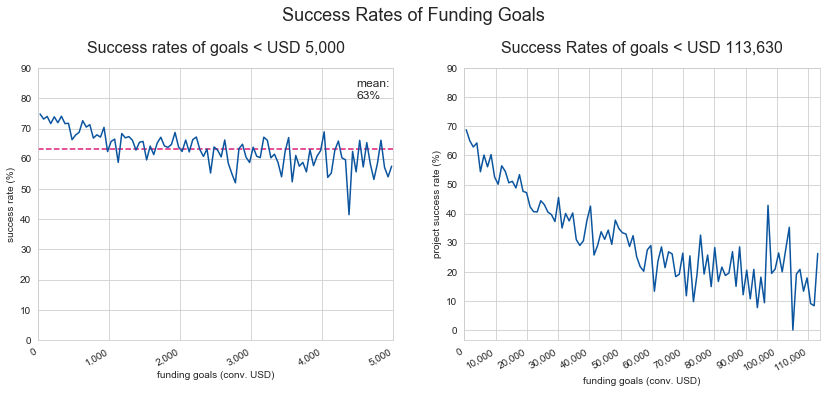

In [111]:
# settings
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
# plot low to moderately high goals
goals_binned = bin_data(ks_compl[ks_compl['goal_hist_usd'] < goal_50])
plot_success_r(goals_binned)

# ticks and labels
plt.title("Success rates of goals < USD " + format_num(goal_50), fontsize=16, pad=15)

locs = np.arange(0, goal_50+1, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("funding goals (conv. USD)")
plt.xlim(0, goal_50)

plt.yticks(np.arange(0, 91, 10))
plt.ylabel("success rate (%)")

plt.subplot(1,2,2)
# plot low to moderately high goals
goals_binned = bin_data(ks_compl[ks_compl['goal_hist_usd'] < goal_975])
plot_success_r(goals_binned, False)

# ticks and labels
plt.title("Success Rates of goals < USD " + format_num(goal_975), fontsize=16, pad=15)

locs = np.arange(0, goal_975+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("funding goals (conv. USD)")
plt.xlim(0, goal_975)

plt.yticks(np.arange(0, 91, 10))
plt.ylabel("project success rate (%)")

plt.suptitle("Success Rates of Funding Goals ", fontsize=18, y=1.05)
plt.show()

Success rates continuously decrease with higher funding goals. If creators want to keep a minimum of a 50% chance, it appears advisable to stay under a benchmark of USD 10,000, leaving all other effects aside. 

The chances of success drop from a mean 68% for low goals to 20% for very high goals. Also, the higher the goals, the more volatile success rates appear to be. Creators should generally consider the most pessimistic goals possible to win investments. 

Due to Kickstarter's all-or-nothing approach to fundings, this result doesn't surprise. More interesting for creators is to set a realistic goal in order to gain the best chance of success and collect the maximum investment possible to start their venture. 

The success rates of medium goals from USD {{format_num(goal_25)}} to {{format_num(goal_50)}} make the most constant impression. The mean of a success chance is still at a rate of 61% and a reasonable high investment may be collected.

Creators who seek funding in the moderately high goal range may be aware of a drop of success rates just ahead of USD 10,000. This is when mean success rates drop under 50/50 chances of success.

High goals up to {{format_num(goal_95)}} and to a greater degree very high goal are rather risky ventures. Success is rather unlikely, decreasing to means of 35%, respectively 20%. However, there are individual peaks in success chances at goals around USD 40,000 and USD 50,000.

**Does the scope of a funding goal affect the final investment collected?**

If funding goals should be set rather low to win a crowdfunding campaign, creators may fear that a campaign doesn't result in the necessary funding needed to launch their venture. Ultimately, the final amount pledged of a project determines the profitability of a campaign. Thus, I'm going to take into account pledges into this investigation by calculating the surplus raised above each successful funding goal.  

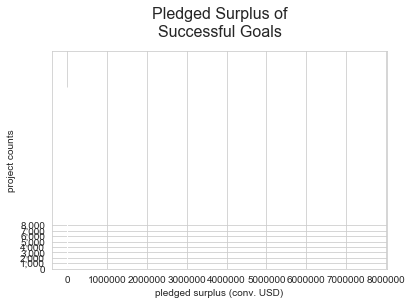

In [112]:
# calculate surplus of successful campaigns
ks_compl['surplus'] = ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'] 
ks_compl_95['surplus'] = ks_compl_95['pledged_hist_usd'] - ks_compl_95['goal_hist_usd'] 
ks_compl_success= ks_compl[ks_compl.status == "successful"]

bin_edges = np.arange(0, ks_compl_success['surplus'].max()+250, 250)
sns.distplot(ks_compl_success['surplus'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1, 'color': pledged_color})
# plt.xlim(0, 8000)

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals", fontsize=16, pad=15)
format_yticks(40000, 5000)
plt.ylabel("project counts")
format_yticks(8000, 1000)

locs, labels = plt.xticks()
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, ha='right')
plt.xlabel("pledged surplus (conv. USD)")

plt.show()

Like pledges, low surpluses are more common than high surpluses and the distribution is strongly skewed. By far most commonly realized surpluses are under USD 250. Now, let's depict surpluses to respective goal.

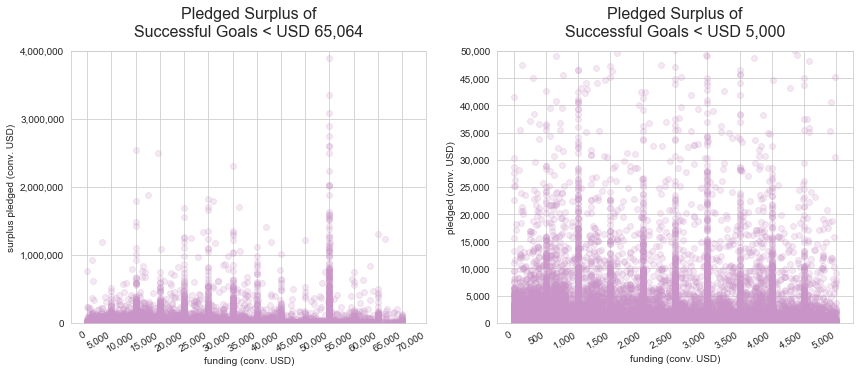

In [113]:
# a regplot approach

# settings
plt.figure(figsize=[14,5])

# left: regplot approach - 95-quantile goals only
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False, color=pledged_color);
plt.xlabel("goals < " + format_num(int(round(goal_95))) +  " (conv. USD)")

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals < USD " + format_num(goal_95), fontsize=16, pad=15)

locs = np.arange(0, goal_95+5000, 5000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("funding (conv. USD)")

locs = np.arange(0,  4000000+1000000, 1000000)
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels, fontsize=10)
plt.ylabel("surplus pledged (conv. USD)")
plt.ylim(0, 4000000)

# right: regplot approach - 50-quantile goals only
plt.subplot(1,2,2)
ks_goal_50_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_50]
sns.regplot(ks_goal_50_s.goal_hist_usd, ks_goal_50_s.surplus, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False, color=pledged_color);

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals < USD " + format_num(goal_50), fontsize=16, pad=15)

locs = np.arange(0, goal_50+500, 500)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("funding (conv. USD)")

format_yticks(50000, 5000)
plt.ylabel("pledged (conv. USD)")
plt.ylim(0, 50000)

plt.show()

The most striking feature about the relationship between the surplus pledged and a goal is the density of projects generating an array of surpluses at goals in intervals of 5,000. In goals under USD 5,000, the intervals occur in steps of USD 500. 

To be precise, goals of USD 5 tsd, 10 tsd, 15 tsd etc., stand out in realizing high surpluses. Goals of USD 50 tsd catch the eye by realizing the highest possible pledges within the scope of the 95 quantile goals. 

Ignoring the multi-modality of goals, the surplus generated, appears to be relatively evenly distributed across goals. This is true for low and high goals. This indicates that the scope of a goal does not necessarily influence the surplus of the final amount collected and that creators may raise their chances to realize higher investments by choosing goals in aforementioned intervals. 

Before we draw any conclusion, it makes sense to relate the surplus to it's goal.

In [114]:
# calculate relative differences between goal and pledged of successful campaigns
ks_compl['surplus_r'] = abs(ks_compl['surplus'] / ks_compl['goal_hist_usd']) *100 
ks_compl_95['surplus_r'] = abs(ks_compl_95['surplus'] / ks_compl_95['goal_hist_usd']) *100 
ks_compl_success = ks_compl[ks_compl.status == 'successful']
ks_compl_success.surplus_r.sort_values().tail(10)

169534   999,900.0          
90851    1,257,415.0        
19850    1,282,632.0        
13982    1,368,300.0        
65454    2,260,200.0        
152283   2,303,506.7        
85712    2,758,723.0        
26989    2,868,718.0        
152219   4,153,401.0        
63357    6,876,310.000000001
Name: surplus_r, dtype: float64

We found some very high surplus rates. Thus, we are going to apply a log scale transformation on our rates.

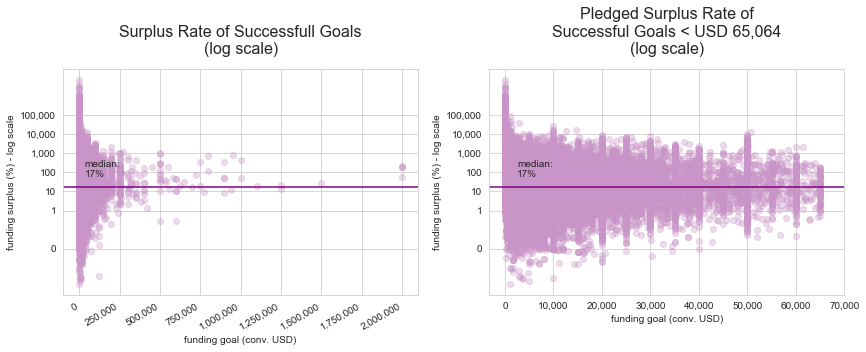

In [115]:
# settings
plt.figure(figsize=[14,5])

# left plot: regplot using log scale on y-axis, goals of all successful projects
plt.subplot(2,2,1)
sns.regplot(ks_compl_success.goal_hist_usd, ks_compl_success.surplus_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, truncate=True, color=pledged_color,
            fit_reg=False);

# plot and annotate median
surplus_r_median = round(log_trans(ks_compl_success.surplus_r.median()),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(35000, surplus_r_median+0.5, 
         "median:\n" + str(int(round(log_trans(surplus_r_median, inverse=True)))) + "%")

# ticks and labels
plt.title("Surplus Rate of Successfull Goals\n(log scale)", fontsize=16, pad=15)

ylocs = [0.01, 1, 10, 100, 1000, 10000, 100000]
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(log_trans(ylocs), ylabels)

plt.xlabel("funding goal (conv. USD)")
plt.ylabel("funding surplus (%) - log scale")

xlocs = np.arange(0, ks_compl_success.goal_hist_usd.max()+25000, 250000)
xlabels = [str(format_num(loc)) for loc in xlocs]
plt.xticks(xlocs, xlabels, rotation=30, ha='right')

# right plot: zoom in on 95-quantile goals
plt.subplot(2,2,2)
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus_r.apply(log_trans),
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);

# plot and annotate median
surplus_r_median = round(log_trans(ks_goal_95_s.surplus_r.median()), 2)
plt.axhline(surplus_r_median, color='purple')
plt.text(2500, surplus_r_median+0.5, 
         "median:\n" + format_num(log_trans(surplus_r_median, inverse=True)) + "%")

# ticks and labels
plt.title("Pledged Surplus Rate of\nSuccessful Goals < USD " + format_num(goal_95) + "\n(log scale)", fontsize=16, pad=15)
ylocs = [0.01, 1, 10, 100, 1000, 10000, 100000]
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(log_trans(ylocs), ylabels)
plt.ylabel("funding surplus (%) - log scale")

format_xticks(70000, 10000)
plt.xlabel("funding goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

plt.show()

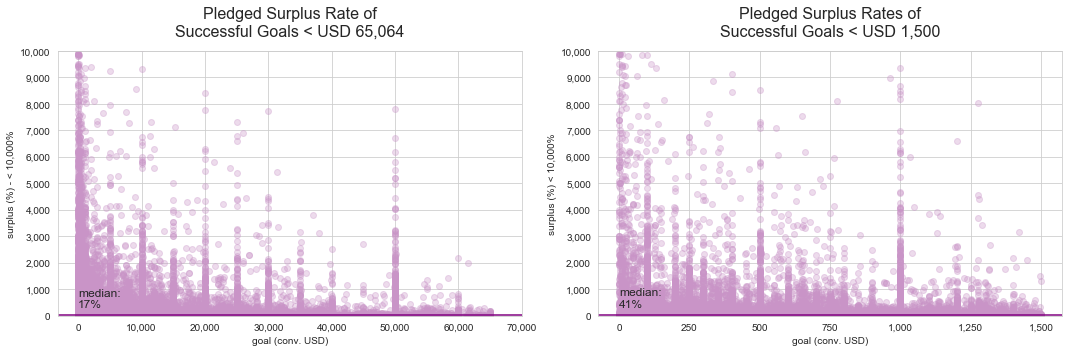

In [116]:
# settings
plt.figure(figsize=[15,5])

# left: plot surplus rates of 75% quantile goals
plt.subplot(1,2,1)
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);
plt.ylim(0, 10000)

# annotate median
surplus_r_median = round(ks_goal_95_s.surplus_r.median(),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(ks_goal_95_s.goal_hist_usd.min()*1.2, surplus_r_median+300, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)

# ticks and labels
plt.title("Pledged Surplus Rate of\nSuccessful Goals < USD " + format_num(goal_95), fontsize=16, pad=15)

ylocs = np.arange(0, 10000+1000, 1000)
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(ylocs, ylabels)
plt.ylabel("surplus (%) - < 10,000%")

xlocs = np.arange(0, goal_95+10000, 10000)
xlabels = [str(format_num(loc)) for loc in xlocs]
plt.xticks(xlocs, xlabels)
plt.xlabel("goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

# right: plot surplus rate of 50% quantile goals
plt.subplot(1,2,2)
ks_goal_25_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_25]
sns.regplot(ks_goal_25_s.goal_hist_usd, ks_goal_25_s.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);

# annotate median
surplus_r_median = round(ks_goal_25_s.surplus_r.median(),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(ks_goal_25_s.goal_hist_usd.min()*1.2, surplus_r_median+300, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)

# ticks and labels
plt.title("Pledged Surplus Rates of\nSuccessful Goals < USD " + format_num(goal_25), fontsize=16, pad=15)
format_yticks(100000, 1000)
plt.ylabel("surplus (%) < 10,000%")
plt.ylim(0, 10000)
format_xticks(goal_25, 250)
plt.xlabel("goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

plt.tight_layout()
plt.show()

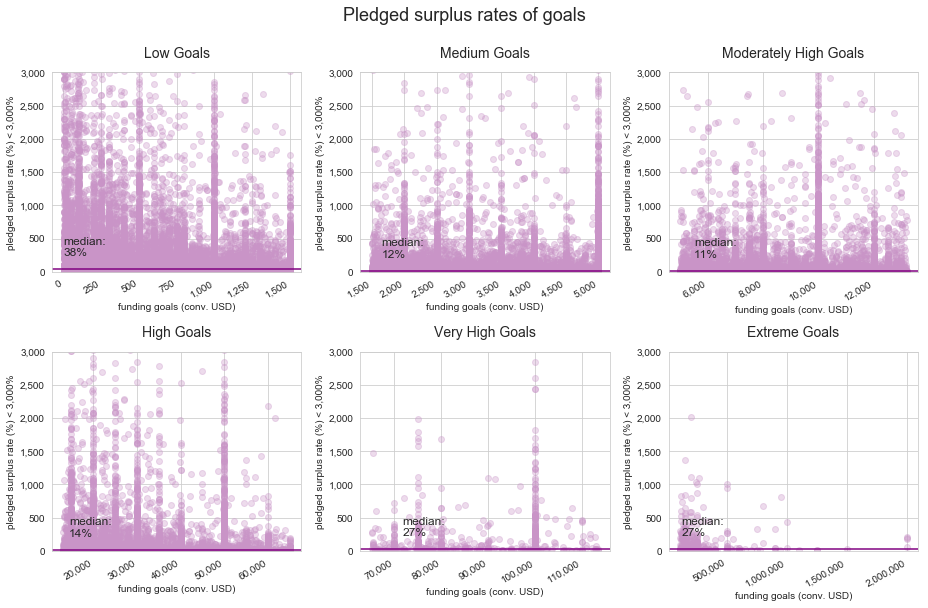

In [117]:
# settings
plt.figure(figsize=[13,8])

# facet goals
for i, goal_level in enumerate([goal_level.lower() for goal_level in texts]):
    plt.subplot(2, 3, i+1)
    df = ks_compl[ks_compl['goal_level'] == goal_level]
    df = df[df.status == 'successful']
    sns.regplot(df.goal_hist_usd, df.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);
    
    # annotate median
    surplus_r_median = round(df.surplus_r.median(),2)
    plt.axhline(surplus_r_median, color='purple')
    plt.text(df.goal_hist_usd.min()*1.1, surplus_r_median+200, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)
    
    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    locs, labels = plt.xticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.xticks(locs[1:-1], labels[1:-1], rotation=30, ha='right')
    plt.xlabel("funding goals (conv. USD)")
    format_yticks(3000, 500)
    plt.ylabel("pledged surplus rate (%) < 3,000%")
    plt.ylim(0,3000)
    plt.tight_layout()    
plt.suptitle("Pledged surplus rates of goals", fontsize=18, y=1.05)
plt.show()

The relative surplus creators realize, can be best interpreted by depicted surplus rates under USD {{format_num(goal_95)}}.

Regardless of the chosen funding goal, on average, creators may expect 17% above they had asked for. 
The higher a campaign goal, the lower the relative surplus. As a matter of fact the possible surplus can be best described as a function of exponential decay, which decreases sharpest for the lowest goals. 

If creators set low goals below USD {{format_num(goal_25)}}, they can expect a median surplus of 41%. After the initial decay, medium, moderately high and high goals generate relatively constant median surplus rates of 11-14%. 

The median surplus drops down to 11% for moderately high goals. Then, we notice a slight upward trend above the benchmark of USD 65,000. Ultimately, very high goals achieve median surplus rates of 27%.

We still notice a high density of surplus rates around full numbers, which may distort the interpretation of pledged funding. This is why we are going to bin goals according to the detected intervals. Then, we calculate the median of the surplus for each binned goal. This will allow us to depict the relationship in an adapted line plot. 

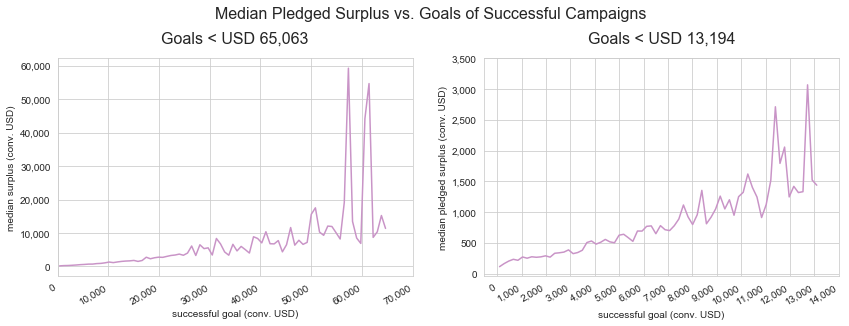

In [118]:
# settings
plt.figure(figsize=[14,4])

def binned_pledges(df, bin_count):
    # cluster goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / bin_count
    bin_edges = np.arange(df['goal_hist_usd'].min(), df['goal_hist_usd'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['goal_bin'] = pd.cut(df['goal_hist_usd'], bin_edges, labels=bin_centers)
    # calculate pledged median for every goal
    df_binned = df['surplus'].groupby([df.goal_bin]).median().reset_index()
    return df_binned

# left plot: binned median pledges and respective binned goals 
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile 
df_binned = binned_pledges(ks_goal_95_s, 80)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(int(goal_95)), fontsize=16, pad=15)
    
locs = np.arange(0, 65000+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels,  rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")
plt.xlim(0, 70000)

format_yticks(60000, 10000)
plt.ylabel("median surplus (conv. USD)")

# right plot: binned median pledges vs. respective binned goals: moderately high goals (50% quantile)
plt.subplot(1,2,2)
df_binned = binned_pledges(ks_compl_success[ks_compl_success.goal_hist_usd < goal_75], 70)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(goal_75), fontsize=16, pad=15)

locs = np.arange(0, goal_75+1000, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")

format_yticks(3500, 500)
plt.ylabel("median pledged surplus (conv. USD)")

plt.suptitle("Median Pledged Surplus vs. Goals of Successful Campaigns  ", fontsize=16, y=1.06)
plt.show()


The surplus pledged above goal increases up until USD 10,000 linearly at a constant rate below 1. Beyond that, the surplus grows faster. Only considering the surplus peaks, we even find an exponential character. The median surplus of very high goals becomes more and more volatile and therefore less reliable.

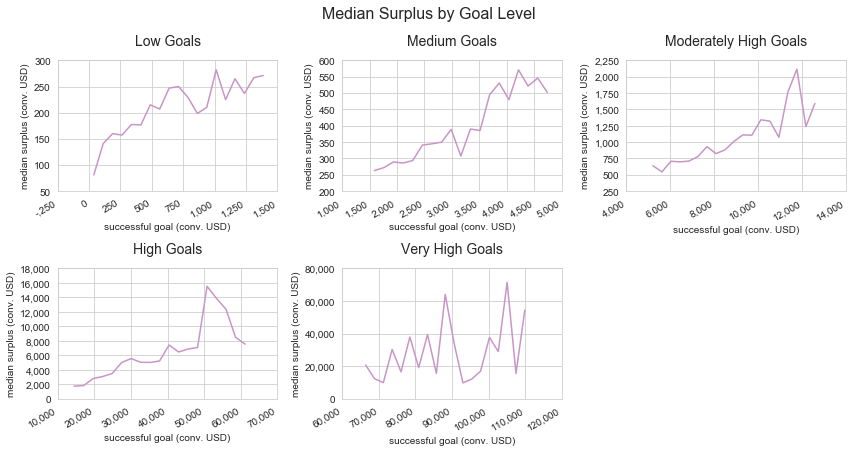

In [119]:
# settings
plt.figure(figsize=[12,6])

# facet by binned goals
for i, goal_level in enumerate([goal_level.lower() for goal_level in texts][:-1]):
    plt.subplot(2, 3, i+1)
    df = ks_compl_success[ks_compl_success['goal_level'] == goal_level]
    df_binned = binned_pledges(df, 20)
    plt.errorbar(x = df_binned['goal_bin'][:-1], y = df_binned['surplus'][:-1], color=pledged_color )    

    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    
    locs, labels = plt.xticks()
    labels = [format_num(loc) for loc in locs]
    plt.xticks(locs, labels, rotation=30, ha='right')
    plt.xlabel("successful goal (conv. USD)")
 
    locs, labels = plt.yticks()
    labels = [format_num(loc) for loc in locs]
    plt.yticks(locs, labels)
    plt.ylabel("median surplus (conv. USD)")
    plt.tight_layout()    

plt.suptitle("Median Surplus by Goal Level", fontsize=16, y=1.04)
plt.show()


By working with the median surplus of binned goals, we smoothend the curve to eliminate the multi-modal character of funding.
Accordingly, the best chances to generate a high surplus are at:

- Low goals: USD 1,000 - 1,500,
- Medium goals: USD 3,000 - 5,000,
- Moderately high goals: USD 11,000 - 12,000,
- High goals: USD 50,000 - 60,000.

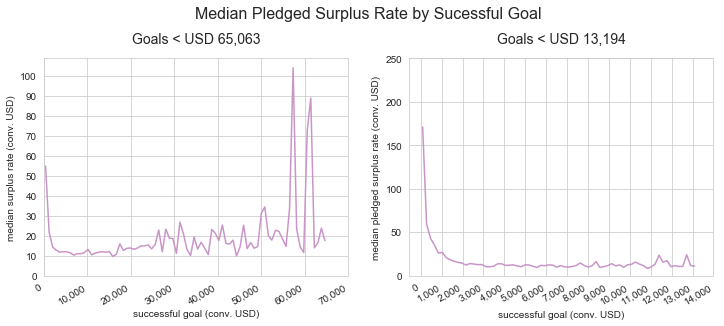

In [120]:
# settings
plt.figure(figsize=[12,4])

def binned_pledges(df, bin_count):
    # cluster goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / bin_count
    bin_edges = np.arange(df['goal_hist_usd'].min(), df['goal_hist_usd'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['goal_bin'] = pd.cut(df['goal_hist_usd'], bin_edges, labels=bin_centers)
    # calculate median surplus rate for every goal
    df_binned = df['surplus_r'].groupby([df.goal_bin]).median().reset_index()
    return df_binned

# left plot: binned median pledges and respective binned goals 
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile 
df_binned = binned_pledges(ks_goal_95_s, 80)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus_r'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(int(goal_95)), fontsize=14, pad=15)
    
locs = np.arange(0, 65000+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")
plt.xlim(0, 70000)

plt.yticks(np.arange(0, 100+10, 10))
plt.ylabel("median surplus rate (conv. USD)")

# right plot: binned median pledges vs. respective binned goals: moderately high goals (50% quantile)
plt.subplot(1,2,2)
df_binned = binned_pledges(ks_compl_success[ks_compl_success.goal_hist_usd < goal_75], 70)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus_r'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(goal_75), fontsize=14, pad=15)
    
locs = np.arange(0, goal_75+1000, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")

format_yticks(250, 50)
plt.ylabel("median pledged surplus rate (conv. USD)")

plt.suptitle("Median Pledged Surplus Rate by Sucessful Goal", fontsize=16, y=1.06)
plt.show()


The plots illustrate that the surplus creators may generate depends on the goal chosen. For goals under USD 3,000 the surplus rate describes a curve of exponential decay. The lower the goal chosen, the higher the surplus rate. 

Thereafter, the median surplus rate stays relatively constant at 11%. For goals above USD 18,000, we observe increasing surplus rates. Towards high goals above USD 45,000, the pledged surplus rate grows steeper. At the same time, the plot becomes more volatile with anormalous peaks getting extremer. However, this is hardly relevant, since 3 quarters of creators stick to goals below USD 13,000.  


**Does a goal affect the investment of individual backers?**

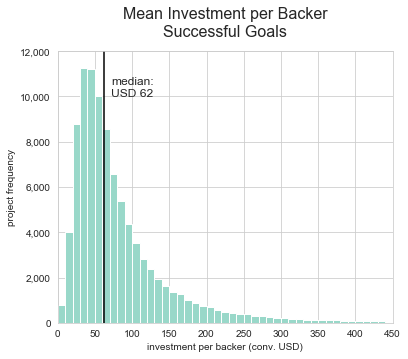

In [121]:
# settings
plt.figure(figsize=[6,5])

# calculate the pledged investment per backer
ks_compl['pledged_backer_r'] = ks_compl['pledged_hist_usd'] / ks_compl['backers_count']
ks_compl_95['pledged_backer_r'] = ks_compl_95['pledged_hist_usd'] / ks_compl_95['backers_count']
ks_compl_success = ks_compl[ks_compl.status == "successful"]

bin_edges = np.arange(0, ks_compl_success['pledged_backer_r'].max()+10, 10)
sns.distplot(ks_compl_success['pledged_backer_r'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1, 'color': '#99d8c9'})
plt.xlim(0, 450)

# annotate median
median_pledged = ks_compl_success['pledged_backer_r'].median()
plt.axvline(x=median_pledged, color='black')
plt.annotate("median:\nUSD " + format_num(median_pledged), xy=(median_pledged+10, 10000),fontsize=12)


# ticks and labels
plt.title("Mean Investment per Backer\nSuccessful Goals", fontsize=16, pad=15)
format_yticks(12000, 2000)
plt.ylabel("project frequency")
plt.xlabel("investment per backer (conv. USD)")

plt.show()

On average backers pledged a median of USD 62. The investment per backer is strongly skewed towards higher pledges. This is why we find most individual pledges clustered between USD 25-50. Let's see how the scope of a goal affect how much each supporter invests.

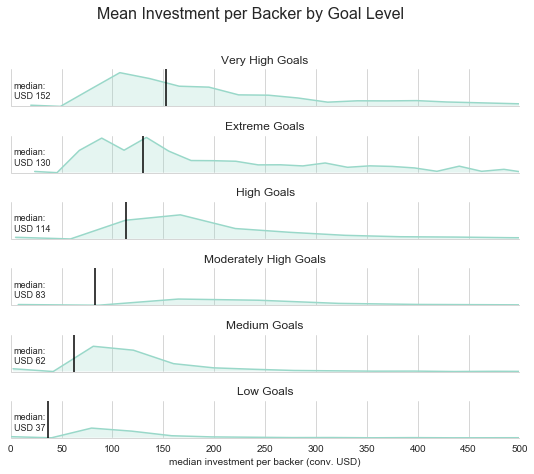

In [122]:
# calculate median per goal level
group_means = ks_compl_success.groupby(['goal_level']).median()
group_order = group_means.sort_values(['pledged_backer_r'], ascending = False).index[:-1]

# facet plots per goal levels 
g = sns.FacetGrid(data = ks_compl_success, row = 'goal_level', height = 1, aspect = 8,
                 row_order = group_order)

# plot distribution as kernel density estimate
g.map(sns.kdeplot, 'pledged_backer_r', shade = True, bw=0.1, color='#99d8c9')
plt.xlim(0, 500)

# annotate median per goal level
def vertical_mean_line(data, **kwargs):
    plt.axvline(data.median(),**kwargs)  
    plt.text(3, 0.001, "median:\nUSD " + format_num(data.median()), fontsize=9)
g.map(vertical_mean_line, 'pledged_backer_r',  color='black' )

# labels and ticks
for ax, title in zip(g.axes.flat, group_order):
    ax.set_title(title.title() + " Goals")

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

format_xticks(500, 50)
plt.xlabel("median investment per backer (conv. USD)")

plt.suptitle("Mean Investment per Backer by Goal Level", fontsize=16, y=1.09)
plt.show()

The higher a goal, the higher was the average amount each supporter invested. For successful low goal projects (below USD 1,500) the median pledged per backer was USD 37. Moderately high goals generate a median of USD 114. Successful very high goal projects generate the highest median funding per backer: USD 152. Thereby, the individual amount pledged was above extreme goal projects.

**Do project funding opportunities depend on the project type?**  

It makes only sense that the wide variety of projects on Kickstarter require different amounts of funding. A card game surely plays in a different investment range than a space mission.   

The question is whether different project categories are typically attributed with different levels of funding. More importantly, we would like to know if supporters are willing to invest higher amounts if a project type typically requires high funding.   

To depict the relationship, we are going to work on median numbers instead of funding ranges. We want to keep the plot neat to improve readability. 

In [123]:
# calculate median goals and create dataframe
def calc_med_goals_by(category):
    ks_cat_median = ks_compl.groupby(['status', category]).median()['goal_hist_usd']
    ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
    ks_cat_median = ks_cat_median.pivot(index = category, columns = 'status',
                            values = 'goal_median')
    ks_cat_median.rename(index=str, 
                     columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                     inplace=True)
    # calculate median pledged
    med_cat_pledged = ks_compl.groupby(['status', category]).median()['pledged_hist_usd']
    med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
    med_cat_pledged = med_cat_pledged.pivot(index = category, columns = 'status',
                            values = 'med_pledged')

    # add to dataframe
    ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
    ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
    ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
    return  ks_cat_median
ks_cat_median = calc_med_goals_by('category')
ks_cat_median.head()

status category  med_goal_fail  med_goal_success  med_pledged_fail  \
0       Crafts  3,000.0        1,000.0           33.5                
1       Art     4,000.0        1,500.0           54.0                
2       Theater 5,000.0        3,000.0           85.0                
3       Dance   5,000.0        3,000.0           60.0                
4       Comics  5,000.0        2,500.0           229.126524372907    

status  med_pledged_success  
0      1,954.9889279330077   
1      2,468.0               
2      3,225.0               
3      3,503.5               
4      3,743.0

Plot each category's summary of median funding using a stacked bars. Compare the successful median values to the median values of failed projects by clustering bars.    

In [124]:
# utility to plot clusterd/stacked bars of funding opportunities by category
def plot_funding_by(df, category, order):
    # settings
    funding = ['med_goal_success', 'med_pledged_success']
    color_greens = ['#99d8c9', '#1b9e77']
    baselines = np.zeros(len(order)) # set baseline of every barplot to zero 
    bars = []
    
    # horizontally plot goal by category first, then plot pledged surplus on top of goal 
    ax = plt.subplot(111)
    for i in range(2):
        amount = df[funding[i]]
        amount = list(amount - baselines) # subtract goal from pledges to calculate surplus
        bars += ax.barh(y=np.arange(0.2, len(order)+0.2), 
                 width=amount, left=baselines, 
                 color=sns.set_palette(color_greens), height=0.3)

        # add goal to baseline to plot next stack of bar
        baselines += amount

    # add median failed goals as horizontal bars 
    bars += ax.barh(y=np.arange(-0.12, len(order)-0.12), 
                 width=df['med_goal_fail'], 
                 color=cust_red, height=0.3) 

    # ticks and labels
    ylocs = np.arange(0, len(order), 1)
    plt.yticks(ylocs, order, fontsize=12)
    plt.ylabel("project category")
    format_xticks(df['med_pledged_success'].max(), 5000)
    plt.xlabel("median funding (convert. USD)")

    leg = plt.legend([bars[0], bars[1], bars[3]], 
                     ['median successful goals', 
                      'median pledged surplus', 
                      'median failed goals'], 
                     frameon=True, fontsize=10)
    leg.legendHandles[0].set_color(color_greens[0])
    leg.legendHandles[1].set_color(color_greens[1])
    leg.legendHandles[2].set_color(cust_red)

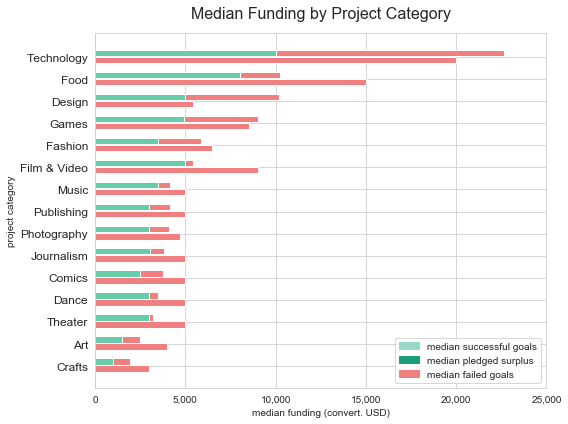

In [125]:
# settings
fig = plt.figure(figsize = [8, 6])
cat_order_asc = ks_cat_median.category.values

# plot median funding by project category
plot_funding_by(ks_cat_median, 'category', cat_order_asc)
plt.title("Median Funding by Project Category", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

Technology, food and design projects on average require and realize the highest funding between USD 5,000 to 10,000. At the low end of funding, theater, art and craft projects collect funding below USD 3,000. 

Technology projects stand out with the highest median funding requirements of USD 10,000. Failed technology campaigns requested on average double. Even so, technology projects seeking a lower goal ultimately outbid failed goals. Successful tech projects collected a median of USD 22,500.

Most apparent for food campaigns is the deficit of investments compared to the required funding goals. The median goal of failed projects was much higher than the average collected funding. Similarly, film & video productions tend to require goals above the demand to invest. 

Design projects makes the most balanced impression between failed and successful goals. The high pledged surplus over design goals presages a high demand of backers, resulting in a high median surplus.

The high investment requirements of tech and food projects may one explanation for respective low success rates.

In [126]:
# calulate median funding values of combined categories
ks_comb_cat_median = calc_med_goals_by('comb_cat')
ks_comb_cat_median.tail()

status                     comb_cat      med_goal_fail    med_goal_success  \
164     Film & Video/Movie Theaters 45,000.0           30,000.0              
165     Technology/3D Printing      17,095.49999957347 15,750.0              
166     Technology/Hardware         35,000.0           16,192.0              
167     Technology/Wearables        28,500.0           25,000.0              
168     Technology/Camera Equipment 23,000.0           23,615.734314364545   

status  med_pledged_fail  med_pledged_success  
164    32.16900000106383 35,842.19             
165    512.0231305962196 38,490.0              
166    587.8688143953307 39,016.43618752194    
167    650.4058966036991 48,167.45691835119    
168    1,935.0           65,039.5

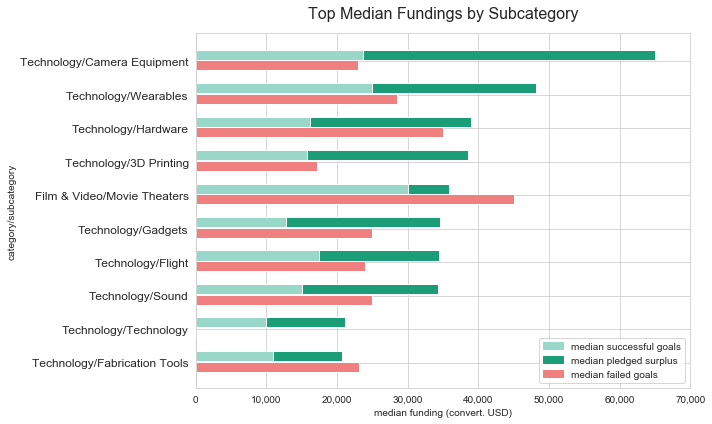

In [127]:
# settings
fig = plt.figure(figsize = [10, 6])
top_subcats = ks_comb_cat_median['comb_cat'].values[-10:]

# plot median funding by combined category
plot_funding_by(ks_comb_cat_median[-10:], 'comb_cat', top_subcats)

# labels and ticks
plt.title("Top Median Fundings by Subcategory", fontsize=16, pad=15)
plt.ylabel("category/subcategory")
format_xticks(ks_comb_cat_median['med_pledged_success'].max(), 10000)
plt.tight_layout()
plt.show()

Tech projects were dominating the top of the highest median total investment. Camera equipment by far attracted the highest median pledges, followed by wearables. Both type of projects also realized a strong surplus above goals. On average camera equipment collected an impressive amount of USD 65,000. 

It's remarkable that mostly hardware appliances instead of software are among the highest fundings. Only movie theaters from the parenting category theaters made it to the top 10 of the highest median fundings.

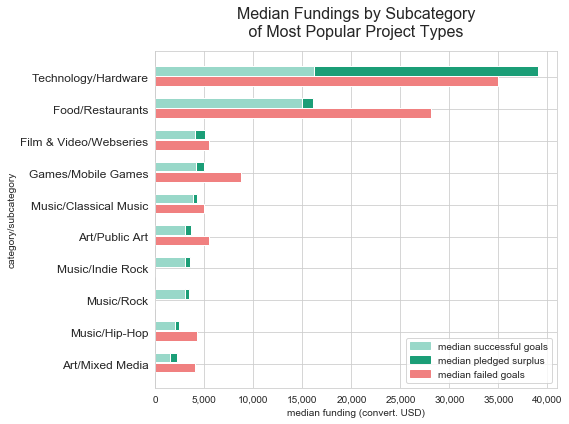

In [128]:
# settings
fig = plt.figure(figsize = [8, 6])
df_pop_subcats = ks_comb_cat_median[ks_comb_cat_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
order = df_pop_subcats['comb_cat'].values

# plot median funding by combined category
plot_funding_by(df_pop_subcats, 'comb_cat', order)

# labels and ticks
plt.title("Median Fundings by Subcategory\n of Most Popular Project Types ", fontsize=16, pad=15)
plt.ylabel("category/subcategory")
plt.tight_layout()
plt.show()

Apart from hardware and restaurant projects, the most popular Kickstarter projects seek relatively low funding goals below USD 5,000. 

**Which project categories were worthwile to run?**

I previously analyzed the popularity of project types, their funding and success rates. Now, I am prepared to evaluate which categories on average performed good or bad.    

For investment seekers success rates of categories and the potential funding opportunities are important. Thus, I am going to depict the pledged median funding against the success rate for each category. 

In [129]:
# utility to add success rates to data frame
def calc_cat_success(cat, df=ks_compl):
    success = df.groupby([cat,'status']).count()['project_id']
    success = success.reset_index(name='count')
    success = success.pivot(index=cat, columns='status', values='count')
    success = success.reset_index()
    # divide failed and success columns by category counts
    for status in ['failed', 'successful']:
        success[status] = (success[status] / df.groupby([cat]).count()['project_id'].values)*100
    return success

In [130]:
# add success rates to our data frame
df_cat_success = calc_cat_success('category')
ks_cat_median = ks_cat_median.merge(df_cat_success, on='category')

In [131]:
# utility function to plot multivariate plot of 2 numerical and 1 quantitative variable
def plot_facet_scatter_by(df, cat, headline, quadrants=True):
    g = sns.FacetGrid(data = df, hue = cat, height = 5, palette=category_colors)
    g.map(plt.scatter, 'successful', 'med_pledged_success')
    success_median = ks_cat_median['successful'].median()
    pledged_median = ks_cat_median['med_pledged_success'].median()
    
    ax = g.axes[0]
    if quadrants:
    # divide axis into 4 squares using a median
        ax[0].axvline(success_median, ls='--', label='median')
        ax[0].axhline(pledged_median, ls='--')

    # labels and ticks
    plt.title("Pledges by Success Rates\n" + headline, fontsize=16, pad=15)
    xlocs = np.arange(0, 100+10, 10)
    plt.xticks(xlocs)
    plt.xlabel("------ median success chances (%) ------>")
    format_yticks(df['med_pledged_success'].max(),5000)
    plt.ylabel("------ median pledged (convert. USD) ------>")

    leg = ax[0].legend(loc=1, bbox_to_anchor=(1.4, 1))
    leg.set_title('')
    plt.show()
    return g

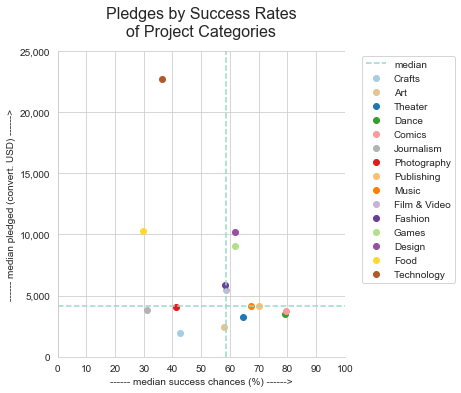

In [132]:
# plot pledged investment and success chance in a faceted scatterplot for each category
plot_facet_scatter_by(ks_cat_median, 'category', "of Project Categories");

The categories located in the upper right square imply the best chances for creators. Design and game projects have high chances of success and realize a comparatively high median funding. Tech and food projects usually collected the highest investments, yet success chances were among the lowest. 

Projects categories found in the lower right quadrant have high chances to run successfully, but usually don't collect large investments. This is especially true for comics and dance ventures. However, creators may judge themselves how much funding is required to launch a project successfully.

Journalism, crafts and photography perform weakest in terms of chances and the collected funding. 
Let's plot a similar scatter plot for the most popular subcategories.

In [133]:
# add success rates to our data frame
df_comb_cat_success = calc_cat_success('comb_cat')
ks_comb_cat_median = ks_comb_cat_median.merge(df_comb_cat_success, on='comb_cat')

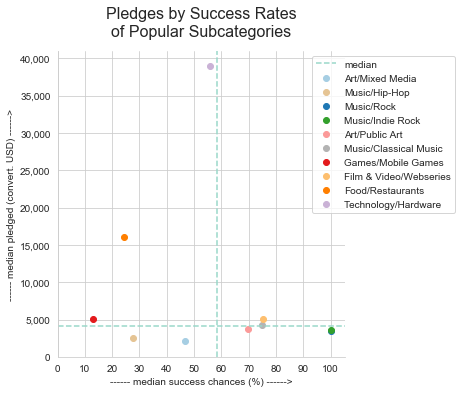

In [134]:
# filter by popular categories 
df_pop_subcats = ks_comb_cat_median[ks_comb_cat_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
# analyse most popular subcategories by median pledges and success rates
plot_facet_scatter_by(df_pop_subcats, 'comb_cat', "of Popular Subcategories");

The 10 most popular subcategories performed comparatively weak. Only web series fell into the upper right quadrant, but on average only realized USD 5,000. 

Indie Rock was the savest bet with a 100% success chance. 

The highest investments were realized by successful hardware projects. On average the achieved a funding of USD 38 tsd, but were just below the median success chances.

Mobile Games and Hip-Hop music were among the most popular categories. Nevertheless, both categories were usually not rewarding the creator with success guarantee nor high funding.

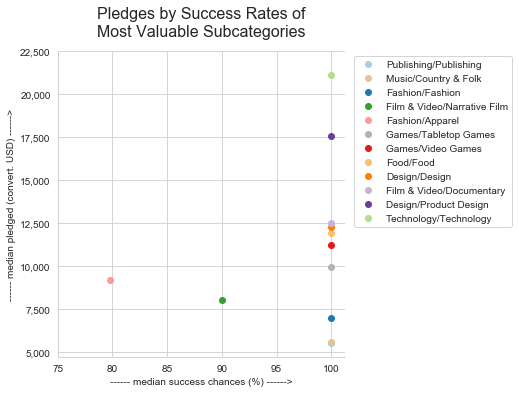

In [135]:
# filter by best conditions
df_best_types = ks_comb_cat_median[ks_comb_cat_median['med_pledged_success'] >= 5500]
df_best_types = df_best_types[df_best_types.successful > 70]
# identify best subcategories by median pledges and success rates
g = sns.FacetGrid(data = df_best_types, hue = 'comb_cat', height = 5, palette=category_colors);
g.map(plt.scatter, 'successful', 'med_pledged_success')

# labels and ticks
plt.title("Pledges by Success Rates of\nMost Valuable Subcategories", fontsize=16, pad=15)
format_xticks(100, 5, 75)
plt.xlabel("------ median success chances (%) ------>")
format_yticks(df_best_types['med_pledged_success'].max(), 2500, 5000)
plt.ylabel("------ median pledged (convert. USD) ------>")

plt.legend(loc=1, bbox_to_anchor=(1.6, 1))
plt.show()

### Summary Funding

When creators decide on a goal, they generally have to ponder whether to maximize their chances to successfully end a campaign or to generate the maximum funding possible. Both targets oppose each other diametrically. Raising the goal typically decreases the chances to succeed, yet creators risk insufficient funding by aiming for low goals.  

If creators want to keep at least a 50% chance, it appears to be advisable to stay below a benchmark of USD 10,000, leaving all other effects aside. On average goals below 5,000 have a chance above 60%. 

Very risk averse creators may stick to low goals below USD 1,500. Interestingly, low goal projects typcially generate a surplus of 34% above goal. At the same time goals between USD {{format_num(goal_25)}} to {{format_num(goal_75)}} only generate a median surplus of 12 to 11%. Therefore, the loss in the total funding by setting low goals may be tolerable in exchange for better chances of success.   

Provided a campaign ended in success, creators on average collected higher investments, the higher they initialize the goal. The function of the surplus rate of pledges above goal overall describes a slow growing trend. However, there are two significant anomalies. First of all, up until USD 3,000 the surplus rate describes a curve of exponential decay. This explains the relatively high surplus generated by low goals. Secondly, goals above USD 18,000 describe increasing surplus rates. Towards high goals above USD 45,000, the pledged surplus rate grows steep. At the same time, the plot becomes more volatile with anormalous peaks getting extremer. However, this is hardly relevant, since 3 quarters of creators stick to goals below USD 13,000.

The goal not only influenced success chances, but also how much every supporter was contributing. The higher a goal, the higher is usually the amount pledged per backer. On average supporters pledged USD 37 for goals below USD {{format_num(pledged_95)}}, but invested a fourfols for very high goals. Creators may consider this behavior when defining the rewards for pledges.  

Creators seeking high funding may consider alternative investment possibilities to Kickstarter. 95% of all successful projects kept below contributions of USD {{format_num(pledged_95)}}. At the same time success chances were very low for very high goal projects of USD {{format_num(goal_95)}} to {{format_num(goal_975)}} : only 20% of campaigns ended in success. For even higher goals, success chances dropped to zero.     

The investment capacity was strongly determined by the project type. Generally, tech and food projects required the highest average funding of USD 15 tsd. Tech projects realized the highest median pledges of plus USD 22 tsd. On the low end of funding were art and craft campaigns, which only realized a median USD 2.5 tsd.

Tech and food projects achieved high investments and were the most likely to fail. To address this, we identified the most valuable project categories by depicting pledges against success rates.   

By filtering subcategories by above standard values of success rates and pledges, we found the most valuable categories were:   

1) technology projects without defined subcategory,   
2) product design projects and  
3) documentary films.  

The most disappointing projects were of the type:   

1) mobile games,  
2) Hip-Hop music and  
3) generally journalistic projects.  


### Duration

The univariate plot of duration above tells us that a funding duration of 30 days is most common. Let's see if 30 days has always been the standard.

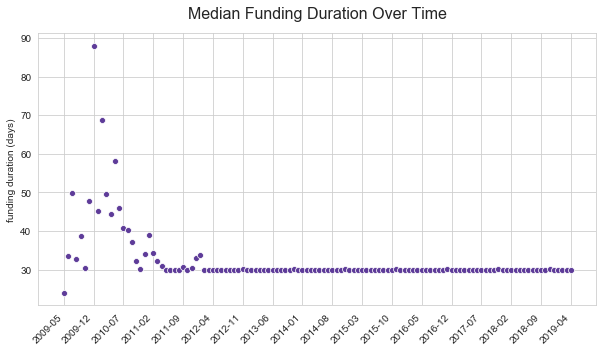

In [136]:
# calculate monthly median duration of completed projects
# total
duration_grouped = ks_compl.groupby([ks_compl.deadline.dt.year, 
                                    ks_compl.deadline.dt.month])['duration_days'].median().values
# success
duration_grouped_s = ks_compl_success.groupby([ks_compl_success.deadline.dt.year, 
                                    ks_compl_success.deadline.dt.month])['duration_days'].median().values
# failed
duration_grouped_f= ks_compl_failed.groupby([ks_compl_failed.deadline.dt.year, 
                                    ks_compl_failed.deadline.dt.month])['duration_days'].median().values
# insert 0 occurence for 2009-6
duration_grouped_f = np.insert(duration_grouped_f,1,0) 

# create dataframe
df_duration = pd.DataFrame(data={'total': duration_grouped, 
                                'success':duration_grouped_s, 
                                'failed': duration_grouped_f, 
                                'date': np.arange(0, len(duration_grouped), 1)})
# settings
plt.figure(figsize=[10,5])

# scatterplot of median duration over days
ax = sns.scatterplot(x=df_duration['date'], y=df_duration['total'], 
                     color='#5e3c99');

# ticks and labels
timeline_ticks(df_duration)
plt.ylabel("funding duration (days)")
plt.title("Median Funding Duration Over Time", fontsize=16, pad=15)
plt.xlabel("")

plt.show()

Obviously, there was not much discrepancy of the funding duration over time. Only in the first two years creators were experimenting with the length of funding durations. Two years after Kickstarter's launch, it became general practice to run the funding for 30 days. Nevertheless, it would make sense, that a longer period may result in improved chances of success, especially for founders who require high investments.

**Does a longer funding period increase the chances of success?** 

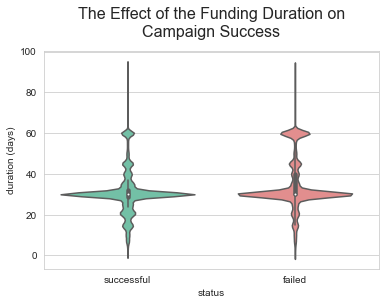

In [137]:
# settings
color=sns.set_palette(status_colors[1:])

# Use violinplots to depict duration converted days. Separate completed projects by status  
ax = sns.violinplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                    order=['successful', 'failed'], color = color)
# labels and titles
plt.title("The Effect of the Funding Duration on\nCampaign Success", fontsize=16, pad=15 )
plt.ylabel('duration (days)')

plt.show()

The above distribution of the duration of the funding shows that there is generally not a big difference between successful and failed campaigns. The median duration and most occurrences are around 30 days. For successful campaigns, the distribution below 30 days is a little wider than for failed campaigns. The distribution of failed campaigns reveals comparatively more occurrences in longer durations, especially around 60 days. Also, the inner quartiles and whiskers of failed campaigns seem to be skewed upward. Let's plot this boxplot separately next.

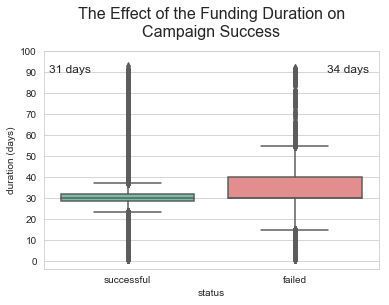

In [138]:
# Use violinplot to depict duration converted days. Separate completed projects by status
ax = sns.boxplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)

# calculate means
dur_mean_fail  = (ks_compl[ks_compl.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
dur_mean_success  = (ks_compl[ks_compl.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 

# annotate
ax.annotate(str(int(dur_mean_fail)) + " days", xy=(1.19, 90), fontsize=12)
ax.annotate(str(int(dur_mean_success)) + " days", xy=(-0.47, 90), fontsize=12)

# labels and titles
plt.title("The Effect of the Funding Duration on\nCampaign Success", fontsize=16, pad=15 )
plt.ylabel('duration (days)')
format_yticks(100, 10)
plt.show()

The box plot approach appears to be a better choice to answer if a longer funding period may increase success chances of campaigns. While the median funding of both, successful and failed campaigns, was 30 days, the mean of successful was 31 days, while failed campaigns ran 3 days longer. Particularly, the upper interquartile goes up to 40 days and the tail up to 55 days. While funding periods of successful campaigns above 38 days were a rarity.

However, we already found that creators seeking higher goals are less likely to succeed. Let's factor in goals to find out whether high goal projects have a better chance to succeed if they got more time to convince investors.

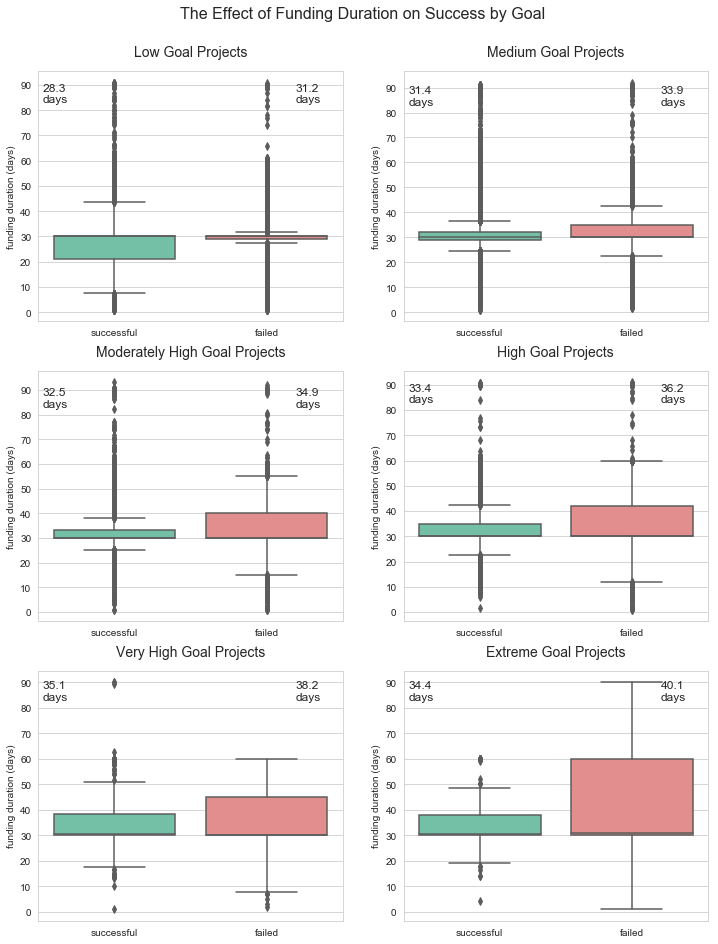

In [139]:
# settings
plt.figure(figsize=[12,10])

# facet plot by goals to depict the effect of duration on projects 
for i, df in enumerate(ks_goal_leveled):
    # faceted boxplots
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(df.status, (df.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)
    # calculate mean
    dur_mean_fail  = (df[df.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
    dur_mean_success  = (df[df.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 
    
    #annotate
    ax.annotate(str(round(dur_mean_fail, 1))+ "\ndays", xy=(1.19, 83), fontsize=12)
    ax.annotate(str(round(dur_mean_success, 1))+ "\ndays", xy=(-0.47, 83), fontsize=12)
    plt.title(texts[i]+" Goal Projects", fontsize=14, pad=15 )
    
    # labels and ticks
    plt.ylabel('funding duration (days)')
    plt.xlabel('')
    plt.subplots_adjust(bottom=-0.3)
    format_yticks(90, 10)
plt.suptitle("The Effect of Funding Duration on Success by Goal", fontsize=16, y=0.97)
plt.show()

Clearly, the funding duration changes according to the goal. The higher the goal, the longer is the mean funding duration. The most occurrences, however, stay around 30 days independently from the funding ambitions and result of the campaign.

No matter how high the funding goal, successful projects on average always scheduled lower funding periods.

The duration difference between projects seeking below USD {{goal_25}} and above USD {{format_num(goal_95)}} was surprisingly short. Successful Low goal projects on average sought funding in 28 days, while very high goal projects only take about a week longer: 35 days.

While the above boxplots give us a general notion about duration and success, I am curios if we find more meaningful information about success rates by each funding duration. Below, I'm going to choose a line plot approach by binning duration periods and calculating their success rates. To balance out the success differences caused by the scope of a goal, I'm going to divide the plot in projects with goals above and below their 75% quantile .  

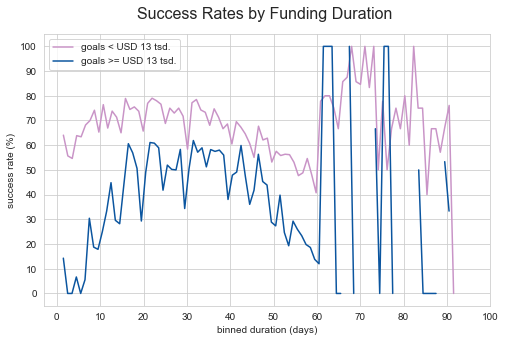

In [140]:
# settings
plt.figure(figsize=[8,5])

# utility to cluster duration
def binned_duration(df, bin_count):
    # cluster duration
    bin_size = (df['duration_days'].max()-df['duration_days'].min()) / bin_count
    bin_edges = np.arange(df['duration_days'].min(), df['duration_days'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['duration_bin'] = pd.cut(df['duration_days'], bin_edges, labels=bin_centers)
    return df

# calculate success rate for every bin and plot
def plot_success_r(df_binned):
    # calculate success rate for every bin
    success_r = (df_binned[df_binned.status == 'successful']['duration_bin'].value_counts(sort=False)\
                 / df_binned['duration_bin'].value_counts(sort=False)*100).values
    plt.errorbar(x = df_binned['duration_bin'].value_counts(sort=False).index, 
                 y = success_r, color=sns.set_palette([pledged_color, goal_color]))

# plot low to moderately high goals
df_duration_binned = binned_duration(ks_compl[ks_compl.goal_hist_usd < goal_75], 90)
plot_success_r(df_duration_binned)

# plot rate above moderately high goals
df_duration_binned = binned_duration(ks_compl[ks_compl.goal_hist_usd >= goal_75], 90)
plot_success_r(df_duration_binned)

# ticks and labels
plt.title("Success Rates by Funding Duration ", fontsize=16, pad=15)
plt.xticks(np.arange(0, 100+1, 10))
plt.xlabel("binned duration (days)")
plt.yticks(np.arange(0, 100+1, 10))
plt.ylabel("success rate (%)")
plt.legend(['goals < USD 13 tsd.', 'goals >= USD 13 tsd.'])
plt.show()

### Summary Duration

We cannot affirm that a higher funding duration is generally rewarded with higher success rates. No matter if a campaign was successful or failed, the median period was generally 30 days. We found the success rates generally peak plus/minus a period of 30 days.  

Adding the level of the goal to our investigation shows, that average funding durations appear to be a little longer when the goals were higher. Successful low goals under USD {{format_num(goal_25)}} had a mean funding duration of 28 days. Successful very high goal projects between USD {{format_num(goal_75)}} to {{format_num(goal_95)}} on average ran a week longer (35 days). 

We found that the highest and most constant success chances were between 15 to 35 days for projects below USD {{format_num(goal_75)}}. We know that success chances are generally lower for higher goals. Nevertheless, we observe that creators of higher goal projects can extend their funding duration up to 48 days without loosing significant success chances. 

There is a severe dent at the duration of 30 days. Despite using relative numbers, this may be attributed to the unequivocal popularity of 30 day periods. This assumption is supported by the regular recessions that appear in duration intervals of 5 (e.g. 15, 20, 25 periods). Those periods appear to be most common. It may be worth to further investigate whether creators can increase their success chances by shortening or prolonging the 30 days period by roughly 1-2 days. However, this would go beyond this visual analysis.

60 days funding durations were also quite popular. Unfortunately, they are attributed with the lowest failure rates, especially for higher goal projects. Interestingly, after the benchmark of 60 days, success rates increase up to roughly 90-100%. But mind that the project counts with long funding durations are very uncommon: only 24 projects had a funding duration of 70 days.

## Seasons

Throughout this investigation, we again and again came across seasonal fluctuations. The plot below highlights the differences in absolute project counts throughout the past years 2014 - 2019. 

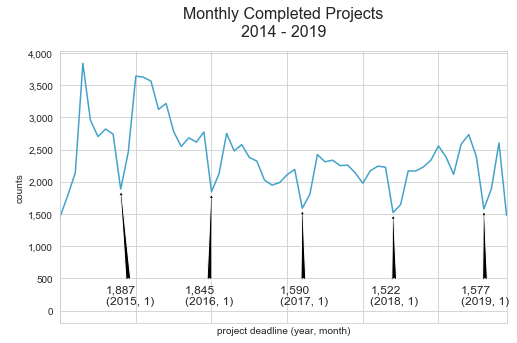

In [141]:
# settings
plt.figure(figsize=[8,5])

# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()

# line plot of project counts
ax = df.plot(color=cust_blue)

#zoom into year 
plt.xlim(60, 119)

# find minima
ymins = [df.xs(year).values.min() for year in range (2014, 2020)]
xmins = [df.iloc[df.values == ymin].index[0] for ymin in ymins]

# annotate minima
ax.annotate(format_num(ymins[0]) + "\n" + str(xmins[0]), xy=(56, ymins[0]), 
            xytext=(53,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[1]) + "\n" + str(xmins[1]), xy=(68, ymins[1]-10), 
            xytext=(66,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[2]) + "\n" + str(xmins[2]), xy=(80, ymins[2]-10), 
            xytext=(76.5,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[3]) + "\n" + str(xmins[3]), xy=(92, ymins[3]-10), 
            xytext=(89,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[4]) + "\n" + str(xmins[4]), xy=(104, ymins[4]-10), 
            xytext=(101,100),  fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# In the year 2019, we found April to be the minima. Since, I want to depict the January low, i have to pick January manually. 
ax.annotate(format_num(df.xs(2019).values[0]) + "\n(2019, 1)", xy=(116, df.xs(2019).values[0]-10), 
            xytext=(113,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# labels and titles
plt.title("Monthly Completed Projects\n2014 - 2019", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

# turn off ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

format_yticks(4000, 500)
plt.ylabel("counts")

plt.show()

The project counts dropped dramatically, every year in January by roughly 500 campaigns. This may be caused by the behavior of project creators by not running campaigns or creating campaigns which do not appeal to the audience. On the other hand potential supporters may also be less willing to pledge. 

As we have seen before, the success of a campaign can be judged by successfully ending a campaign and by the actual collected funding. I'm going to start the analysis of seasonal effects by investigating success and failure rates. Then, I'm going into detail about the general user behavior throughout the year to find out if seasonal changes affect the final amount collected.

With project numbers stabilizing by the end of 2014, I'm going to consider for the following analysis only values after 2015.

**What time of a year is related with the best chances of success?**

In [142]:
# Investigate failure and success rates on a monthly bases

# only consider data after 2015 to today - April 2019
ks_15_19  = ks_compl[ks_compl.deadline.dt.year > 2014 ] 

# count projects ending each month
counts =  ks_15_19.deadline.groupby([ks_15_19.deadline.dt.month]).count()

# get average by dividing Jan-Apr months by 5 other months by 4 
proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# calculate average monthly project counts of successful and failed projects 
df_success_15  = ks_15_19[ks_15_19.status == "successful"]
counts =  df_success_15.deadline.groupby([df_success_15.deadline.dt.month]).count()
success_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

df_fail_15  = ks_15_19[ks_15_19.status == "failed"]
counts =  df_fail_15.deadline.groupby([df_fail_15.deadline.dt.month]).count()
failed_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# create combined dataframe
ks_months = pd.DataFrame({'avg_total': proj_counts, 'avg_success': success_proj_counts, 'avg_failed': failed_proj_counts})

# As the interesting behavior is happening in January, I want to shift January to the middle of the plot.
# Rearange ordering so that July is at the frst place
ks_months_sorted = ks_months[6:].append(ks_months[:6]).reset_index(drop=True)
ks_months_sorted.head()

avg_total  avg_success  avg_failed
0 2,589.0    1,329.5      1,259.5    
1 2,333.0    1,202.25     1,130.75   
2 2,148.0    1,092.5      1,055.5    
3 2,357.25   1,269.0      1,088.25   
4 2,426.0    1,357.0      1,069.0

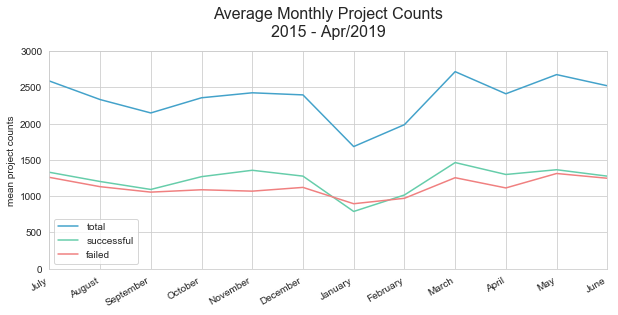

In [143]:
# plot
ax = ks_months_sorted.plot(color=sns.set_palette(status_colors));

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# ticks and labels
xlocs = np.arange(0,12)
plt.xticks(xlocs, months, rotation=30, ha='right');

ylocs = np.arange(0, 3000+500, 500)
ylabels = [format_num(yloc) for yloc in ylocs]
ax.set_yticks(ylocs, ylabels)

plt.ylabel("mean project counts");
plt.title("Average Monthly Project Counts\n2015 - Apr/2019", fontsize=16, pad=15)

plt.legend(['total', 'successful', 'failed'], loc=3)
plt.show()

In terms of absolute counts by month, successful campaigns dropped below the number of failed campaigns only in January. Also in September project counts dropped remarkably. Yet, in contrast to January, successful and failed campaigns uniformly decreased. 

In March, we find the highest mean of successful campaigns. November, October, December and May were also popular months to launch projects. March and November seem to be have the widest gap between successful an failed campaigns. To proof this, we are going to calculate the proportion of successful and failed campaigns to the total of all campaigns. 

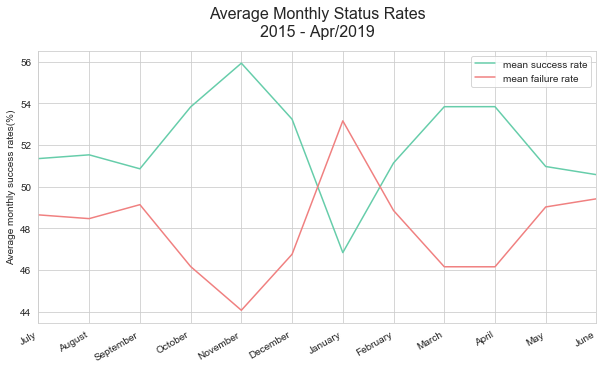

In [144]:
# create new columns of avg monthly avg success and failure rates 
ks_months_sorted['success_r'] = [ks_months_sorted.iloc[i][1] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]
ks_months_sorted['failure_r'] = [ks_months_sorted.iloc[i][2] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]

# plot
ax = ks_months_sorted[['success_r', 'failure_r']].plot(color=sns.set_palette(status_colors[1:]))

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 5);

plt.xticks(xlocs, months, rotation=30, ha='right');

plt.ylabel("Average monthly success rates(%)");
plt.title("Average Monthly Status Rates\n2015 - Apr/2019", fontsize=16, pad=15);
plt.legend(['mean success rate', 'mean failure rate'])
plt.show();

The plot above proofs that November was attributed with the best chances of success leaving all other features constant. 56% of campaigns ended in success. April and March followed with success rates around 54%. 

January was definitely the worst month to launch a campaign. On average, more than every second campaign failed (53%). September, February, May, June and July were not the best months to end a campaign, but the success chances were still above 50% on average.

In addition to the chances of success, a campaign creator's main goal is to seek the highest amount possible to start their venture. Next, we are going to determine whether the amount of investments creators collected changed according to seasons.

**Are supporters more likely to pledge in a certain time of a year?**

In [145]:
# we are going to work with our 95-quantile data to allow reasonable interpretation

# select only projects from 2015 on
ks_compl_95_latest  = ks_compl_95[ks_compl_95.deadline.dt.year > 2014 ]
ks_compl_95_latest_s  = ks_compl_95_latest[ks_compl_95_latest.status == "successful"]
ks_compl_95_latest_f  = ks_compl_95_latest[ks_compl_95_latest.status == "failed"]
print(f"After 2014:\n\
Project count total: {format_num(len(ks_compl_95_latest))}\n\
Project count success: {format_num(len(ks_compl_95_latest_s))}\n\
Project count failed: {format_num(len(ks_compl_95_latest_f))}")

After 2014:
Project count total: 107,570
Project count success: 55,224
Project count failed: 52,346


In [146]:
# utility function to create a median values of specific features grouped by months
def group_data(df, feature):
    # select by successful and failed projects
    df_s  = df[df.status == "successful"]
    df_f  = df[df.status == "failed"]
    
    # Due to strong skew, I use median instead of average to calculate the number of backers
    feat_total = df[feature].groupby([df.deadline.dt.month]).median()
    feat_success = df_s[feature].groupby([df_s.deadline.dt.month]).median()
    feat_fail = df_f[feature].groupby([df_f.deadline.dt.month]).median()

    # create data frame
    df_months_95 = pd.DataFrame({'total': feat_total.values, 
                                 'successful': feat_success.values, 
                                 'failed': feat_fail.values})

    # change order of data, bring January to center position
    return df_months_95[6:].append(df_months_95[:6]).reset_index(drop=True)

# utility function to plot features grouped by months
def plot_monthly(df):
    # color settings
    cust_color = ['green', 'black', 'red']

    # plot
    ax = df[['successful', 'total', 'failed']].plot(color=sns.set_palette(cust_color))

    # highlight differences
    x_ticks = np.arange(0, len(ks_months_95_sorted))
    y1 = df['successful']
    y2 = df['total']
    y3 = df['failed']
    ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
    ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)

    # figure settings
    fig = plt.gcf();
    fig.set_size_inches(8, 5);

    # ticks and labels
    plt.xticks(xlocs, months, rotation=30, ha='right');
    
    return ax

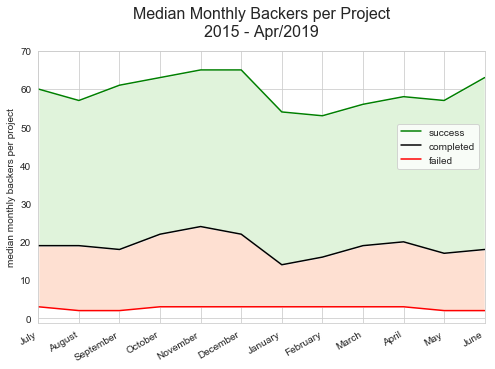

In [147]:
# plot median backers counts per projects for each month 
ks_months_95_sorted = group_data(ks_compl_95_latest, 'backers_count')
ax = plot_monthly(ks_months_95_sorted)

# ticks and labels
plt.yticks(np.arange(0, 70+10, 10))
plt.ylabel("median monthly backers per project");
plt.title("Median Monthly Backers per Project\n2015 - Apr/2019", fontsize=16, pad=15);
plt.legend(["success", "completed", "failed" ], loc=1,  bbox_to_anchor=(0.999, 0.75))
plt.show();

To start from, we plotted the relative amount of backers per completed project, grouped by months. The median amount of backers peaked in November for all completed projects. Only considering successful projects results in November, December and June as the best month. The lowest number of supporters per project were commonly in February and January.  

Unlike success rates, we don't find strong peaks in March/April, but in June/July. Also, having the strongest recession of backers in February, doesn't fully explain increasing success rates in February. 

Insofar the success of projects is further determined by the amount every individual supporter invests and by the amount a creator seeks for funding. 

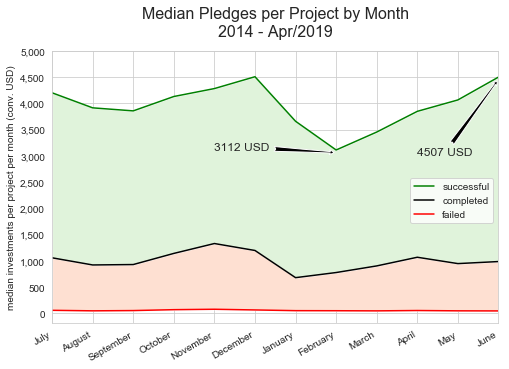

In [148]:
# plot median amount pledged per project by month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'pledged_hist_usd')
ax = plot_monthly(ks_months_95_sorted)

# annotate
# maximum success
max_success = int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
format_yticks(5000, 500)
plt.ylabel("median investments per project per month (conv. USD)");
plt.title("Median Pledges per Project by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed" ], loc=1,  bbox_to_anchor=(1, 0.55))
plt.show();

The amount pledged per project seems to be lagging by one month compared to success rates. On average, creators collected the lowest amount of funding in February (USD 3,112), whereas the success rates were lowest in January. 

The highest median investments were collected in June: USD 4,507. Creators who ran a campaign ending in June on average collected {{round((4507-3112) / 3112 * 100)}} % more compared to February. In absolute numbers, this is USD 1,400. At the same time, chances of success in June were comparatively low. 

December was the second best month to collect high funding. Again, pledges are lagging behind success rates, which peaked November. 

Whereas March had quite high success rates, the collected funding was even lower than in January. 

Considering both, success rates and the total investment collected, we see most potential in the months October/November/December. On the other hand, January, February and September performed worst.

Absolute counts, success rates, pledges and backers show similarities, but their behavior does not fully coincide. Therefore, we suspect multiple features to influence seasonal fluctuations.

One assumption is that an individual backer's willingness to pledge changes over the year. Let's plot the median pledged per backer for each project.

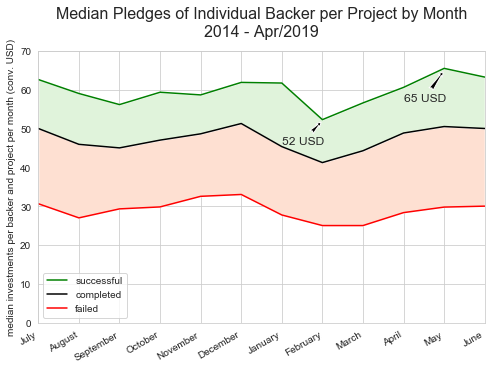

In [149]:
# Investigate pledges per backer and project per each month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'pledged_backer_r')
ax = plot_monthly(ks_months_95_sorted)

# annotate
# maximum success
max_success = int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(10 , max_success), 
            xytext=(9, max_success-8), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success), 
            xytext=(6, min_success-6), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
ylocs = np.arange(0, 70+10, 10)
ylabels = [format_num(yloc) for yloc in ylocs] 
plt.yticks(ylocs, ylabels)
plt.ylabel("median investments per backer and project per month (conv. USD)");

plt.title("Median Pledges of Individual Backer per Project by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed"])
plt.show();

Individual supporters tended to back the highest amounts per project in May and the lowest amounts in February. The difference between both months was USD 13 per pledge. In September the individual median pledges were also quite low. 

Roughly the best times to seek high amounts per supporter were April-July and October-January. Since success rates and median pledged per project were low in January, the willingness to pledge high at the beginning of the year comes with a surprise. 

One explanation: how ambitious creators define their goals according to the time of the year. As we have seen before, the goal can have an impact on success rates and the final collected funding.

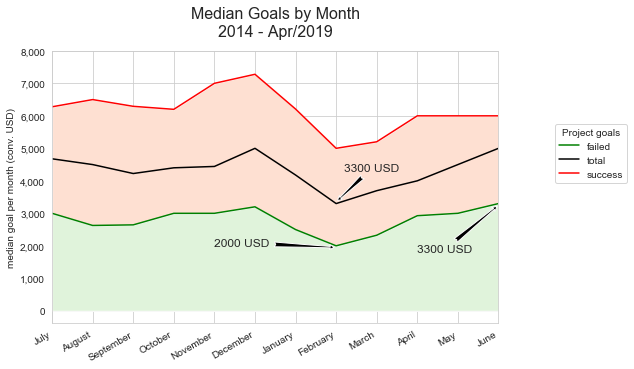

In [150]:
# Investigate goals per project each month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'goal_hist_usd')
ax = plot_monthly(ks_months_95_sorted)

# highly differences
y1 = ks_months_95_sorted['failed']
y2 = ks_months_95_sorted['total']
y3 = ks_months_95_sorted['successful']
ax.fill_between(xlocs, y1, y3 , where=y1 >= y3, facecolor=fill_red, interpolate=True)
ax.fill_between(xlocs, y3 , where=y3 >= xlocs, facecolor=fill_green, interpolate=True)

# annotate
# minimum total
min_total = int(ks_months_95_sorted.total.values.min())
ax.annotate(str(min_total) + " USD", fontsize=12, xy=(7 ,min_total + 50), 
            xytext=(7.2, min_total+1000), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# maximum success
max_success =int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
format_yticks(8000,1000)
plt.ylabel("median goal per month (conv. USD)");
plt.title("Median Goals by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Project goals", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

The graph shows that pessimistic project goals were more successful across the entire year. There is a significant dent of median project goals in February down to USD 2,000. In February low-goal-projects seem to be more common. 

The most ambitious successful goal projects are typically ending in June/July and December. 

The above plots demonstrate that the success rates and user behavior changes according to the season of a year. We found some commonalities, but also contradicting behavior. To keep it neatly arranged, let's put it all in one plot. 

In [1]:
# bring them all in one plot
fig, ax = plt.subplots(5, 1, sharex=True)

# plot success rates
ax[0].plot(xlocs, ks_months_sorted['success_r'], color='black')

# data
features = ['pledged_hist_usd', 'goal_hist_usd', 'backers_count', 'pledged_backer_r']

# plot features
for i, feature in enumerate(features):
    ks_months_95_sorted = group_data(ks_compl_95_latest, feature)
    ax[i+1].plot(xlocs, ks_months_95_sorted['successful'], color='black', label="successful projects")
    plt.subplots_adjust(bottom=-0.2)
    
# highlight best months
# success rates: highlight positively Oct-Dec and March/April
ax[0].axvspan(3, 5,color=cust_green, alpha=0.5, label="best chances")
ax[0].axvspan(8, 9, color=cust_green, alpha=0.5)

# pledged_hist_usd: highlight positively May, June, July and Oct-Dec
ax[1].axvspan(3, 5,  color=cust_green, alpha=0.5)
ax[1].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[1].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)

# goal_hist_usd: highlight positively Apr-July and Oct-Dec
ax[2].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[2].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)  
ax[2].axvspan(3, 5, color=cust_green, alpha=0.5)

# backers counts: highlight positively June/July and Sept-Dec   
ax[3].axvspan(10.7, 11.3,  color=cust_green, alpha=0.5)
ax[3].axvspan(2, 5, color=cust_green, alpha=0.5)

# pledged per backer: highlight positively Apr-July and Dec/Jan
ax[4].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[4].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)  
ax[4].axvspan(5, 6, color=cust_green, alpha=0.5)

# highlight worst months
ax[0].axvspan(5.7, 6.3,  color=cust_red, alpha=0.5, label="worst chances")  # success rates - January
ax[1].axvspan(6, 8, color=cust_red, alpha=0.5) # pledged hist usd - Jan-Mar
ax[2].axvspan(6, 8, color=cust_red, alpha=0.5) # goals hist usd - Jan-Mar
ax[3].axvspan(6, 8, color=cust_red, alpha=0.5) # backers count - Jan-Mar
ax[4].axvspan(7, 8, color=cust_red, alpha=0.5) # pledged per backer - Feb-Mar

# figure size
fig.set_size_inches(8, 6);

# ticks and labels
fig.text(0.03, 0.8, "success rate (%)", va='center', rotation='vertical')
fig.text(0.03, 0.45, "median funding (conv. USD)", va='center', rotation='vertical')
fig.text(0.03, 0.1, "median backers\n      count", va='center', rotation='vertical')
fig.text(0.03, -0.1, "median pledged\n  (conv. USD)", va='center', rotation='vertical')

fig.suptitle('Monthly Funding Behavior\n2014 - Apr/2019', y=1.05, fontsize=16 )
ax[0].set_title('Success Rates', fontsize=12)
ax[1].set_title('Median Investment per Project', pad=4, fontsize=12)
ax[2].set_title('Median Goals', pad=4, fontsize=12)
ax[3].set_title('Median Backers per Project', pad=4, fontsize=12)
ax[4].set_title('Median Investment per Backer', pad=4, fontsize=12)
plt.suptitle("Seasonal Highlights of Funding Opportunities", fontsize=16)

plt.xticks(xlocs, months, rotation=30, ha='right');
plt.legend(["successful projects", "best chances", "worst chances"], loc=1,  bbox_to_anchor=(1.3, 5.7)).legendHandles[2].set_color(cust_red)

plt.show()


NameError: name 'plt' is not defined

### Summary Seasons

We do find seasonal changes of success rates and the collected funding throughout a year. It's advisable for creators to carefully choose the month in which they plan to end a campaign. By optimizing the season, creators may be able to increase success chances or collect a higher amount of investments.

Above, we highlighted the months of best and worst chances across a year. We separated successful campaigns by features that may determine a campaign's success. We can differentiate a campaign's success in general success chances, number of backers and the amount of funding collected, e.g. goals, total investment and the individual amount pledged per backer. 

Generally, we found an overlap of best chances in December. Ignoring some inconsistencies, we found October to December and April to July as the most promising months to run a campaign. January to March performed suboptimal. However, the best month for a creator may depend on the individual goals. Some creators may prefer the best possible success chances, while others prefer to increase their reach by addressing a maximum of possible backers or collect the maximum possible funding.

Generally, we notice that success rates behaved slightly different from features that were related to the amount of funding collected. The success chances were best from October to January and March and April. November was the safest bet for every creators whose primary goal was to end a campaign successfully. Those creators should avoid to run a campaign in January since success rates were roughly 10% lower. 

Creators who seek high funding had the best chances in December or June. They should avoid launching in January to March.

If the focus was to attract a maximum amount of backers, a creator's best chances were in November and December. In contrast, January to March were not advisable to seek a maximum of backers.

## Featured

Kickstarter has the tools to actively support a project by rewarding a badge or introducing a project on their landing page or other digital channels. The support offered by Kickstarter may affect a campaign's success by increasing success chances or increasing the total of the collected investment.

**Does Kickstarter's promotional support increase the chances of a campaign's success?**  

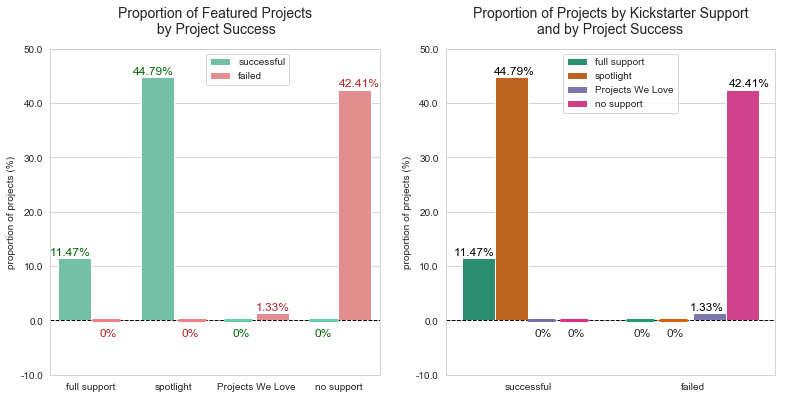

In [152]:
# relative values
# settings
plt.figure(figsize = [13, 6])
# cust_color = [cust_green, cust_red]
color=sns.set_palette(status_colors[1:])
dark_colors = ['#7570b3', '#e7298a', '#1b9e77', '#d95f02']

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# get proportion of most common group - successful projects
# - relative values
n_points = ks_compl.shape[0]
max_feat = ks_compl['featured'].value_counts().max()
max_feat_prop = max_feat / n_points
max_status = ks_compl['status'].value_counts().max()
max_status_prop = max_status / n_points

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)

# add zero line
ax1 = plt.gca()
ax1.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate percentages and add empty categories
i = -0.5
xmin=0.13
k=-0.1
annot_color = ['darkgreen', 'darkgreen', 'firebrick', 'firebrick']
bar_color = [ cust_green, cust_green, cust_red, cust_red]
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.5
        color_i = 'firebrick'
        xmin -= 0.12
        k = 0.29
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color=annot_color[j])
    ax1.axhline(linewidth=3, color=bar_color[::-1][j], y=0.1, xmin=xmin, xmax=xmin+0.08)
    plt.text(j-k, -5000, "0%", fontsize=12, color=annot_color[::-1][j])
    xmin+=0.26
    i+=1

#label and title
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Proportion of Featured Projects\n by Project Success", fontsize=14, pad=15)
plt.xlabel("")

# generate proportion tick marks
ylocs = np.arange(-0.1, 0.5+0.1, 0.1)
ylabels = ['{:0.1f}'.format(yloc*100) for yloc in ylocs]
plt.yticks(ylocs * n_points,ylabels )
plt.ylabel("proportion of projects (%)")

# right plot: clustered bar chart status counts categories related to Kickstarter support
# - relative values
plt.subplot(1, 2, 2)
color=sns.set_palette(sns.color_palette("Dark2"))
sns.countplot(data = ks_compl, x = 'status', hue = 'featured',
             order = status_order, hue_order = feat_order, color=color)

# add zero line
ax2 = plt.gca()
ax2.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate rates
i = -0.45
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.95
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color="black")
    i+=0.24
    
# add empty categories
xmin= 0.25
pos = 0.04
for i,c in enumerate(dark_colors):
    if i == 2:
        xmin += 0.1
        pos+=0.2
    ax2.axhline(linewidth=3, y=0.1, xmin=xmin, xmax=xmin+0.08, color=dark_colors[i])
    ax2.annotate("0%", fontsize=12, xy=(pos ,-5000))
    xmin +=0.1
    pos+=0.2
    
# generate proportion tick marks
ylocs = np.arange(-0.1, 0.5+0.1, 0.1)
ylabels = ['{:0.1f}'.format(yloc*100) for yloc in ylocs]
plt.yticks(ylocs * n_points,ylabels )
plt.ylabel("proportion of projects (%)")
plt.title("Proportion of Projects by Kickstarter Support\nand by Project Success", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")    

plt.show()

According to our data the support offered by Kickstarter is extremely relevant to win a campaign. Only projects that were supported by Kickstarter were successful. 44% of projects were spotlighted on Kickstarter's channels and 13% of completed projects got full support. Fully unsupported projects or projects only receiving a Projects We Love badge did not succeed. 

Since fully supported projects were awarded the badge in addition to being spotlighted by Kickstarter, we wonder if the badge affected the chances of a higher funding.

**Does Kickstarter's "Projects We Love" badge increase the chances of a higher funding?**


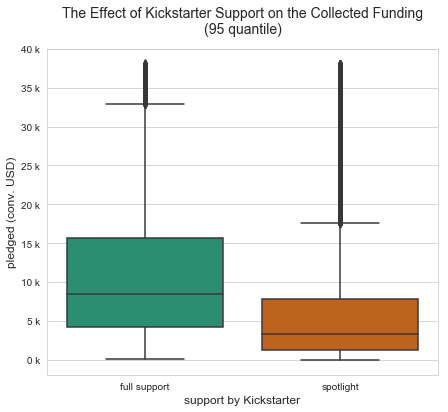

In [153]:
# settings
plt.figure(figsize = [7, 6])

# violinplot of 95 quantile data to reduce strong skew caused by outliers 
ax = sns.boxplot(data = ks_compl_95_latest, x = 'featured', y = 'pledged_hist_usd', order=feat_order[:2])

# ticks and labels
ylocs = np.arange(0, pledged_95+5000, 5000)
ylabels = [str(int(yloc/1000)) + " k" for yloc in ylocs]
plt.yticks(ylocs, ylabels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("pledged (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on the Collected Funding\n(95 quantile)", fontsize=14, pad=15)
plt.show()

The "Projects We Love" badge clearly helped to increase the collected funding of successful campaigns. The median of campaigns that were only spotlighted was USD {{format_num(ks_compl_95_latest[ks_compl_95_latest.featured == "spotlight"]['pledged_hist_usd'].median())}}, whereas campaigns which were awarded the badge sought USD {{format_num(ks_compl_95_latest[ks_compl_95_latest.featured == "full support"]['pledged_hist_usd'].median())}}. This enhanced the median pledged funding by {{ format_num((ks_compl_95_latest[ks_compl_95_latest.featured == "full support"]['pledged_hist_usd'].median()/ ks_compl_95_latest[ks_compl_95_latest.featured == "spotlight"]['pledged_hist_usd'].median())*100)}}%. 

Not only the median pledges appear to be higher. We notice that the entire interquartile range and the upper whisker increased by a factor of 2.

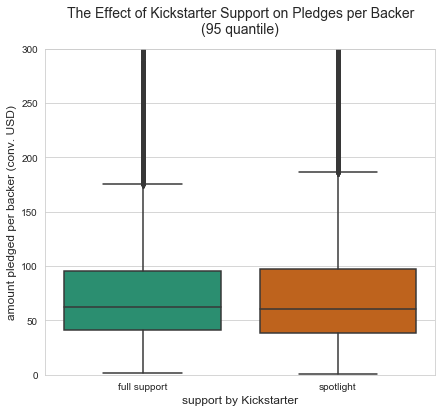

In [154]:
# settings
plt.figure(figsize = [7, 6])

# violinplot 95 quantile data
ax = sns.boxplot(data = ks_compl_95, x = 'featured', y = 'pledged_backer_r', order=feat_order[:2])

# ticks and labels
plt.ylim(0,300)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("amount pledged per backer (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on Pledges per Backer\n(95 quantile)", fontsize=14, pad=15)
plt.show()

Interestingly, the "Projects We Love" badge didn't influence the decision how much each backer was willing to pledge. Only the total amount of pledges was affected. Consequently, a higher number of supporters must have been attracted by the award. 

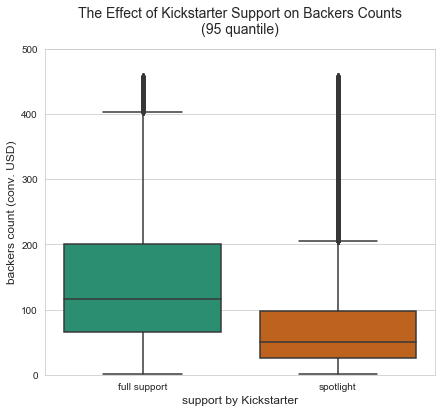

In [155]:
# settings
plt.figure(figsize = [7, 6])

# violinplot 95 quantile data
ax = sns.boxplot(data = ks_compl_95, x = 'featured', y = 'backers_count', order=feat_order[:2])

# ticks and labels
plt.ylim(0,500)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("backers count (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on Backers Counts\n(95 quantile)", fontsize=14, pad=15)
plt.show()

The above plot confirms that the being awarded "Projects We Love" in addition to being spotlighted drives the number of investors. Whereas the median number of supporters of spotlighted projects was {{format_num(ks_compl_95[ks_compl_95.featured == "spotlight"]['backers_count'].median())}}, fully supported campaigns convinced a medium of   {{format_num(ks_compl_95[ks_compl_95.featured == "full support"]['backers_count'].median())}} supporters. Beyond the median in the boxplot, we can clearly see that backers counts doubled for the upper 50% of backers counts.  

As a result of the strong effect of Kickstarter support on success rates, the number of investors and the total collected funding, it is important to understand what kind of projects Kickstarter is most likely to support.

**Does the funding goal affect Kickstarter's decision to support a campaign?** 

As we want to eliminate trends affecting our data, we are going to analyze data since the year 2015.

In [156]:
# descriptive statistics of support groups
ks_15_19.groupby(['featured'])['goal_hist_usd'].describe().transpose()

featured    Projects We Love        full support           no support  \
count    1,434.0             12,514.0            56,866.0               
mean     43,894.17103782157  20,642.67899911596  89,101.89153283343     
std      273,264.93170757865 47,470.0902647797   1,775,054.1115880678   
min      100.0               1.0                 1.0                    
25%      6,500.0             3,981.4310816496927 2,500.0                
50%      16,421.750000217984 10,000.0            7,588.99732493225      
75%      38,886.141396498875 22,436.989070256997 25,000.0               
max      10,000,000.0        2,000,000.0         150,099,318.94817606   

featured           spotlight  
count    50,989.0             
mean     6,529.338801579197   
std      12,033.558260898679  
min      0.7110381409261841   
25%      800.0                
50%      2,800.0              
75%      7,500.0              
max      347,000.0

The above statistics show that goals above 2 mi. had no chance to be supported and raise the funding successfully.

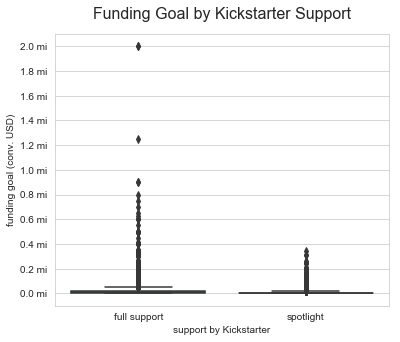

In [157]:
# settings
plt.figure(figsize = [6, 5])

# boxplot of goals, clustered by featured 
ax = sns.boxplot(data = ks_15_19, x = 'featured', y = 'goal_hist_usd', order=feat_order[:2])

y_ticks = np.arange(0, 2000000+20000, 200000)
y_labels = [str(y_tick / 1000000) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter")
plt.ylabel("funding goal (conv. USD)")
plt.title("Funding Goal by Kickstarter Support", fontsize=16, pad=15)
plt.show()

Apparently, Kickstarter tended to promote projects with full support if the funding goal was ambitious. The highest goal of full support was USD 2 mi., whereas spotlighted projects reached a maximum goal of USD 347 tsd. Because of the strong skew of goals, we basically only see the outliers of above boxplots. Let's examine more realistic goals en detail.

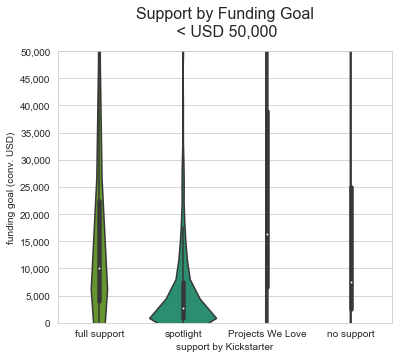

In [158]:
# settings
plt.figure(figsize = [6, 5])

# change to violinplot to emphasize the distribution 
ax = sns.violinplot(data = ks_15_19, x = 'featured', y = 'goal_hist_usd', 
                 order=feat_order, palette = success_colors)
plt.ylim(0, 50000) # zoom in to goals under USD 50000, 

# ticks and labels
format_yticks(50000,5000)
plt.ylabel("funding goal (conv. USD)")
plt.xlabel("support by Kickstarter")
plt.title("Support by Funding Goal\n < USD 50,000", fontsize=16, pad=15)

plt.show()

The violin plots demonstrate that projects which were fully supported or spotlighted generally had lower goals than projects without support or which got only the badge. 

Again, it is obvious that Kickstarter tends to reward full support for projects seeking higher funding compared to projects which were spotlighted. The interquartile range of fully supported projects and the upper tail is longer than the features of spotlighted projects. Fully supported projects realized a median goal of USD {{format_num(ks_15_19[ks_15_19.featured == "full support"]['goal_hist_usd'].median())}}, whereas spotlighted projects only aimed for a goal of USD {{format_num(ks_15_19[ks_15_19.featured == "spotlight"]['goal_hist_usd'].median())}}.

While the Kickstarter team tends to support projects with lower goals, they also encourage projects of high, but reasonable funding. In contrast to the successful projects, the violin plots of goals of no support-projects and Projects We Love-projects are extremely lengthy. 

If the goal would have been the only determination, we would have expected a wider distribution toward high goals. As this is not the case, we may assume additional factors to determine whether Kickstarter supports a project. 

**Does the project type affect Kickstarter's decision to support a campaign?**  

I'm going to analyze whether there were categories that were more likely chosen for support than others. To start with, I'm going to calculate the chances of being supported given that a category was chosen.

In [159]:
# utility to calculate success chances by category

def calc_support_chance(category):
    # summarize project counts per category into a matrix
    cat_counts = ks_15_19.groupby(['featured', category]).size()
    cat_counts = cat_counts.reset_index(name = 'count')
    cat_counts = cat_counts.pivot(index = category, 
                                columns = 'featured', 
                                values = 'count').reset_index()
    # fill zero counts
    cat_counts.fillna(0, inplace=True) 
    
    # add column to sum up project counts by category
    cat_counts['cat_count'] = ks_15_19.groupby([category]).project_id.count().values
    
    # calculate the proportion of each category of all projects and add to datafarme
    cat_counts['cat_prop'] = cat_counts['cat_count'] / (cat_counts['cat_count'].sum())

    # calculate the proportion to be selected for support out of all completed projects        
    cat_r = cat_counts.copy()
    for col in ['full support', 'spotlight', 'Projects We Love', 'no support']:
        cat_r[col] = cat_r[col] / (cat_r['cat_count'].sum())
    
    # according to the rules of conditional probability, 
    # calculate the probability to be featured given the chances that a category was selected  
    for col in ['full support', 'spotlight', 'Projects We Love', 'no support']:
        cat_r[col] = (cat_r[col] / cat_counts['cat_prop'])*100    
    
    # add up failed proportion and the successfull proportion
    cat_r['featured_successful'] = round(cat_r['full support'] + cat_r['spotlight'], 4) 
    cat_r['featured_failed'] = round(cat_r['Projects We Love'] + cat_r['no support'], 4)                    

    cat_r.sort_values(by=['featured_successful', 'full support'], ascending=True, inplace=True)
    cat_r.reset_index(drop=True, inplace=True)
    return cat_r

In [160]:
# utility to plot stacked bars for categorical success rates by category 

def plot_support_by_cat(cat_rates, cat_type):
    baselines = np.zeros(len(cat_rates)) # initital baseline
    artists = [] # for storing references to plot elements
    cat_order = cat_rates[cat_type].values
    
    # horizontally plot relative full support 
    for feature in ['full support','spotlight', 'featured_failed']:
        bars = plt.barh(y = np.arange(len(cat_order)), width = cat_rates[feature],
                        left = baselines, color=sns.set_palette(['seagreen', 'darkseagreen', cust_red]))
        artists.append(bars)
        # add values of full support to baseline
        baselines += cat_rates[feature].values
        
    # labels and ticks
    plt.yticks(np.arange(len(cat_order)), cat_order)
    plt.xticks(np.arange(0, 100+10, 10))
    plt.legend(artists, ['full support', 'spotlight', 'no support or badge'], 
               framealpha = 1, bbox_to_anchor = (1, 0.85), loc = 6);

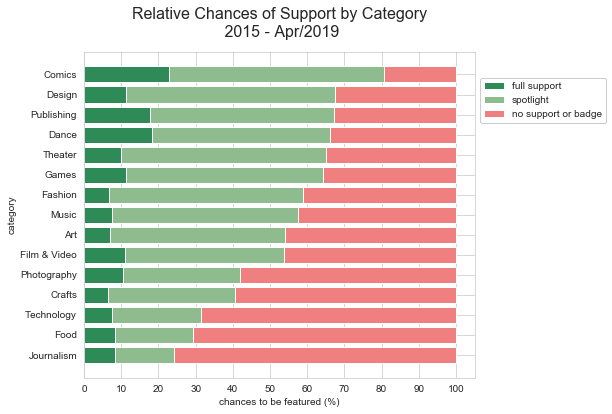

In [161]:
# settings
plt.figure(figsize = [7, 6])

cat_r = calc_support_chance("category")

# plot categories
plot_support_by_cat(cat_r, 'category')

# labels and ticks
plt.title("Relative Chances of Support by Category\n 2015 - Apr/2019", fontsize=16, pad=15);
plt.ylabel("category")
plt.xlabel("chances to be featured (%)")

plt.show()

Comics were the most likely to be supported, followed by Design and Publishing. Comics, Publishing and and Dance projects had the best chances to be fully supported. 

Creators who aim for project support in Technology, Food and Journalism had the lowest chances to receive full support or to be spotlighted.

Because of all projects receiving full support or spotlighting succeeding, the green area coincides with success chances within a category. Simultaneously, the red area stands for failed projects since all projects without support or only being rewarded the badge have failed.  

Let's dig into subcategories next by evaluating _comb cat_.

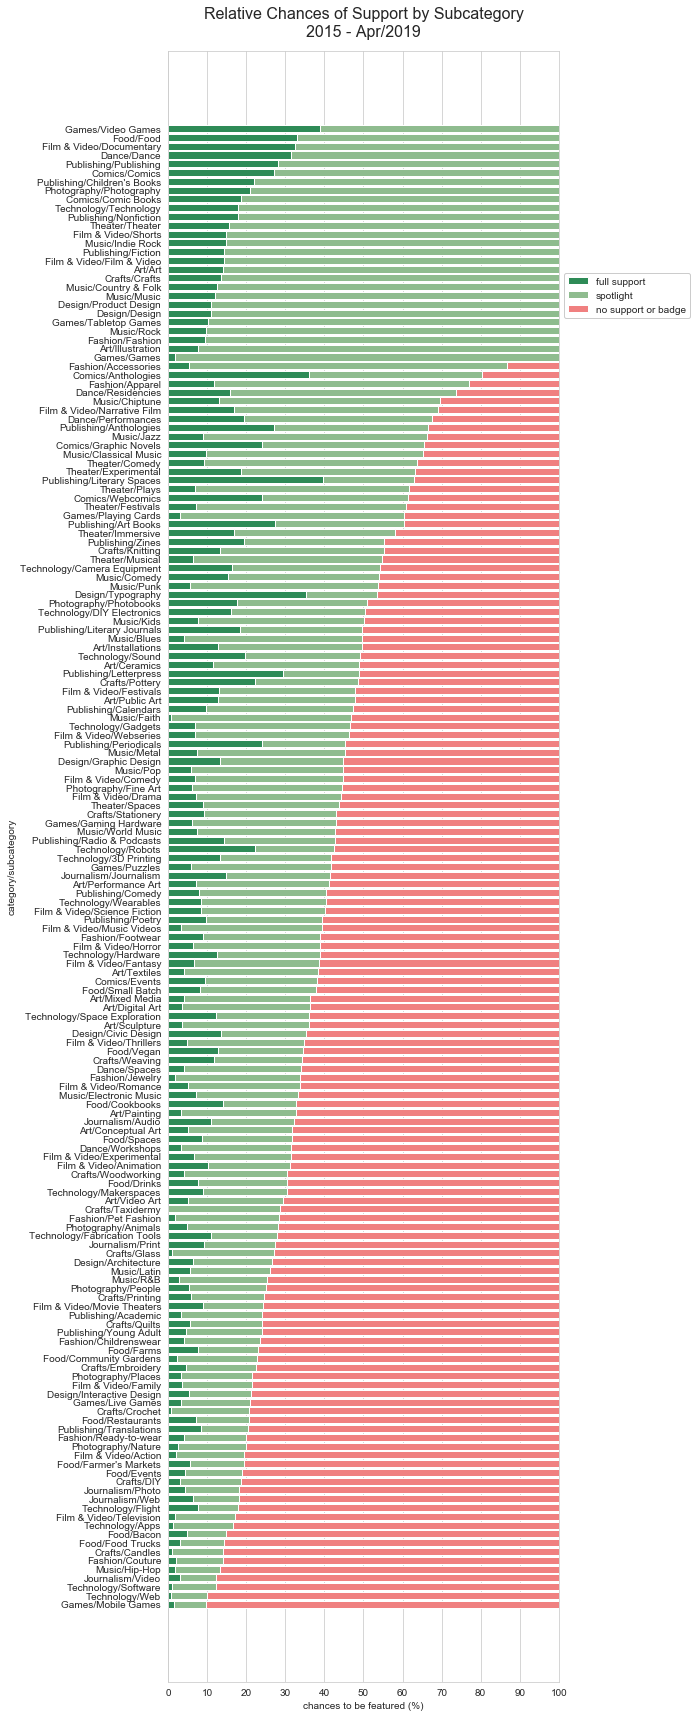

In [162]:
# settings
plt.figure(figsize = [7, 30])

# calculate chances
comb_cat_r = calc_support_chance("comb_cat") 

# stacked bar plots for subcategorical success rates by category    
plot_support_by_cat(comb_cat_r, 'comb_cat')
    
# labels and ticks
plt.title("Relative Chances of Support by Subcategory\n2015 - Apr/2019", fontsize=16, pad=15);
plt.ylabel("category/subcategory")
plt.xlabel("chances to be featured (%)")

plt.show()

As the above plot is difficult to read because of the high number of subcategories, we are going to plot a best of.

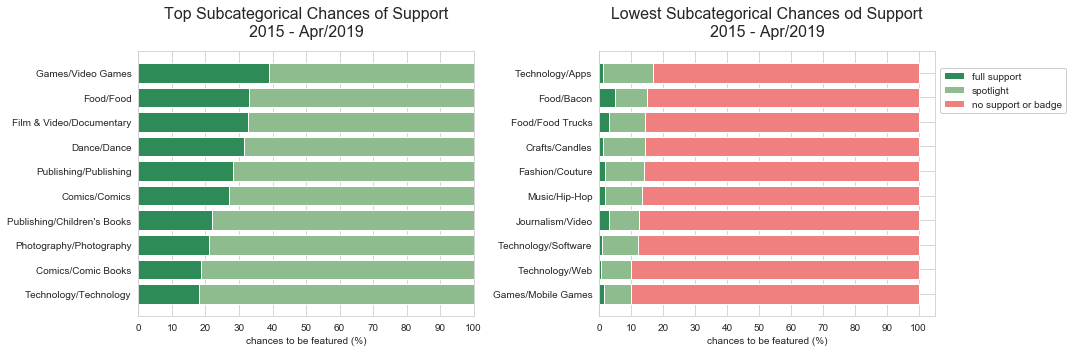

In [163]:
# save 10 most successful combined categories
subcats_s = comb_cat_r[-10:]

# save 10 most likely to fail categories
subcats_f = comb_cat_r[:10]

# settings
plt.figure(figsize=[15,5])

# left plot: top subcategories 
plt.subplot(1,2,1)  
plot_support_by_cat(subcats_s, 'comb_cat')
# remove legend
ax = plt.gca()
ax.get_legend().remove()
plt.title("Top Subcategorical Chances of Support\n2015 - Apr/2019", fontsize=16, pad=15); 
plt.xlabel("chances to be featured (%)")

# rightplot: bottom subcategories 
plt.subplot(1,2,2)  
plot_support_by_cat(subcats_f, 'comb_cat')
plt.title("Lowest Subcategorical Chances od Support\n2015 - Apr/2019", fontsize=16, pad=15); 
plt.xlabel("chances to be featured (%)")

plt.tight_layout()

plt.show()    

We see indications for certain project types being more likely to be chosen for full support or being spotlighted.
At the top of we find video games, followed by food and focumentaries. The lowest chances of support had software projects, web projects and mobile games. 

It is quite odd that we find video games at the top, while mobile games were at the bottom. Additionally we find projects without subcategories among the top categories. This may be an indication for creators increasing their chances by publishing without subcategory or by generally choosing more universal category names to attract Kickstarter's attention.

### Summary Featured

According to our data the support offered by Kickstarter is extremely relevant to win a campaign. Strictly projects that were supported by Kickstarter were successful. 44% of projects were spotlighted on Kickstarter's channels and 13% of completed projects got full support. Fully unsupported projects or projects only receiving a Projects We Love badge did not succeed.

Projects which received the 'Projects We Love' badge in addition to being spotlighted on the landing page, typically collected 2 to 2.5 times higher funding. Interestingly, the "Projects We Love" badge didn't influence the decision how much each backer was willing to pledge. Consequently, it makes sense that the badge drove the number of investors. Whereas spotlighted attracted a median of 50 supporters, fully supported campaigns convinced a medium of 116 supporters. Thus, backers counts more than doubled when campaigns were picked by staff.  

As a result of the strong effect of Kickstarter support, it is important to understand what kind of projects Kickstarter were most likely to be promoted. 

In terms of the funding goal, Kickstarter tended to support lower goals. The highest supported goal in the past 10 years was 2 mi. Spotlighted campaigns kept below the maximum goal of 347 tsd. 
While Kickstarter tends to support projects with lower goals, they also encourage projects of high, but reasonable funding by awarding the "Projects We Love" badge. Fully supported projects had a median goal of USD 10,000, whereas spotlighted projects only aimed for a median goal of USD 2,800.

The type of a project also played its part in Kickstarter's promotion activities. Comics were the most likely to be supported, followed by design and publishing campaigns. Comics, publishing and dance projects had the best chances to be fully supported. Creators who aimed for project support in technology, food and journalism had the lowest chances to be fully featured or to be spotlighted. 

More specifically, we found among the best chances to be supported:  
1) Video Games,  
2) Food without subcategory and  
3) documentary films.

The lowest chances to be featured had the following subcategories:  
1) Software projects,   
2) Web projects and   
3) Mobile Games.   

Admittedly, it feels odd to find video games at the top, while mobile games were at the bottom. Additionally, we found mostly projects without subcategories among the top support chances. This may be an indication for creators increasing their chances by publishing without subcategory or by choosing universal categories to attract Kickstarter's attention.

## Summary: What determines the success of a crowdfunding campaign on Kickstarter?

To find out what kind of crowdfunding campaigns were most successful on Kickstarter, we visually analyzed the following features available in our data set:   

1) the required and realized funding,  
2) whether Kickstarter actively supported a campaign,   
3) the month of a year,   
4) the project category and  
5) the campaign duration.   

To determine whether a campaign was considered successful or not, we looked into two main factors: first, the general chance to successfully end a campaign, and second, the amount of funding that was ultimately collected. 
When creators decide on a goal, they generally have to ponder whether to maximize their chances to successfully end a campaign or to generate the maximum funding possible. Both targets oppose each other diametrically. Because of Kickstarter's all-or-nothing-approach, raising the goal typically decreases the chances to succeed, yet creators risk insufficient funding by aiming for low goals.

#### The lower the goal, the better.

If creators want to keep at least a 50% chance, it appears to be advisable to stay below a benchmark of USD 10,000, leaving all other effects aside. On average goals below 5,000 had a chance above 60%.

Very risk averse creators may even stick goals below USD 1,500. Interestingly, low goal projects typically generate a surplus of 34% above goal. At the same time goals between USD 1,500 to 13,194 generate a median surplus of 11-12%. Therefore, the loss in the total funding by setting low goals may be tolerable in exchange for better chances of success.

####  It is highly unlikely to successfully collect funding beyond USD 100 tsd.  

Creators seeking high funding may consider alternative investment possibilities to Kickstarter. 95% of all successful projects stay below funding of USD 38 tsd. At the same time success chances are very low for very high goal projects of USD 65 tsd. to 113 tsd : only 20% of campaigns end in success. For even higher goals, success chances drop to zero.

#### If creators seek  for higher goals, they should define more valuable pledge incentives.

The goal not only influenced success chances, but also how much every supporter was contributing. The higher a goal, the higher was the amount pledged per backer. On average supporters pledged USD 37 for goals below USD 38,124, but invested a fourfold of for very high goals. Creators may consider this behavior when defining the incentives for pledges.

#### Kickstarter's promotion efforts are extremely relevant for success.

Strictly projects that were supported by Kickstarter were successful. 44% of projects were spotlighted on Kickstarter's channels and 13% of completed projects were fully supported. All crowdfundings that were not announced on Kickstarter's landing page failed. This includes a few campaigns that got the "Projects We Love" badge, but were not spotlighted in any way. 

Kickstarter's promotion activities around crowdfunding campaigns not only determined life or dead of a venture. Being fully featured by Kickstarter also drove the total collected funding. Projects which received the 'Projects We Love' badge in addition to being spotlighted on the landing page, collected 2 to 2.5 times higher funding than campaigns that were only spotlighted. 

The higher amount of funding of fully supported campaigns can be mainly explained by a higher number of supporters. While spotlighted projects attracted a median of 50 supporters, fully supported campaigns on average convinced more than a double of investors. Interestingly, it didn't affect the decision how much each backer was willing to pledge. 

As a result of the strong impact of Kickstarter's promotion efforts, creators should be aware what kind of projects Kickstarter was most likely to support and what type of projects were not supported.

Generally, Kickstarter tends to support projects of lower goals. Spotlighted projects on average sought a goal of USD 2,800. Creators who intend to collect higher funding, should aim for the badge in addition of being featured on the website. Fully supported projects realized a median goal of USD 10,000.

#### Comics, video games and documentary films are most likely to be supported by Kickstarter. 
The category of a campaign also played a part in Kickstarter's decision to feature projects. Comics were the most likely to be supported, followed by design and publishing campaigns. Comics, publishing and dance projects had the best chances to be fully supported. Creators who aimed for project support in technology, food and journalism had the lowest chances to be fully featured or to be spotlighted.

More specifically, we found among the best chances to be supported:
1) Video Games,
2) Food without subcategory and
3) documentary films.

The lowest chances to be featured had the following subcategories:
1) Software projects,
2) Web projects and
3) Mobile Games.

Admittedly, it feels odd to find video games at the top, while mobile games were at the bottom. Additionally, we found mostly projects without subcategories among the top support chances. This may be an indication for creators increasing their chances by publishing without subcategory or by choosing universal categories to attract Kickstarter's attention.

####  Kickstarter is a platform to fund creative projects with comparatively low financial requirements.

Creative projects and categories attributed with lower commercial potential seem to be most common and most successful.
Written work and comics dominate the top categories. Fictional & nonfictional publishing projects, children's books and comic books all ended in success. Tabletop games clearly win the race of projects with the highest success rates.

#### Tech and food projects are most likely to fail. 
Notice that gadgets, hard- and software, web projects and apps all had low chances of success, although being among the most popular categories. In addition to technology ventures, we find 3 food subcategories among the ventures with the lowest chances: small batch, drinks and restaurants.

However, they are most likely to fail because their investment requirements tend to be high. Tech and food projects require the highest average funding of USD 15 tsd. So, higher failure rates do not necessarily imply that Kickstarter is generally a bad place for such kind of projects. On the positive side, once successful, tech campaigns generate the highest median pledges of plus USD 22 tsd. 

#### Choose universal categories.

The top chances in popular project categories show a tendency to not have subcategories. Publishing, comics, film & video, art and music performed generally well they were communicated universally, instead of niche topics. 

Overall, we see indications that the type of project is likely correlated with success. Therefore, category and subcategory should be chosen carefully by observing popularity, success rates and current trends of subcategories before running a campaign.

#### Video Games instead of Mobile Games
While every single "video game" campaign succeeded, projects of the subcategory "mobile games" disappointed with a failure rate of 93%.

#### Design instead of Art
Product design and illustrations worked in 100% of all cases, yet paintings were likely to fail. Generally, campaigns labeled as _Design_ worked better than labeled as _Art_.

#### Country & Folk Music flourished, Hip-Hop flopped. 
The taste in music seems to matter. While crowdfunding worked well for country & folk music, hip-hop campaigns failed at a rate of 78%.

#### A heaven for Short films and Documentaries.
Film & video projects appear on both sites of success chances. Short films and documentaries were a guarantee for success, while animations and web series were more likely to fail. 

####  The Funding Duration is 30 days. Period.
We cannot affirm that a higher funding duration is rewarded by higher success rates. No matter if a campaign was successful or failed, the median period was generally 30 days. Overall, success chances were highest around 30 days.

The average funding durations appear to be a little longer when the goals were higher. Successful goals under USD 1,500 had a mean funding duration of 28 days. Successful very high goal projects between USD 13,194 to 65,064 on average ran a week longer (35 days).

We found that the highest and most constant success chances are between 15 to 35 days for projects below USD 13,194. Nevertheless, we observe that creators of higher goal projects can extend their funding duration up to 48 days without loosing significant success chances caused by prolonged funding duration.

60 days funding durations were popular. Unfortunately, they were attributed with the lowest failure rates. 

#### The time of the year matters
The time of the year on average affected the general success chances, investor counts and collected funding. It's advisable for creators to consider the month in which they plan to end a campaign. By optimizing the season, creators may be able to increase success chances or collect a higher amount of investments.

Generally, we found an overlap of best chances in December. Ignoring some inconsistencies, we found October to December and April to July as the most promising months to run a campaign. January to March performed subnormally. 

November was the safest bet for every creators whose primary goal was to end a campaign successfully. Those creators should avoid to run a campaign in January since success rates were roughly 10% lower. Creators who seek high funding had the best chances in December or June and should avoid the January to March.

#### Nailed it!
We identified the most valuable project categories by depicting pledges against success rates. By filtering subcategories by above standard values of success rates and pledges, we found the most valuable categories were:  

1) Technology projects without defined subcategory,  
2) Product Design projects and  
3) Documentary films.  

#### Keep your hand off!

1) mobile games,  
2) Hip-Hop music and  
3) generally journalistic projects.


## References

1) Agrawal, Ajay; Catalini, Christian; Goldfarb, Avi (June 2013). "Some Simple Economics of Crowdfunding". NBER Working Paper No. 19133. doi:10.3386/w19133, https://www.nber.org/papers/w19133.pdf  
2) Wikipedia.org (July 2019): https://en.wikipedia.org/wiki/Crowdfunding  
3) Kickstarter.com, "How to start a project" (July 2019), https://www.kickstarter.com/learn?ref=nav  
4) Reviewed by Smith, Tim (last updated June 2019),  "Crowdfunding", https://www.investopedia.com/terms/c/crowdfunding.asp  
5) Barnett, Chance (May 2013), "Top 10 Crowdfunding Sites For Fundraising",  https://www.forbes.com/sites/chancebarnett/2013/05/08/top-10-crowdfunding-sites-for-fundraising/#1bfd6cfd3850  
6) Nguyen, Stacey (last updated May 2019), "The 8 best Crowdfunding Websites of 2019", https://www.thebalancesmb.com/best-crowdfunding-sites-4580494  
7) https://www.thebalancesmb.com/a-guide-what-is-crowdfunding-985100